# **Projet UA 3 – Implication de l'IA dans le processus de diagnostic d'une cellule cancereuse**:


## **Introduction**:

### **Informations Complémentaires**



Les caractéristiques sont calculées à partir d'une image numérisée d'un prélèvement par aspiration à l'aiguille fine (PAAF) d'une masse mammaire. Elles décrivent les caractéristiques des noyaux cellulaires présents dans l'image. Quelques images sont disponibles à l'adresse http://www.cs.wisc.edu/~street/images/. Le plan de séparation décrit précédemment a été obtenu par la méthode MSM-T (Multisurface Method-Tree) [KP Bennett, « Decision Tree Construction Via Linear Programming », Actes du 4e congrès de la Midwest Artificial Intelligence and Cognitive Science Society, p. 97-101, 1992], une méthode de classification qui utilise la programmation linéaire pour construire un arbre de décision. Les caractéristiques pertinentes ont été sélectionnées par une recherche exhaustive dans l'espace de 1 à 4 caractéristiques et 1 à 3 plans de séparation. Le programme linéaire utilisé pour obtenir le plan de séparation dans l'espace tridimensionnel est celui décrit dans : [KP Bennett et OL Mangasarian : « Robust Linear Programming Discrimination of Two Linearly Inseparable Sets », Optimization Methods and Software 1, 1992, 23-34]. Cette base de données est également accessible via le serveur FTP du département d'informatique de l'Université de Washington : ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

--------------------------------------------------------------------------------
En résumé
--------------------------------------------------------------------------------
Au lieu d'utiliser les modèles à base des CNN pour prédire notre cible, des algorithmes ont déjà été utilisé pour traduire les informations sur les images sous forme de données tabulaires. 


### **Description des données**


## Description des variables du dataset *Breast Cancer Wisconsin (Diagnostic)

### 1. Informations générales
- **ID number** : Identifiant unique de l’échantillon.  
- **Diagnosis** : Type de tumeur — **M** (*malignant*, maligne) ou **B** (*benign*, bénigne).



### 2. Caractéristiques cellulaires 

Chaque cellule est décrite à partir de **10 caractéristiques principales** calculées sur l’image numérique du noyau :


**radius** Moyenne des distances du centre au contour (taille globale) 

 **texture** ⁉ Écart-type des niveaux de gris (variation d’intensité)
 
**perimeter** : Longueur du contour cellulaire |

**area** : Surface de la cellule |

**smoothness** : Variation locale du rayon (régularité du contour) |

**compactness** : Degré de compacité *(perimeter² / area - 1)* |

**concavity** : Importance des creux dans le contour |

**concave points** : Nombre de creux (zones concaves) sur le contour |

**symmetry** : Symétrie du noyau |

**fractal dimension** : Complexité du contour (rugosité / forme irrégulière) 



### 3. Trois types de mesures pour chaque caractéristique

Chaque variable ci-dessus est mesurée selon **trois versions** :
- `*_mean` → **Valeur moyenne** sur l’image (ex. `radius_mean`)
- `*_se` → **Erreur standard** ou variation locale (ex. `radius_se`)
- `*_worst` → **Valeur maximale** observée (ex. `radius_worst`)

Ainsi, le dataset contient **10 caractéristiques × 3 mesures = 30 variables**,  
auxquelles s’ajoutent :
- `ID number`
- `Diagnosis`

 **Total : 32 colonnes.**



### Remarque
Les caractéristiques géométriques (*radius, perimeter, area, etc.*) permettent de distinguer les tumeurs bénignes (formes plus régulières et homogènes) des tumeurs malignes (formes irrégulières et plus complexes).




Historique à prendre en compte pour la présentation du projet

1. Comment les données ont été obtenues (imagerie médicale, PAAF, etc.)

    1. Prélèvement du tissu du sein (biopsie)

Lorsqu’une masse suspecte est détectée, un médecin réalise une biopsie :
 un petit échantillon de tissu du sein est prélevé.

Cet échantillon contient des cellules, certaines normales (bénignes) et parfois cancéreuses (malignes).

2. Observation des cellules au microscope

Les cellules prélevées sont ensuite :
-colorées pour bien voir leur forme
- placées sous un microscope numérique
- photographiées avec une caméra haute résolution

Ces images sont la base du dataset.

3. Extraction automatique de caractéristiques (feature extraction)

Un logiciel spécialisé analyse l’image pour mesurer la forme, la structure et la texture des noyaux cellulaires.
Ce sont les fameux attributs du dataset.

Les principales catégories de mesures sont :

*Forme

radius (rayon)

perimeter

area

compactness

concavity

* Texture

texture (variation d’intensité sur l’image)

smoothness (régularité du contour)

* Symétrie et régularité

symmetry

fractal_dimension

concave_points

4. Calcul des 3 versions : mean, se, worst

Pour chaque image, le logiciel analyse plusieurs cellules, pas juste une.
Et il en extrait trois valeurs pour chaque type de mesure :

A mean — moyenne

→ “À quoi ressemblent les cellules en général ?”

B se — erreur standard (standard error) ou variabilité locale (std/sqrt(n) avec n = nombre de cellules)

→ “À quel point les cellules sont-elles différentes les unes des autres ?”

C worst — valeurs les plus extrêmes

→ “Quelles sont les cellules les plus irrégulières ou suspectes ?”

Les tumeurs malignes ont souvent :

des cellules plus grandes

des contours irréguliers

une variabilité élevée

D'où l’importance de ces 3 niveaux.

5. Annotation de la tumeur : B (benign) ou M (malignant)

Finalement, un médecin spécialiste (pathologiste) vérifie la biopsie et attribue la classe cible :

M (Malignant) → tumeur cancéreuse

B (Benign) → tumeur non cancéreuse

Ensuite, cette variable est encodée (ex : B=0, M=1).

 6. Création du dataset final

On rassemble toutes ces informations dans un tableau :

radius_mean	radius_se	radius_worst	…	diagnosis
14.2	0.5	16.3	…	M
8.5	0.2	10.1	…	B

 Chaque ligne = une patiente
Chaque colonne = une caractéristique de l’image




# objectives de la prédiction 


1. Ce que détermine le dataset :
Ce n’est pas pour savoir s’il y a un cancer dans le corps.
 C’est pour déterminer si une tumeur déjà détectée est :
 Bénigne (non cancéreuse)

ou

Maligne (cancéreuse)

Donc :
Oui, c’est de la détection de cancer du sein, mais sur une tumeur déjà observée en imagerie ou palpée par un médecin.

 2. Pourquoi analyser les cellules ?

Quand une tumeur est trouvée, une biopsie est faite pour analyser les cellules au microscope.

Ce dataset utilise l’image du noyau cellulaire pour prédire si la tumeur est :

bénigne → cellules régulières, rondes, stables

maligne → cellules agressives, irrégulières, déformées

Le but du modèle est donc :
“Dire automatiquement si une tumeur du sein est cancéreuse ou non, à partir de l’image de ses cellules.”

3. Si le diagnostic est BENIN (B)

→ Pas de cancer
→ Pas de propagation
→ Souvent on surveille seulement, aucun traitement lourd
→ La tumeur peut rester ou être retirée si elle gêne

4. Si le diagnostic est MALIN (M)
là oui, c'est officiellement un cancer du sein

Une tumeur maligne peut se multiplier, envahir les tissus autour, et se propager dans l’organisme (métastases).

C’est pour ça que la suite est très importante.

5. Prochaine étape quand une tumeur est maligne

Une fois que la biopsie confirme que la tumeur est cancéreuse, le processus médical commence :

Étape 1 – Déterminer le stade du cancer (staging)

Le médecin mesure :

la taille de la tumeur

si elle touche les ganglions

si elle s’est propagée (métastases)

Étape 2 – Bilan complet

Exemples d’examens :

IRM du sein

mammographie

échographie

prise de sang

parfois scanner ou PET-scan

Étape 3 – Choix du traitement

Selon le stade, on peut avoir :

- Chirurgie

Enlever la tumeur (tumorectomie) ou parfois le sein (mastectomie)

- Radiothérapie

Détruire les cellules cancéreuses restantes

- Chimiothérapie

Traitement pour réduire ou éliminer la tumeur

- Hormonothérapie

Si la tumeur réagit aux hormones

- Immunothérapie

Stimuler le système immunitaire pour attaquer les cellules cancéreuses




# une tumeur c'est quoi ? 


1. Une tumeur n’est pas “une seule cellule”

Une tumeur est en réalité :

 un amas (une multiplication) de cellules anormales

qui se divisent trop rapidement et ne respectent plus le fonctionnement normal du tissu.

Donc :

- Une cellule devient anormale

- Elle perd son contrôle de croissance

- Elle commence à se multiplier

- Ces cellules s’accumulent

- L’ensemble forme une tumeur

2. Une cellule anormale → tumeur

Une tumeur commence toujours par une seule cellule qui a muté.
Cette cellule :

ignore les signaux pour arrêter de se diviser

se divise beaucoup plus vite que normal

transmet sa mutation aux cellules filles

Au bout d’un moment, on obtient une masse → la tumeur.

 3. Deux types de tumeurs
 Bénigne

→ cellules un peu anormales mais non agressives
→ elles restent localisées
→ elles ne détruisent pas les tissus autour
→ elles ne se propagent pas dans le corps

 Maligne (cancer)

→ cellules très anormales et agressives
→ elles envahissent les tissus voisins
→ elles peuvent migrer dans le sang ou la lymphe
→ métastases possibles

 4. Ce que le dataset mesure : les cellules qui composent la tumeur

Chaque variable (radius_mean, smoothness_se, compactness_worst, etc.) décrit :

la taille des cellules

leur forme

leur irrégularité

leur densité

leur symétrie

Le but est de voir si les cellules dans l’amas (la tumeur) ressemblent plus à :

des cellules normales / régulières → bénigne

des cellules déformées / agressives → maligne

Donc oui, la tumeur vient d’une cellule, mais ce que l’on analyse dans la réalité (et dans ton dataset) ce sont :

 les caractéristiques des cellules qui composent l’amas tumoral.

Contexte du dataset

Le jeu de données Breast Cancer Wisconsin Diagnostic (ID=17 sur UCI) provient de photographies de cellules épithéliales du sein obtenues par aspiration à l’aiguille fine (FNA).

Chaque ligne du dataset correspond à un échantillon (un prélèvement d’une patiente).

Pour chaque échantillon, on prend une image microscopique.

Sur cette image, on identifie plusieurs cellules et on mesure différentes caractéristiques morphologiques (forme, texture, etc.).

D’où viennent les 30 variables ?

Sur chaque image, on mesure 10 caractéristiques de base des cellules :

radius

texture

perimeter

area

smoothness

compactness

concavity

concave points

symmetry

fractal dimension


pour chaque caractéristique, on calcule trois versions :

Suffixe	Signification	Interprétation
_mean	Moyenne des valeurs mesurées sur toutes les cellules de l’image	donne une idée générale de la forme des cellules
_se	Erreur standard (ou écart-type local)	mesure la variabilité des cellules dans l’échantillon
_worst	Valeur maximale observée parmi les cellules	mesure la cellule la plus anormale du groupe
Donc, pour répondre à ta question :

Est-ce qu’il y a plusieurs photos de cellule, ou bien plusieurs cellules sur une seule photo ?

C’est une seule photo par échantillon,
mais plusieurs cellules sont visibles dessus.

Chaque ligne du dataset représente :

→ une patiente
→ un échantillon de tissu (une photo microscopique)
→ et des statistiques calculées sur plusieurs cellules visibles dans cette photo.

## Les Pré-travaux

la reproductibilité

In [13]:
import pandas as pd
## Pour une affiche plus large de certaines sorties
# Augmenter la largeur d'affichage pour voir toutes les colonnes
pd.set_option('display.max_columns', None)

# Augmenter le nombre de lignes affichées
pd.set_option('display.max_rows', None)

# Désactiver la coupure du texte
pd.set_option('display.max_colwidth', None)

In [14]:
# Pour la reproductibilité (fixer le germe)

import random
import numpy as np
import sklearn

def set_seed_sklearn(seed: int = 42):
    random.seed(seed)                 # Graine Python
    np.random.seed(seed)             # Graine NumPy
    try:
        sklearn.utils.check_random_state(seed) # pour les modèles sklearn utilisant joblib (random forests, etc)
    except:
        pass

# Utilisation
set_seed_sklearn(42)


le chargement des données 

In [ ]:
!pip install ucimlrepo

In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

df = pd.concat([X, y], axis=1)

# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
df.head()

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  radius2  \
0      0.3001          0.14710     0.2419             0.07871   1.0950   
1      0.0869          0.07017     0.1812             0.05667   0.5435   
2      0.1974          0.12790     0.2069             0.05999   0.7456   
3      0.2414          0.10520     0.2597             0.09744   0.4956   
4      0.1980          0.10430     0.1809             0.05883   0.7572   

   texture2  perimeter2   area2  smoothness2  compactness2  concavity2  \
0    0.9053       8.589  153.40     0.006399       0.04904     0.05373   
1    0.7339       3.398   74.08     0.005225       0.01308     0.01860   
2    0.7869       4.585   94.03     0.006150       0.04006     0.03832   
3    1.1560       3.445   27.23     0.009110       0.07458     0.05661   
4    0.7813       5.438   94.44     0.011490       0.02461     0.05688   

   concave_points2  symmetry2  fractal_dimension2  radius3  texture3  \
0          0.01587    0.03003            0.006193    25.38     17.33   
1          0.01340    0.01389            0.003532    24.99     23.41   
2          0.02058    0.02250            0.004571    23.57     25.53   
3          0.01867    0.05963            0.009208    14.91     26.50   
4          0.01885    0.01756            0.005115    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3 Diagnosis  
0     0.4601             0.11890         M  
1     0.2750             0.08902         M  
2     0.3613             0.08758         M  
3     0.6638             0.17300         M  
4     0.2364             0.07678         M

In [16]:
df.shape

(569, 31)

# Partie 1 - Exploration des données et prétraitement

## I - Compréhension  et prétraitement des données

Nous allons en premier lieu, explorer les données et nous assurer de comprendre ce qu'elles représentent.

In [40]:
df.head()


radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  radius2  \
0      0.3001          0.14710     0.2419             0.07871   1.0950   
1      0.0869          0.07017     0.1812             0.05667   0.5435   
2      0.1974          0.12790     0.2069             0.05999   0.7456   
3      0.2414          0.10520     0.2597             0.09744   0.4956   
4      0.1980          0.10430     0.1809             0.05883   0.7572   

   texture2  perimeter2   area2  smoothness2  compactness2  concavity2  \
0    0.9053       8.589  153.40     0.006399       0.04904     0.05373   
1    0.7339       3.398   74.08     0.005225       0.01308     0.01860   
2    0.7869       4.585   94.03     0.006150       0.04006     0.03832   
3    1.1560       3.445   27.23     0.009110       0.07458     0.05661   
4    0.7813       5.438   94.44     0.011490       0.02461     0.05688   

   concave_points2  symmetry2  fractal_dimension2  radius3  texture3  \
0          0.01587    0.03003            0.006193    25.38     17.33   
1          0.01340    0.01389            0.003532    24.99     23.41   
2          0.02058    0.02250            0.004571    23.57     25.53   
3          0.01867    0.05963            0.009208    14.91     26.50   
4          0.01885    0.01756            0.005115    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3 Diagnosis  
0     0.4601             0.11890         M  
1     0.2750             0.08902         M  
2     0.3613             0.08758         M  
3     0.6638             0.17300         M  
4     0.2364             0.07678         M

In [24]:
df.shape

(1138, 31)

Nous avons un jeu de données de 8 caractéristiques, et de 1000000 échantillons.

Analysons les colomnes que nous avons

In [25]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

### Les caractéristiques particulières
Ciblons les caractéristiques qui présentent des données suspectes pour une étude approfondie.

Nous allons d'abord, nous baser sur la différence entre la médiane et la moyenne, ensuite la vérification des quartiles pour identifier les caractéristiques que nous pouvons étudier en profondeur.

In [38]:
df.describe()

radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.029560         0.020310    0.161900   
50%        0.092630    0.061540         0.033500    0.179200   
75%        0.130400    0.130700         0.074000    0.195700   
max        0.345400    0.426800         0.201200    0.304000   

       fractal_dimension1     radius2    texture2  perimeter2       area2  \
count          569.000000  569.000000  569.000000  569.000000  569.000000   
mean             0.062798    0.405172    1.216853    2.866059   40.337079   
std              0.007060    0.277313    0.551648    2.021855   45.491006   
min              0.049960    0.111500    0.360200    0.757000    6.802000   
25%              0.057700    0.232400    0.833900    1.606000   17.850000   
50%              0.061540    0.324200    1.108000    2.287000   24.530000   
75%              0.066120    0.478900    1.474000    3.357000   45.190000   
max              0.097440    2.873000    4.885000   21.980000  542.200000   

       smoothness2  compactness2  concavity2  concave_points2   symmetry2  \
count   569.000000    569.000000  569.000000       569.000000  569.000000   
mean      0.007041      0.025478    0.031894         0.011796    0.020542   
std       0.003003      0.017908    0.030186         0.006170    0.008266   
min       0.001713      0.002252    0.000000         0.000000    0.007882   
25%       0.005169      0.013080    0.015090         0.007638    0.015160   
50%       0.006380      0.020450    0.025890         0.010930    0.018730   
75%       0.008146      0.032450    0.042050         0.014710    0.023480   
max       0.031130      0.135400    0.396000         0.052790    0.078950   

       fractal_dimension2     radius3    texture3  perimeter3        area3  \
count          569.000000  569.000000  569.000000  569.000000   569.000000   
mean             0.003795   16.269190   25.677223  107.261213   880.583128   
std              0.002646    4.833242    6.146258   33.602542   569.356993   
min              0.000895    7.930000   12.020000   50.410000   185.200000   
25%              0.002248   13.010000   21.080000   84.110000   515.300000   
50%              0.003187   14.970000   25.410000   97.660000   686.500000   
75%              0.004558   18.790000   29.720000  125.400000  1084.000000   
max              0.029840   36.040000   49.540000  251.200000  4254.000000   

       smoothness3  compactness3  concavity3  concave_points3   symmetry3  \
count   569.000000    569.000000  569.000000       569.000000  569.000000   
mean      0.132369      0.254265    0.272188         0.114606    0.290076   
std       0.022832      0.157336    0.208624         0.065732    0.061867   
min       0.071170      0.027290    0.000000         0.000000    0.156500   
25%       0.116600      0.147200    0.114500         0.064930    0.250400   
50%       0.131300      0.211900    0.226700         0.099930    0.282200   
75%       0.146000      0.339100    0.382900         0.161400    0.317900   
max       0.222600      1.058000    1.252000         0.291000    0.663800   

       f

Vérifions avec le boxplot et un histogramme la distribution des données

In [44]:
df.select_dtypes(include=['object','category']).columns

Index(['Diagnosis'], dtype='object')

radius1
 count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius1, dtype: float64


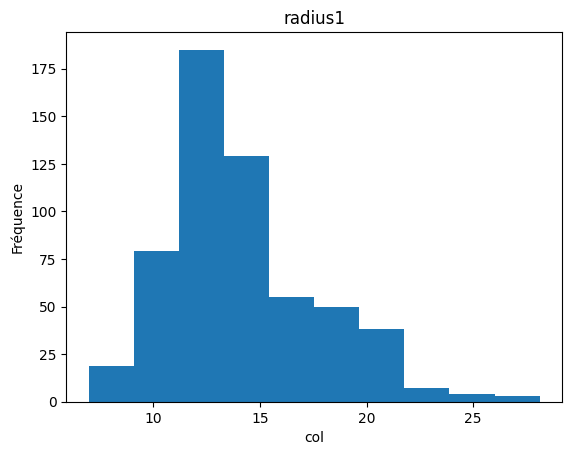


texture1
 count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture1, dtype: float64


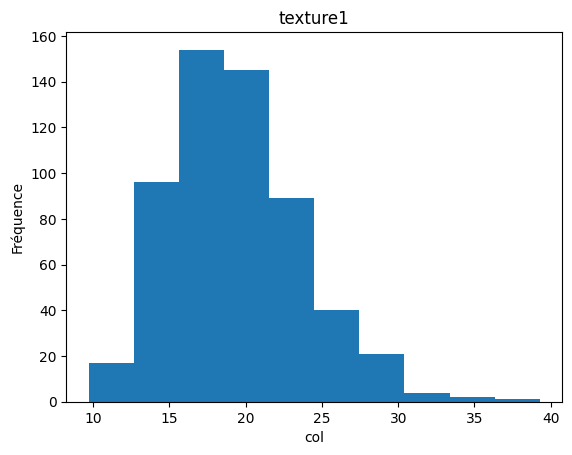


perimeter1
 count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter1, dtype: float64


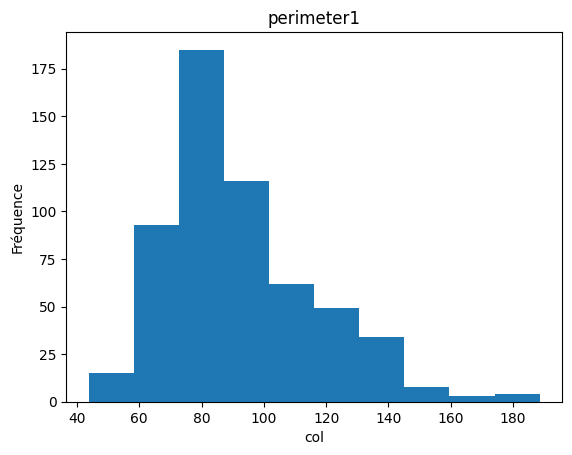


area1
 count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area1, dtype: float64


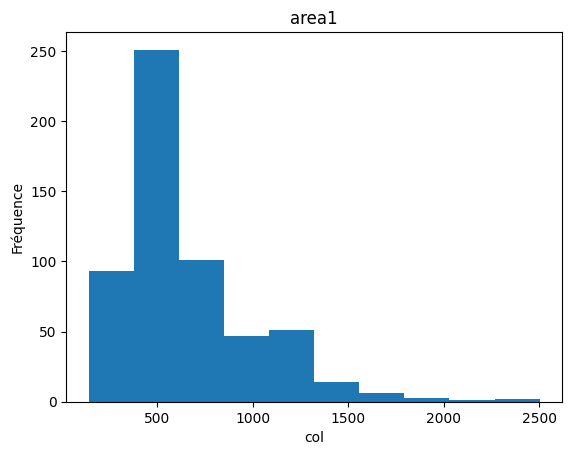


smoothness1
 count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: smoothness1, dtype: float64


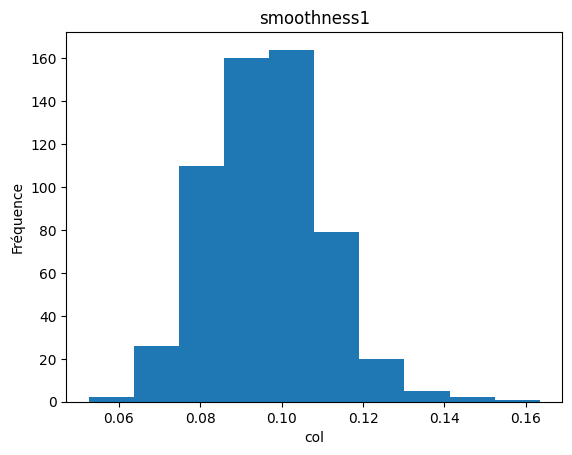


compactness1
 count    569.000000
mean       0.104341
std        0.052813
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.345400
Name: compactness1, dtype: float64


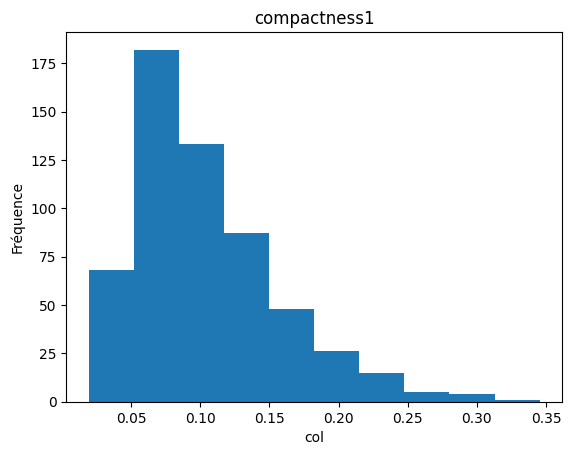


concavity1
 count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity1, dtype: float64


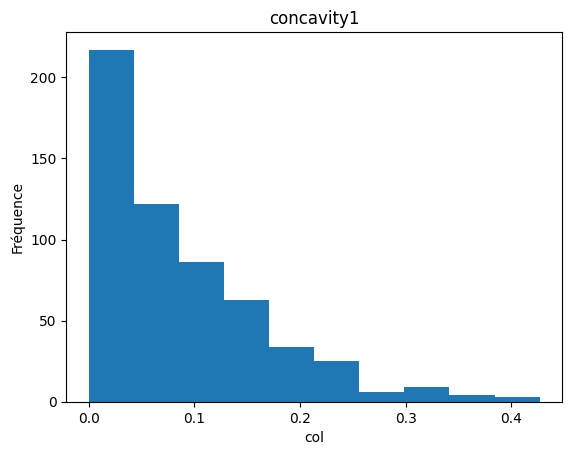


concave_points1
 count    569.000000
mean       0.048919
std        0.038803
min        0.000000
25%        0.020310
50%        0.033500
75%        0.074000
max        0.201200
Name: concave_points1, dtype: float64


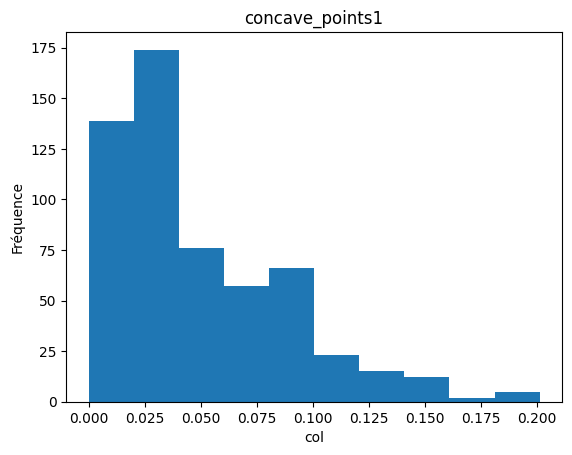


symmetry1
 count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: symmetry1, dtype: float64


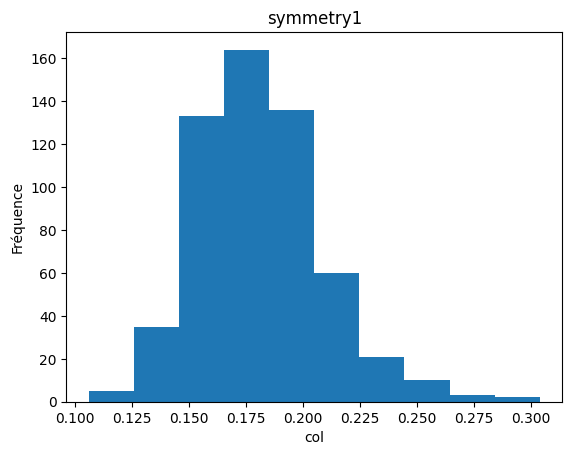


fractal_dimension1
 count    569.000000
mean       0.062798
std        0.007060
min        0.049960
25%        0.057700
50%        0.061540
75%        0.066120
max        0.097440
Name: fractal_dimension1, dtype: float64


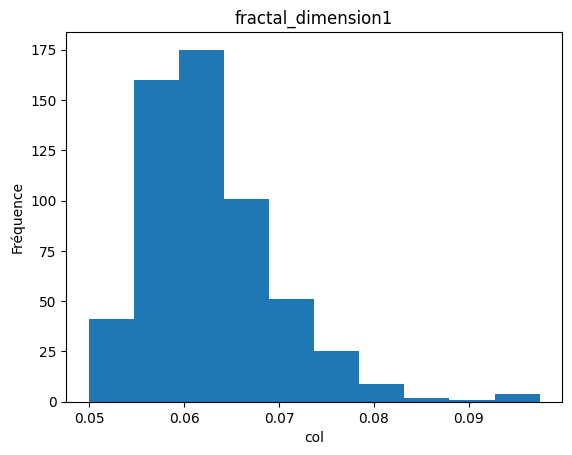


radius2
 count    569.000000
mean       0.405172
std        0.277313
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        2.873000
Name: radius2, dtype: float64


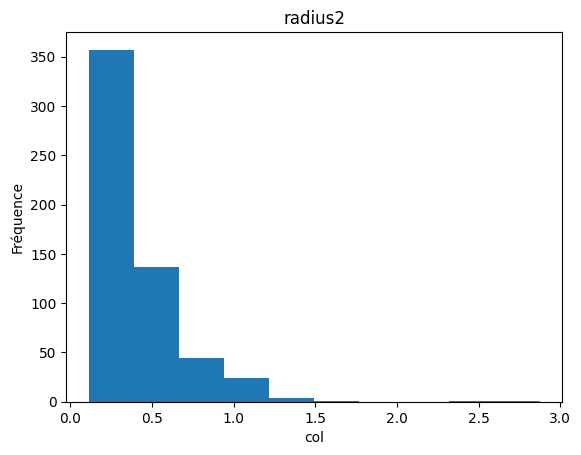


texture2
 count    569.000000
mean       1.216853
std        0.551648
min        0.360200
25%        0.833900
50%        1.108000
75%        1.474000
max        4.885000
Name: texture2, dtype: float64


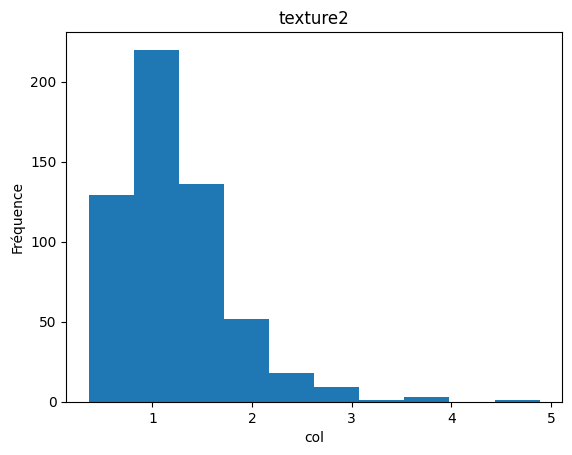


perimeter2
 count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: perimeter2, dtype: float64


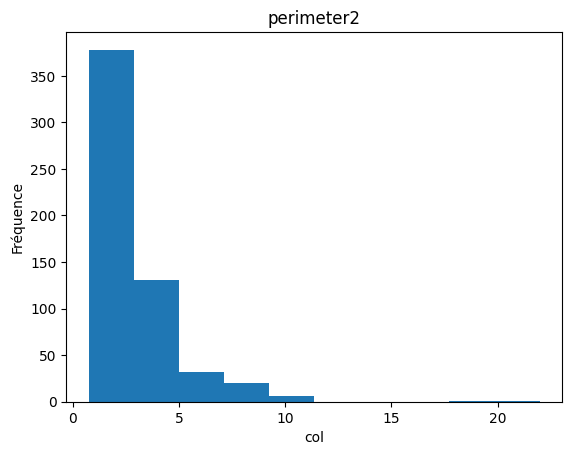


area2
 count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: area2, dtype: float64


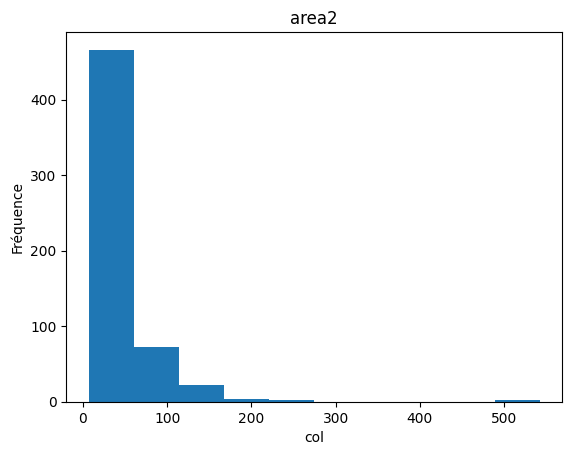


smoothness2
 count    569.000000
mean       0.007041
std        0.003003
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.031130
Name: smoothness2, dtype: float64


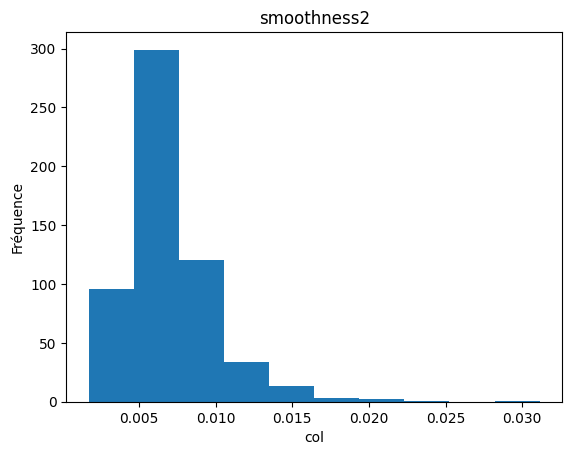


compactness2
 count    569.000000
mean       0.025478
std        0.017908
min        0.002252
25%        0.013080
50%        0.020450
75%        0.032450
max        0.135400
Name: compactness2, dtype: float64


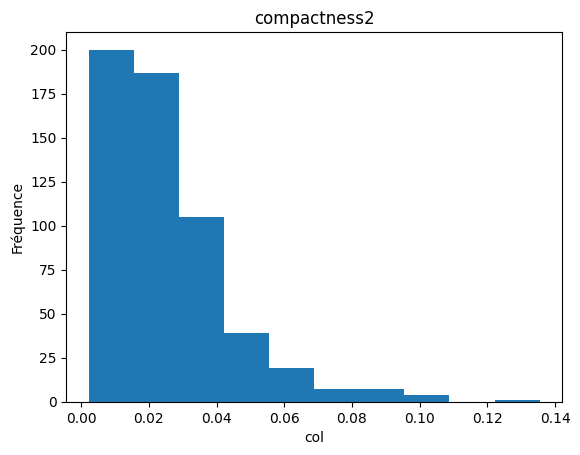


concavity2
 count    569.000000
mean       0.031894
std        0.030186
min        0.000000
25%        0.015090
50%        0.025890
75%        0.042050
max        0.396000
Name: concavity2, dtype: float64


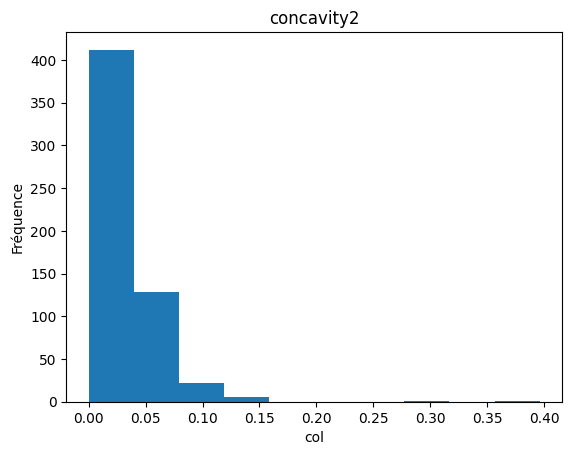


concave_points2
 count    569.000000
mean       0.011796
std        0.006170
min        0.000000
25%        0.007638
50%        0.010930
75%        0.014710
max        0.052790
Name: concave_points2, dtype: float64


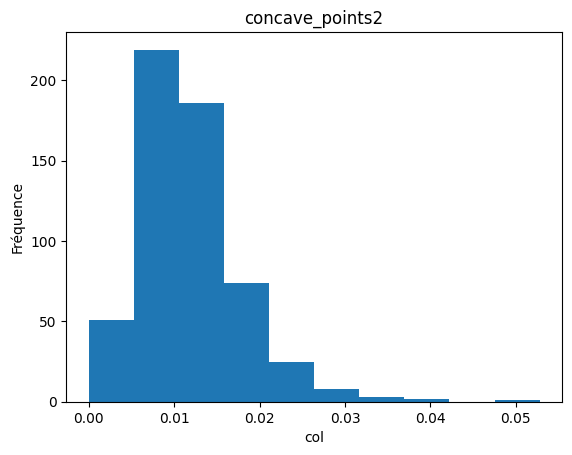


symmetry2
 count    569.000000
mean       0.020542
std        0.008266
min        0.007882
25%        0.015160
50%        0.018730
75%        0.023480
max        0.078950
Name: symmetry2, dtype: float64


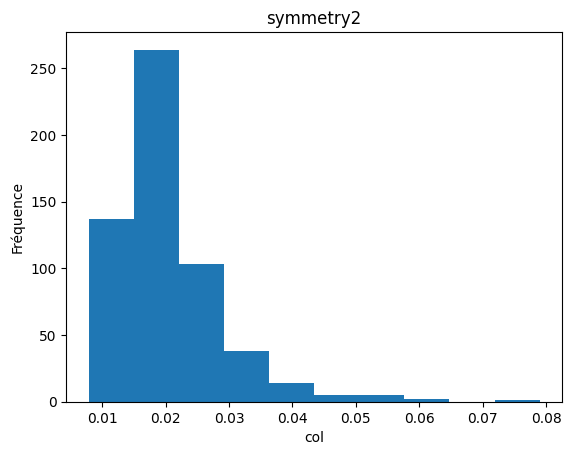


fractal_dimension2
 count    569.000000
mean       0.003795
std        0.002646
min        0.000895
25%        0.002248
50%        0.003187
75%        0.004558
max        0.029840
Name: fractal_dimension2, dtype: float64


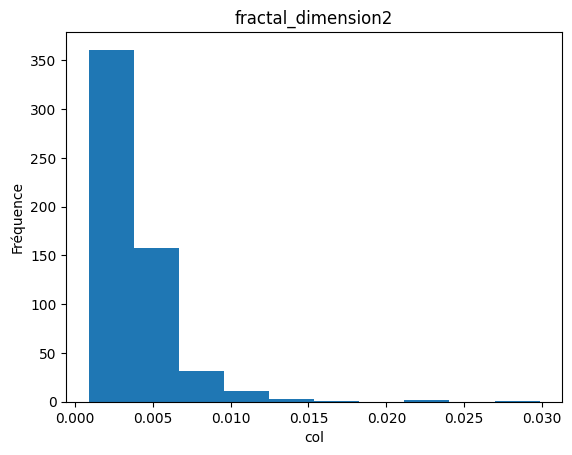


radius3
 count    569.000000
mean      16.269190
std        4.833242
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       36.040000
Name: radius3, dtype: float64


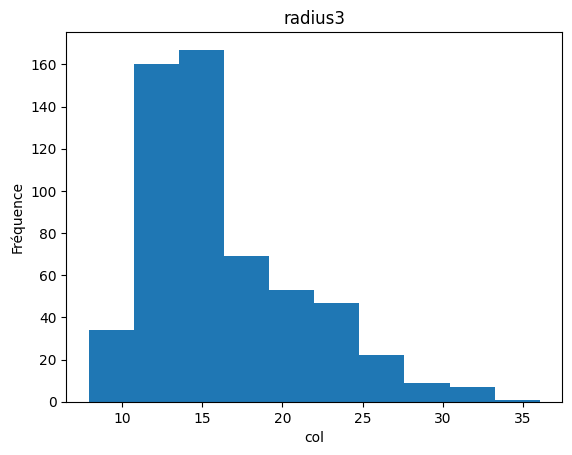


texture3
 count    569.000000
mean      25.677223
std        6.146258
min       12.020000
25%       21.080000
50%       25.410000
75%       29.720000
max       49.540000
Name: texture3, dtype: float64


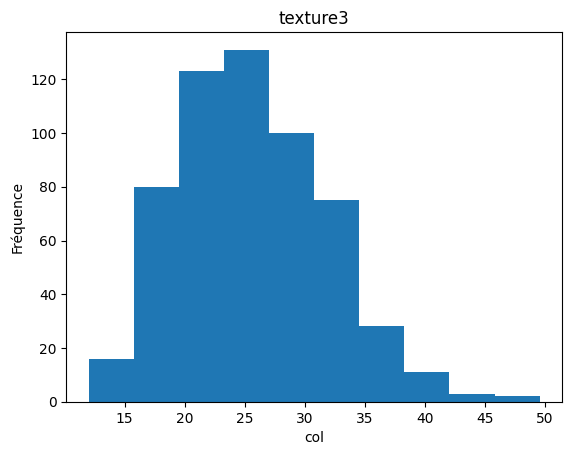


perimeter3
 count    569.000000
mean     107.261213
std       33.602542
min       50.410000
25%       84.110000
50%       97.660000
75%      125.400000
max      251.200000
Name: perimeter3, dtype: float64


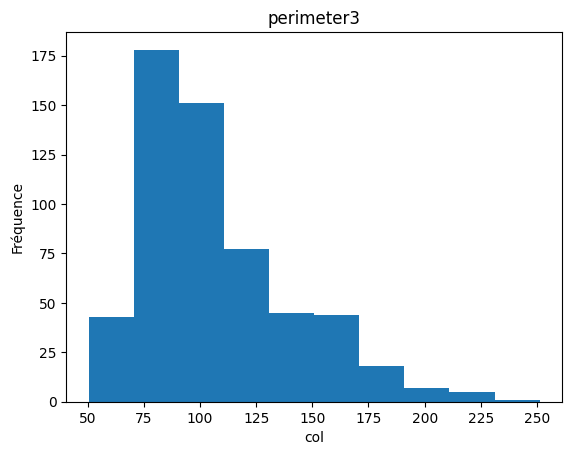


area3
 count     569.000000
mean      880.583128
std       569.356993
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      4254.000000
Name: area3, dtype: float64


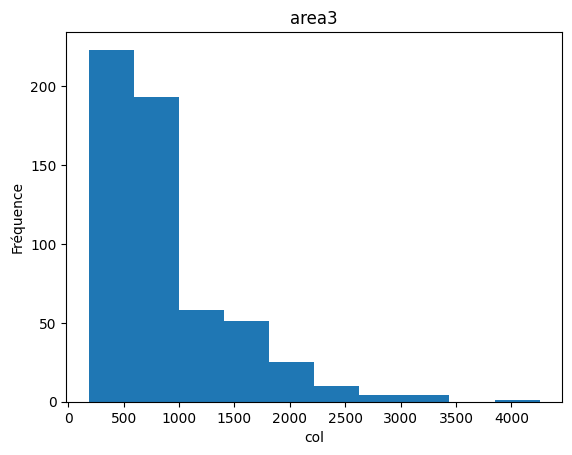


smoothness3
 count    569.000000
mean       0.132369
std        0.022832
min        0.071170
25%        0.116600
50%        0.131300
75%        0.146000
max        0.222600
Name: smoothness3, dtype: float64


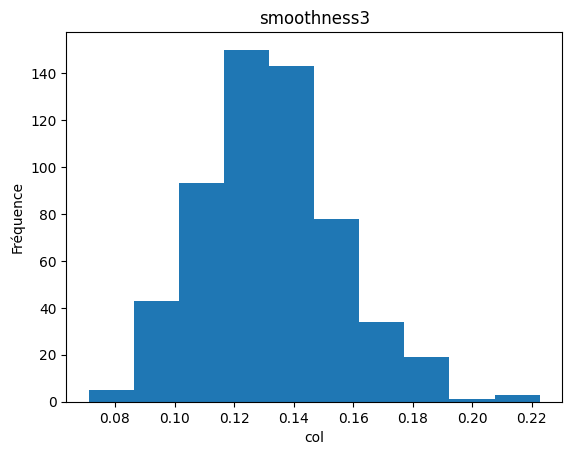


compactness3
 count    569.000000
mean       0.254265
std        0.157336
min        0.027290
25%        0.147200
50%        0.211900
75%        0.339100
max        1.058000
Name: compactness3, dtype: float64


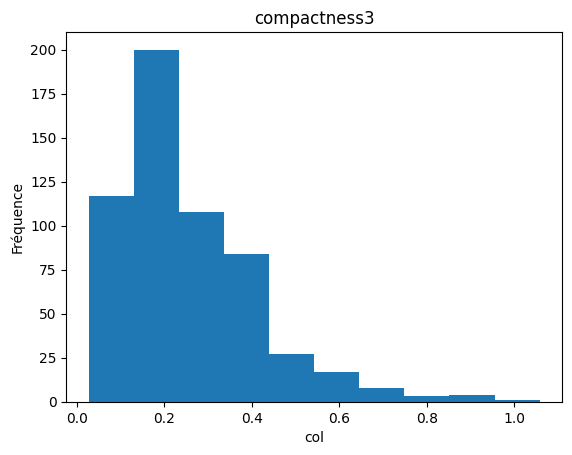


concavity3
 count    569.000000
mean       0.272188
std        0.208624
min        0.000000
25%        0.114500
50%        0.226700
75%        0.382900
max        1.252000
Name: concavity3, dtype: float64


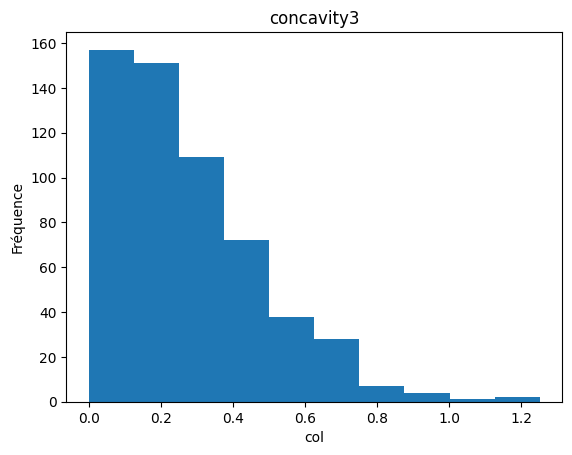


concave_points3
 count    569.000000
mean       0.114606
std        0.065732
min        0.000000
25%        0.064930
50%        0.099930
75%        0.161400
max        0.291000
Name: concave_points3, dtype: float64


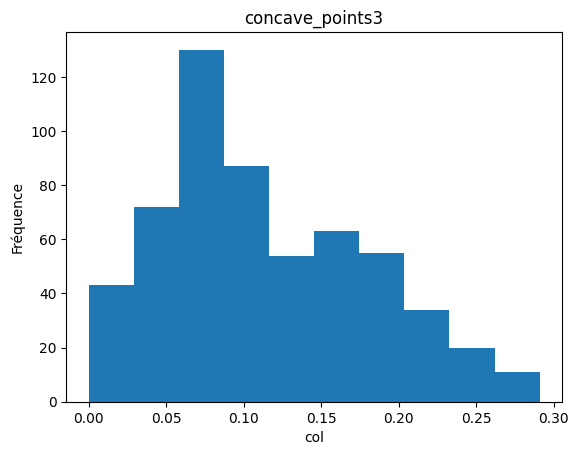


symmetry3
 count    569.000000
mean       0.290076
std        0.061867
min        0.156500
25%        0.250400
50%        0.282200
75%        0.317900
max        0.663800
Name: symmetry3, dtype: float64


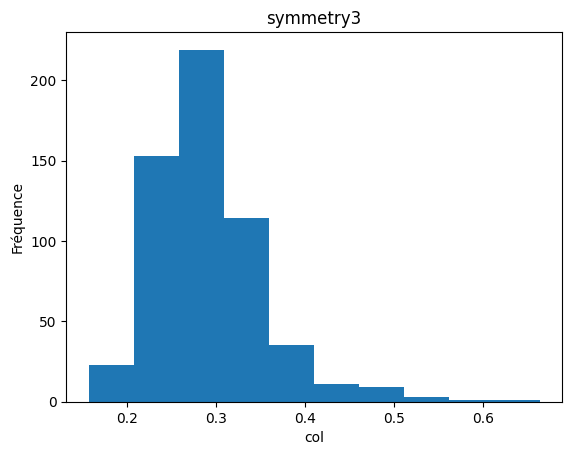


fractal_dimension3
 count    569.000000
mean       0.083946
std        0.018061
min        0.055040
25%        0.071460
50%        0.080040
75%        0.092080
max        0.207500
Name: fractal_dimension3, dtype: float64


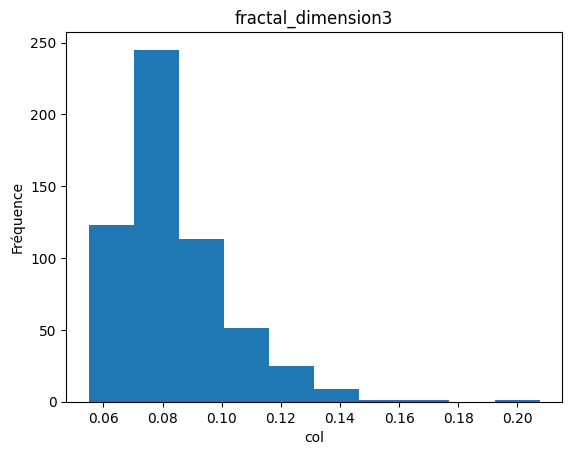

<Axes: >

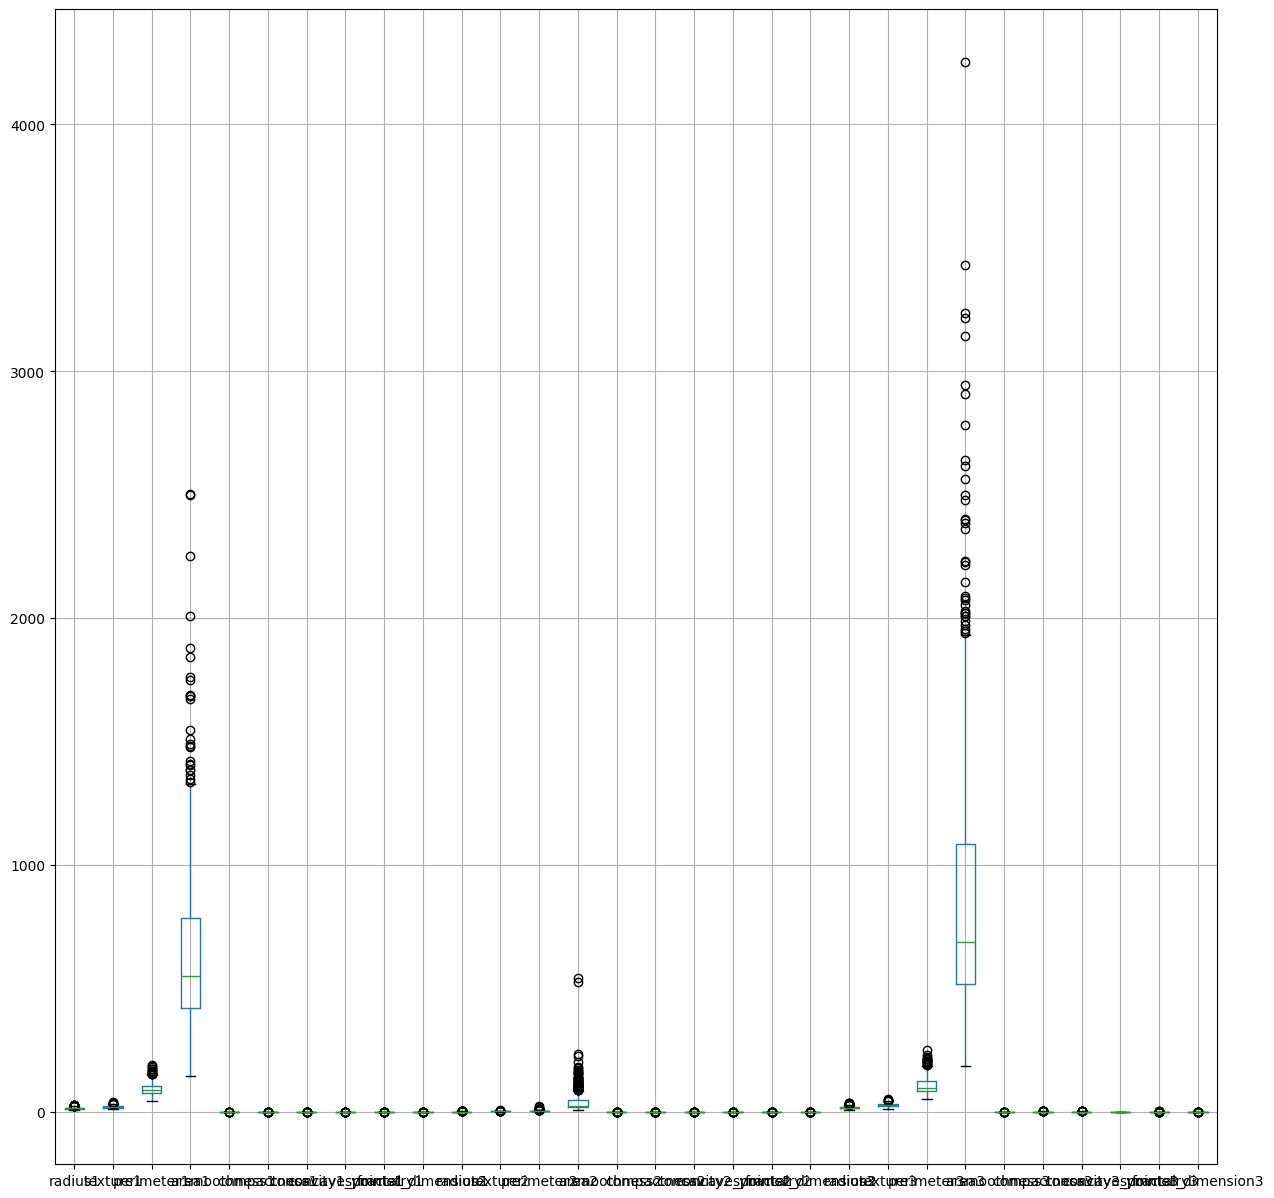

In [45]:
import matplotlib.pyplot as plt

for col in X.columns:
    print(col)
    print(f" {X[col].describe()}")

    plt.hist(X[col]) #Pour l'analyse de la distribution des données.
    plt.title(col)
    plt.xlabel('col')
    plt.ylabel('Fréquence')

    plt.show()


    print("")

X.boxplot(figsize=(15,15)) #Pour l'analyse de la dispersion des données.



In [46]:
df.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

Vu la complexité de lecture du graphique complet du boxplot, nous allons faire une séparation et cibler les colomns 'area1','area2','area3', car en se basant sur l'histogramme, le describe et le boxplot général, elles présentent beaucoup de valeurs abérantes. 

In [47]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

area1
 count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area1, dtype: float64


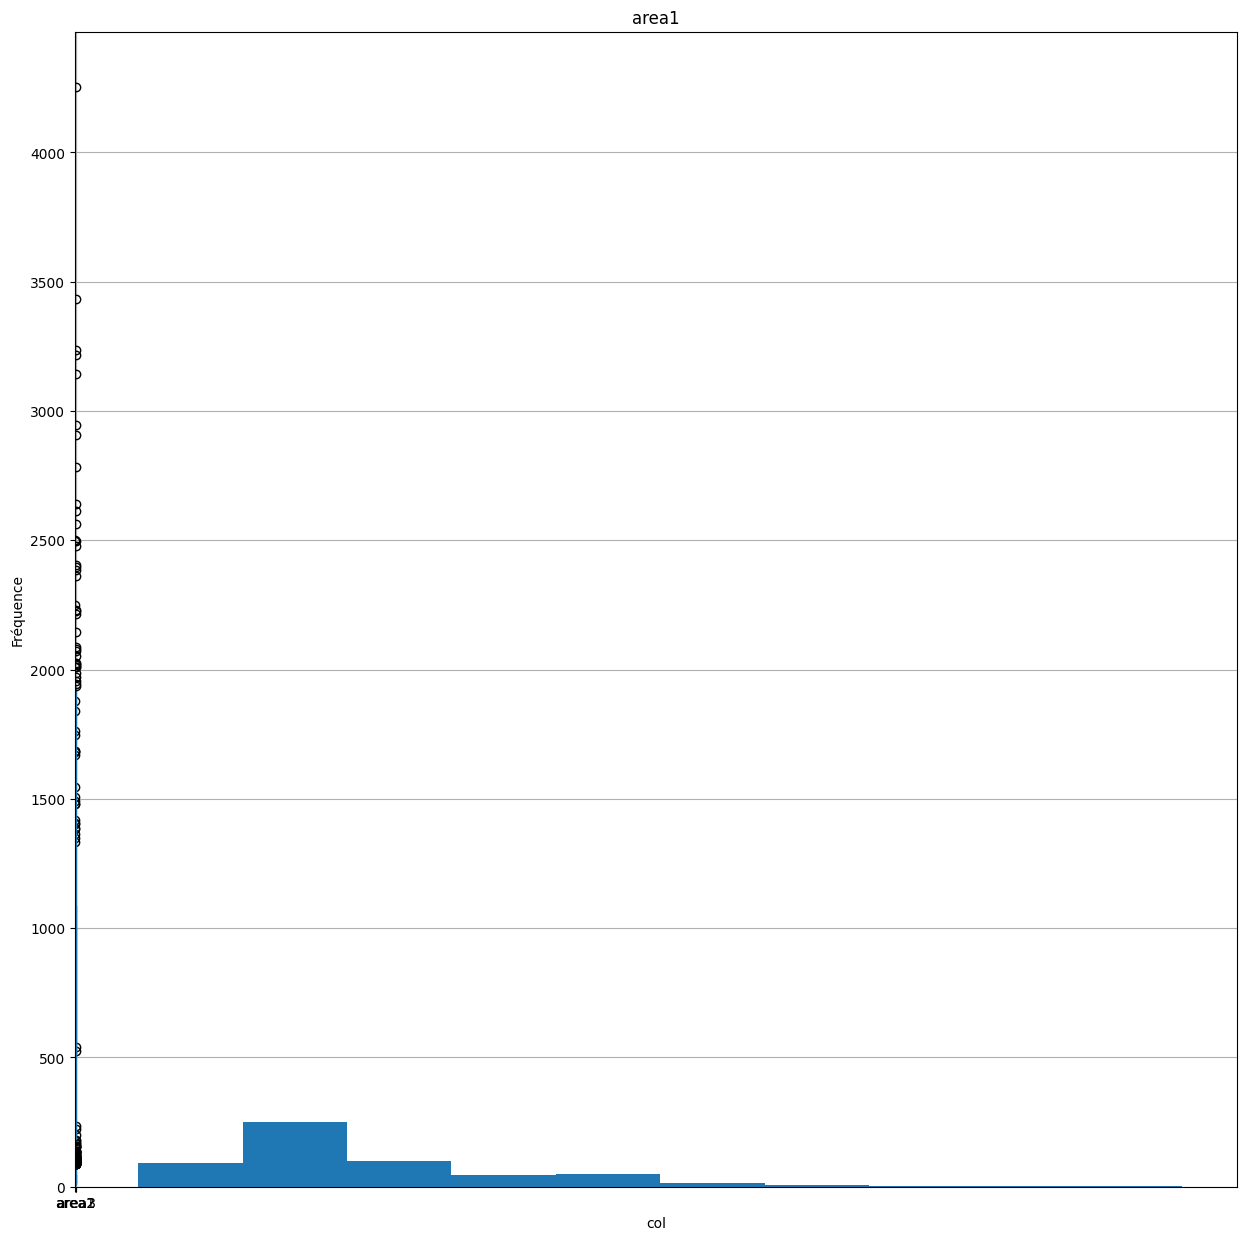


area2
 count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: area2, dtype: float64


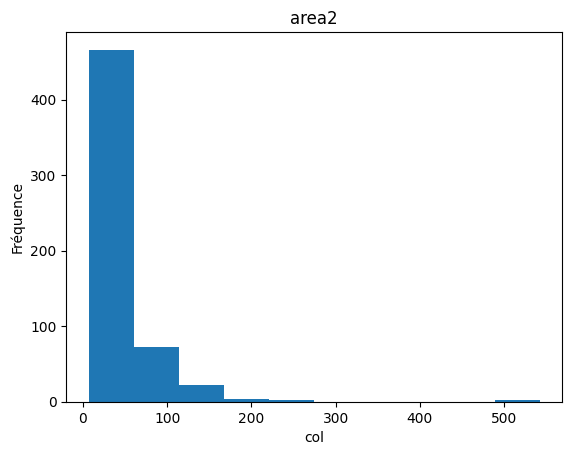


area3
 count     569.000000
mean      880.583128
std       569.356993
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      4254.000000
Name: area3, dtype: float64


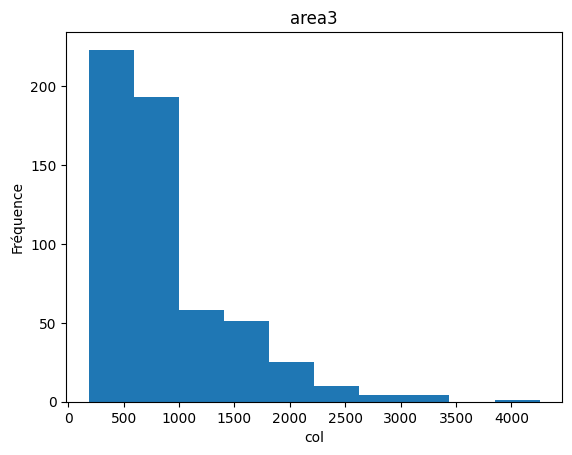

<Axes: >

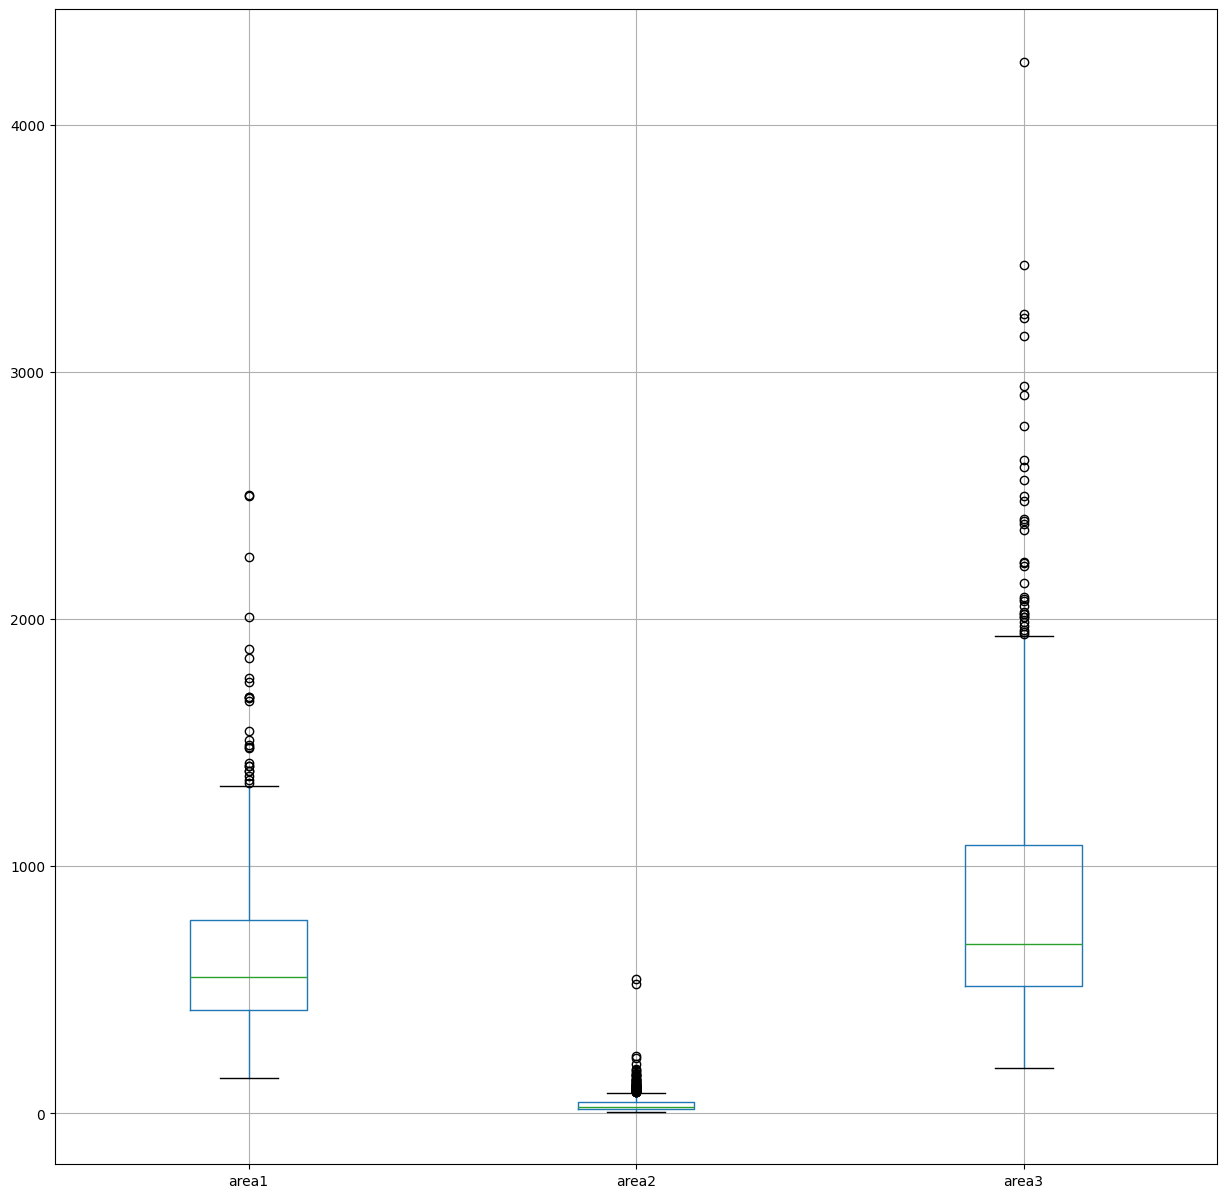

In [48]:
import matplotlib.pyplot as plt

X=X[['area1','area2','area3']]

X[['area1','area2','area3']].boxplot(figsize=(15,15)) #Pour l'analyse de la dispersion des données.

import matplotlib.pyplot as plt

for col in X.columns:
    print(col)
    print(f" {X[col].describe()}")

    plt.hist(X[col]) #Pour l'analyse de la distribution des données.
    plt.title(col)
    plt.xlabel('col')
    plt.ylabel('Fréquence')

    plt.show()


    print("")

X.boxplot(figsize=(15,15)) #Pour l'analyse de la dispersion des données.

area1 (area 1) : Surface moyenne des noyaux cellulaires

La boîte est large, ce qui montre une forte variabilité entre les échantillons.

La médiane est autour de 600–700, ce qui correspond à la surface moyenne typique d’un noyau.

Les valeurs extrêmes (outliers) vont au-delà de 2000, voire 4000.
Ces valeurs très élevées représentent des cellules anormalement grandes,
souvent associées à des tumeurs malignes.

Interprétation : cette variable est dispersée et asymétrique, dominée par quelques cas extrêmes.



area2 (area_se) : Erreur standard / variation locale de la surface

La boîte est très aplatie, centrée sur des valeurs proches de 0 à 50.

Cela signifie que la plupart des cellules ont une surface très stable,
avec peu de fluctuations d’un échantillon à l’autre.

Quelques outliers sont visibles, mais ils restent rares et faibles.

Interprétation : area_se est une variable faiblement dispersée,
et ne présente que peu d’extrêmes. Elle n’a pas besoin d’un traitement lourd.



area3 (area_worst) :  Surface maximale observée dans l’image

La médiane est plus élevée (autour de 900–1000) que celle de area 1.

La dispersion est importante, et de nombreux outliers s’étendent au-delà de 3000–4000.

Cela reflète la présence de cellules anormalement grandes dans certains cas,
typiques des tumeurs malignes très développées.

Interprétation : area_worst amplifie la tendance observée dans area_mean,
en mettant encore plus en évidence les cas extrêmes.


Nous devons faire  attention dans le traitement de ces données car elles véhicules des informations importantes.



Les outliers dans les variables comme area 1 ou area_worst ne sont pas forcément des erreurs de mesure.
Ils peuvent traduire :

des cellules réellement très grandes,

typiques des tumeurs malignes,

donc très informatives pour le modèle.

Autrement dit, ce ne sont pas des anomalies à corriger (obligatoirement), mais des signaux biologiques importants.

###  Etude de l'étiquette

In [63]:
df['Diagnosis'].value_counts()


Diagnosis
B    357
M    212
Name: count, dtype: int64

In [64]:
df['Diagnosis'].isna().sum()

np.int64(0)

<Axes: >

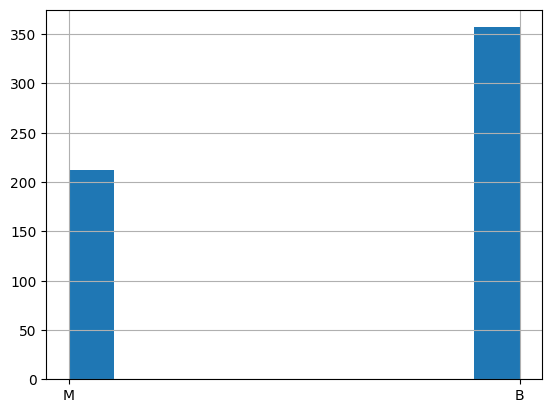

In [62]:
df['Diagnosis'].hist()

On remarque que notre jeu de données est  imbalancé. Ce qui est une réalité pour les dataframes liées à la détection des annomalies. En effet il y a plus de cas bénins que de malades

  Donc l'usage des méthodes d'équilibrage( stratification , suréchantillonnage, souséchantillonnage) pourra être prise en compte  ainsi que l'évaluation des modèles avec des métriques appropriées.



##  II. Prétraitement des données

###  Données manquantes

In [65]:
df.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

Pas de données manquantes


#### gestion des données catégorielles

In [ ]:
df.select_dtypes(include=['object','category']).columns


Index(['Diagnosis'], dtype='object')

Etant donné que la cible n'a pas beaucoup d'occurence , nous allons utiliser le map pour juste remplacer les occurences

In [3]:
# Encodage de la variable cible : M = 1, B = 0
y=df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Vérification rapide
print(df['Diagnosis'].value_counts())


NameError: name 'df' is not defined

In [7]:
# Encodage de la variable cible : M = 1, B = 0
y=df['Diagnosis'] = df['Diagnosis'].map({'M': 0, 'B': 1})

# Vérification rapide
print(df['Diagnosis'].value_counts())

Diagnosis
1    357
0    212
Name: count, dtype: int64


#### Coorelation caractéristiques- caractéristiques / caractéristiques- étiquette

In [70]:
df.shape

(569, 31)

In [7]:
matrice=df.corr()
matrice


radius1  texture1  perimeter1     area1  smoothness1  \
radius1             1.000000  0.323782    0.997855  0.987357     0.170581   
texture1            0.323782  1.000000    0.329533  0.321086    -0.023389   
perimeter1          0.997855  0.329533    1.000000  0.986507     0.207278   
area1               0.987357  0.321086    0.986507  1.000000     0.177028   
smoothness1         0.170581 -0.023389    0.207278  0.177028     1.000000   
compactness1        0.506124  0.236702    0.556936  0.498502     0.659123   
concavity1          0.676764  0.302418    0.716136  0.685983     0.521984   
concave_points1     0.822529  0.293464    0.850977  0.823269     0.553695   
symmetry1           0.147741  0.071401    0.183027  0.151293     0.557775   
fractal_dimension1 -0.311631 -0.076437   -0.261477 -0.283110     0.584792   
radius2             0.679090  0.275869    0.691765  0.732562     0.301467   
texture2           -0.097317  0.386358   -0.086761 -0.066280     0.068406   
perimeter2          0.674172  0.281673    0.693135  0.726628     0.296092   
area2               0.735864  0.259845    0.744983  0.800086     0.246552   
smoothness2        -0.222600  0.006614   -0.202694 -0.166777     0.332375   
compactness2        0.206000  0.191975    0.250744  0.212583     0.318943   
concavity2          0.194204  0.143293    0.228082  0.207660     0.248396   
concave_points2     0.376169  0.163851    0.407217  0.372320     0.380676   
symmetry2          -0.104321  0.009127   -0.081629 -0.072497     0.200774   
fractal_dimension2 -0.042641  0.054458   -0.005523 -0.019887     0.283607   
radius3             0.969539  0.352573    0.969476  0.962746     0.213120   
texture3            0.297008  0.912045    0.303038  0.287489     0.036072   
perimeter3          0.965137  0.358040    0.970387  0.959120     0.238853   
area3               0.941082  0.343546    0.941550  0.959213     0.206718   
smoothness3         0.119616  0.077503    0.150549  0.123523     0.805324   
compactness3        0.413463  0.277830    0.455774  0.390410     0.472468   
concavity3          0.526911  0.301025    0.563879  0.512606     0.434926   
concave_points3     0.744214  0.295316    0.771241  0.722017     0.503053   
symmetry3           0.163953  0.105008    0.189115  0.143570     0.394309   
fractal_dimension3  0.007066  0.119205    0.051019  0.003738     0.499316   
Diagnosis           0.730029  0.415185    0.742636  0.708984     0.358560   

                    compactness1  concavity1  concave_points1  symmetry1  \
radius1                 0.506124    0.676764         0.822529   0.147741   
texture1                0.236702    0.302418         0.293464   0.071401   
perimeter1              0.556936    0.716136         0.850977   0.183027   
area1                   0.498502    0.685983         0.823269   0.151293   
smoothness1             0.659123    0.521984         0.553695   0.557775   
compactness1            1.000000    0.883121         0.831135   0.602641   
concavity1              0.883121    1.000000         0.921391   0.500667   
concave_points1         0.831135    0.921391         1.000000   0.462497   
symmetry1               0.602641    0.500667         0.462497   1.000000   
fractal_dimension1      0.565369    0.336783         0.166917   0.479921   
radius2                 0.497473    0.631925         0.698050   0.303379   
texture2                0.046205    0.076218         0.021480   0.128053   
perimeter2              0.548905    0.660391         0.710650   0.313893   
area2                   0.455653    0.617427         0.690299   0.223970   
smoothness2             0.135299    0.098564         0.027653   0.187321   
compactness2            0.738722    0.670279         0.490424   0.421659   
concavity2              0.570517    0.691270         0.439167   0.342627   
concave_points2         0.642262    0.683260         0.615634   0.393298   
symmetry2               0.229977    0.178009         0.095351   0.449137   
fractal_dimension2      0.507318    

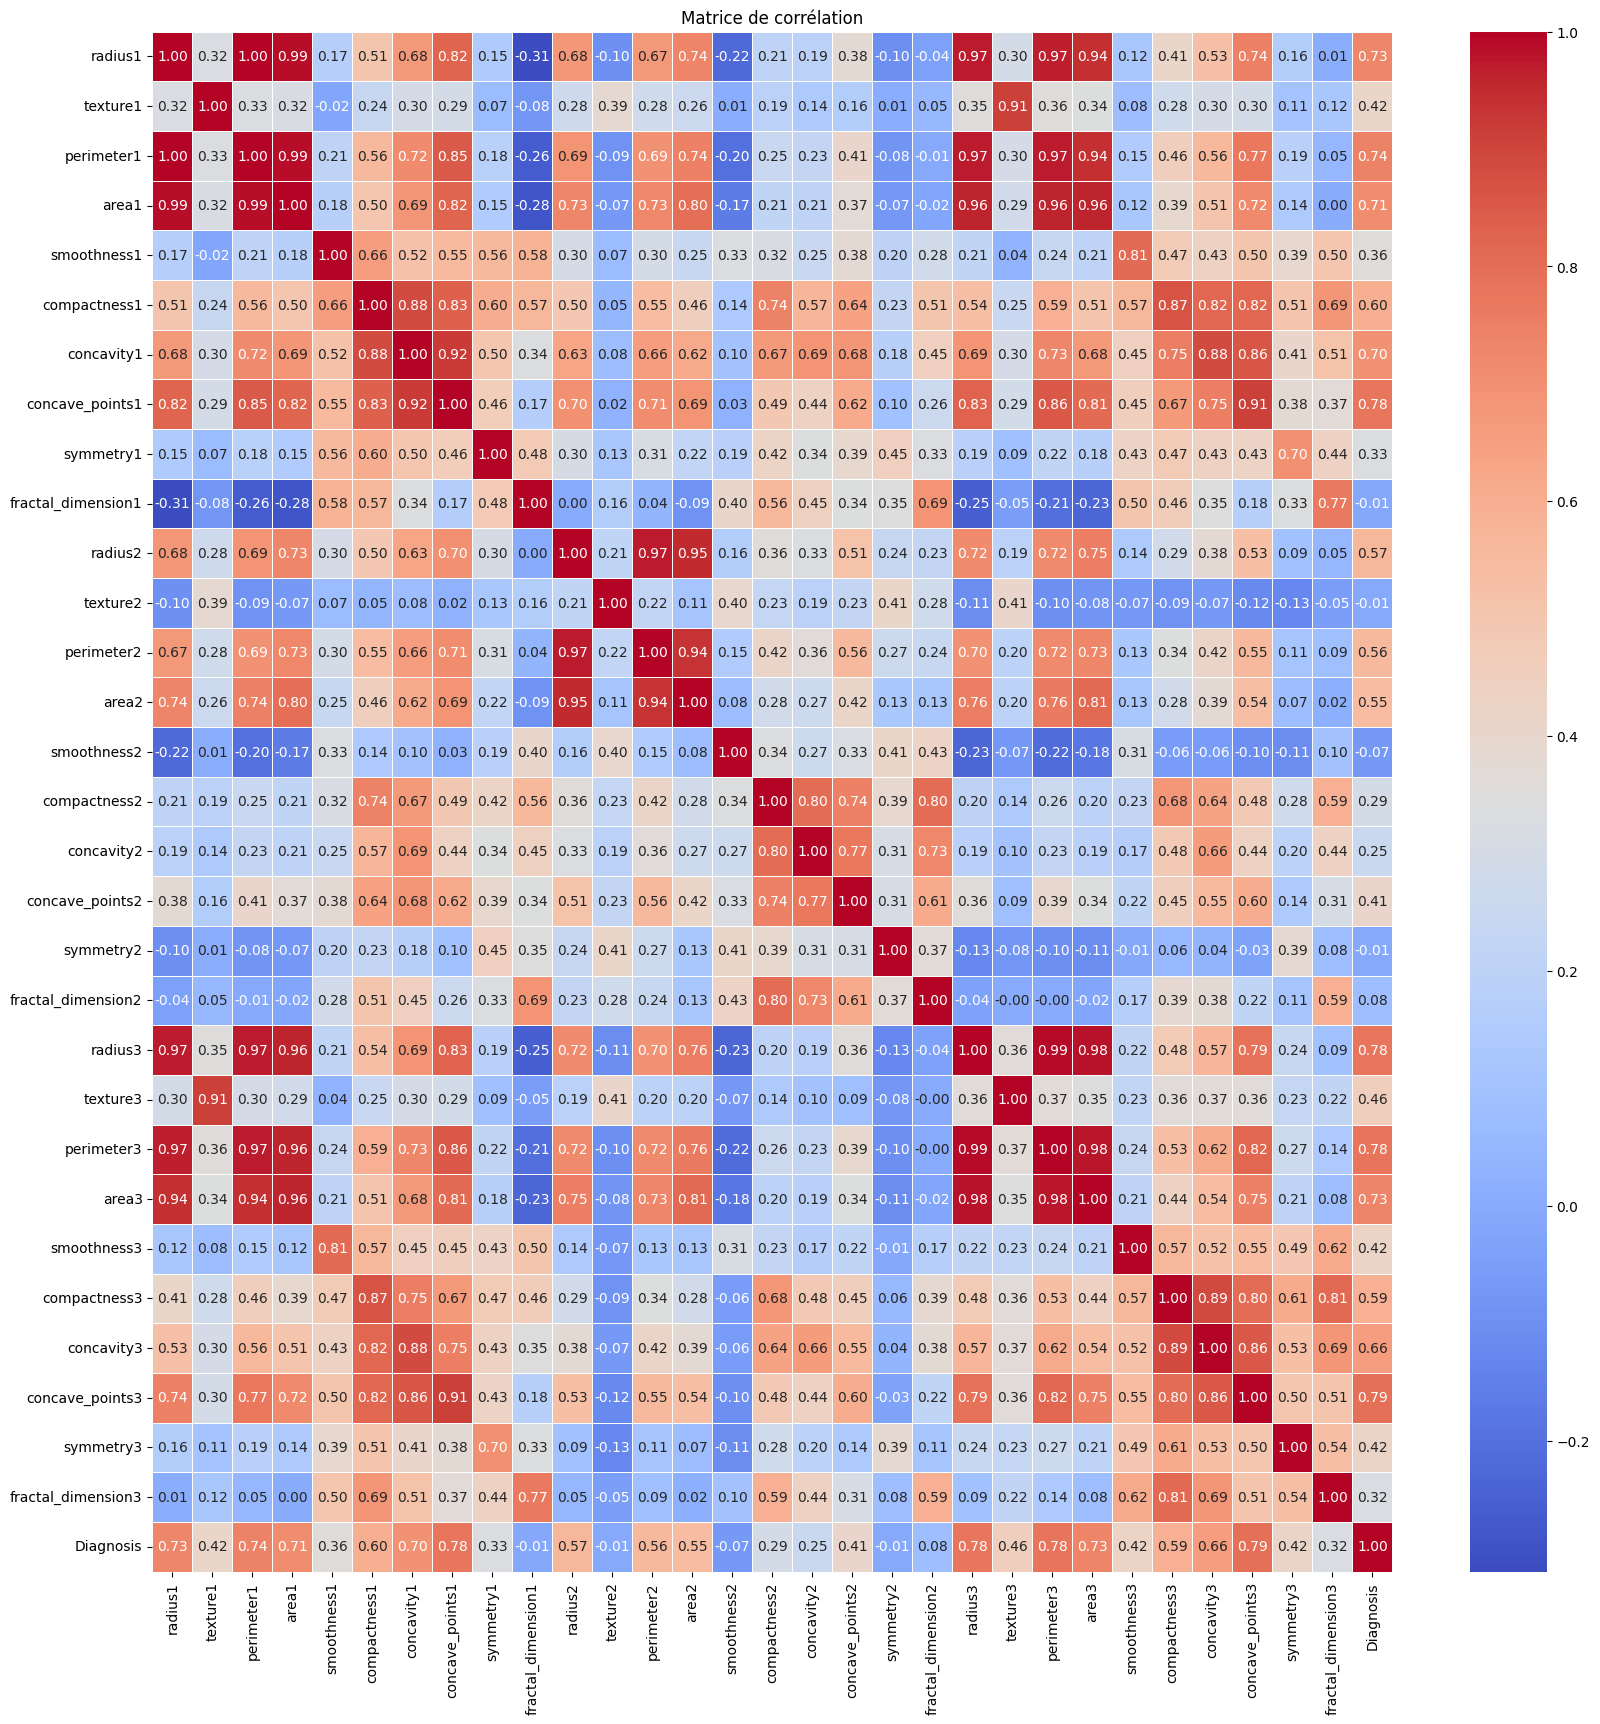

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(matrice, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


Interprétation 


**Certaines de nos caractéristiques sont fortement correlées avec la cible et d'autres non:**

-*Forte corrélation positive*

radius_mean, perimeter_mean, area 1: Les cellules malignes sont plus grandes.
concavity_mean, concave points_mean: Les bords des cellules malignes sont plus creusés et irréguliers.
radius_worst, perimeter_worst, area_worst: Les cellules les plus grandes dans un échantillon indiquent souvent la malignité.
concavity_worst, concave points_worst, compactness_worst: Les formes les plus irrégulières sont associées au cancer.
texture_worst, smoothness_worst: Plus de variation dans la texture → cellules cancéreuses.


En résumé :
Les mesures liées à la taille, à la forme et à l’irrégularité sont les meilleurs indicateurs positifs de malignité.



-*Forte corrélation négative avec Diagnosis*

Ces variables sont plus faibles pour les tumeurs malignes et plus fortes pour les bénignes.
smoothness_mean, symmetry_mean, fractal_dimension_mean: Les tumeurs bénignes ont des contours plus réguliers et plus symétriques.

fractal_dimension_worst, symmetry_worst: Les formes restent plus homogènes et simples chez les bénignes.



-*Corrélation faible à modérée*

Ces variables ne sont pas très discriminantes seules, mais peuvent aider en combinaison.

texture_mean, smoothness_se, compactness_se, symmetry_se, fractal_dimension_se : Donnent une idée de la variation locale, mais peu déterminantes seules.
area_se, radius_se, perimeter_se: Corrélation intermédiaire, parfois utile pour modéliser la variabilité.

Note:
Notons que certaines caractéristiques ont une forte correlation entre elle ce qui est normal, vu la méthode utilisée pour l'obtention des données. En effet les données sont obtenues par calcul donc il peut avoir une relation  entre le calcul de périmètre et le calcul de la surface. Nous pourrons, intervenir sur elles pour voir comment elles vont impacter notre étude. 



#### Normalisation

array([[<Axes: title={'center': 'radius1'}>,
        <Axes: title={'center': 'texture1'}>,
        <Axes: title={'center': 'perimeter1'}>,
        <Axes: title={'center': 'area1'}>,
        <Axes: title={'center': 'smoothness1'}>,
        <Axes: title={'center': 'compactness1'}>],
       [<Axes: title={'center': 'concavity1'}>,
        <Axes: title={'center': 'concave_points1'}>,
        <Axes: title={'center': 'symmetry1'}>,
        <Axes: title={'center': 'fractal_dimension1'}>,
        <Axes: title={'center': 'radius2'}>,
        <Axes: title={'center': 'texture2'}>],
       [<Axes: title={'center': 'perimeter2'}>,
        <Axes: title={'center': 'area2'}>,
        <Axes: title={'center': 'smoothness2'}>,
        <Axes: title={'center': 'compactness2'}>,
        <Axes: title={'center': 'concavity2'}>,
        <Axes: title={'center': 'concave_points2'}>],
       [<Axes: title={'center': 'symmetry2'}>,
        <Axes: title={'center': 'fractal_dimension2'}>,
        <Axes: title={'cent

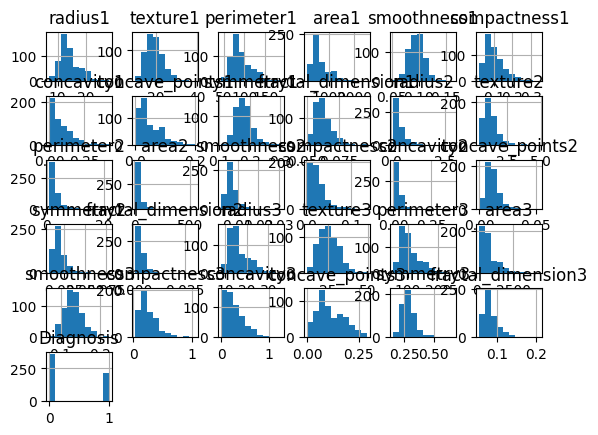

In [ ]:
X=df.drop(columns=['Diagnosis'])
df.hist()

La majorité de nos variables ont une distribution normale donc nous alors faire la standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.set_output(transform='pandas')

# Appliquer la normalisation
X = scaler.fit_transform(X)

.

# Partie 2: Implémentation d'un clustering sur la partie des caractéristiques de notre jeu de donnée

## I. Détermination des hyperparamètres optimales 

In [83]:
X.shape

(569, 30)

Nous allons écrire une fonction pour déterminer k et eps

Même si nous savons que k=2, nous somme currieux de savoir lequel est identifié par la méthode de coude comme étant l'optimal

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

def find_k_and_eps(df, k_max=10, min_pts_ratio=2.5, sample_max=2000, display=True):


    X = StandardScaler().fit_transform(df.values)



    if len(X) > sample_max:
        idx = np.random.choice(len(X), sample_max, replace=False)
        X_sample = X[idx]
    else:
        X_sample = X

    inertias, silhouettes, davies_bouldin = [], [], []
    K_values = range(2, k_max + 1)

    #  Recherche du meilleur K pour KMeans
    for k in K_values:
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=2048)
        labels = kmeans.fit_predict(X_sample)

        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X_sample, labels))
        davies_bouldin.append(davies_bouldin_score(X_sample, labels))

    k_opt = K_values[int(np.argmax(silhouettes))] # Prends la valeur de K qui a donné le meilleur score silhouette

    #  Recherche de eps optimal pour DBSCAN
    minPts = int(df.shape[1] * min_pts_ratio)
    neigh = NearestNeighbors(n_neighbors=minPts, n_jobs=-1)
    nbrs = neigh.fit(X_sample)
    distances, _ = nbrs.kneighbors(X_sample)
    k_distances = np.sort(distances[:, -1])

    # Détection automatique du coude
    i = np.arange(len(k_distances))
    p1 = np.array([0, k_distances[0]])
    p2 = np.array([len(k_distances) - 1, k_distances[-1]])
    distance_to_line = np.abs(np.cross(p2 - p1, np.vstack((i, k_distances)).T - p1)) / np.linalg.norm(p2 - p1)
    eps_optimal = k_distances[np.argmax(distance_to_line)]

    #  Visualisation
    if display:
        plt.figure(figsize=(18, 5))

        plt.subplot(1, 3, 1)
        plt.plot(K_values, inertias, 'o-', label='Inertie')
        plt.axvline(k_opt, color='r', linestyle='--', label=f'K optimal = {k_opt}')
        plt.title("Méthode du coude (Inertie)")
        plt.xlabel("K")
        plt.ylabel("Inertie")
        plt.legend()

        plt.subplot(1, 3, 2)
        plt.plot(K_values, silhouettes, 'o-', color='green', label='Silhouette')
        plt.axvline(k_opt, color='r', linestyle='--')
        plt.title("Score Silhouette")
        plt.xlabel("K")
        plt.ylabel("Silhouette")
        plt.legend()

        plt.subplot(1, 3, 3)
        plt.plot(K_values, davies_bouldin, 'o-', color='orange', label='Davies-Bouldin')
        plt.axvline(k_opt, color='r', linestyle='--')
        plt.title("Indice Davies-Bouldin (plus petit = meilleur)")
        plt.xlabel("K")
        plt.ylabel("Score")
        plt.legend()

        plt.tight_layout()
        plt.show()

        # k-distance
        plt.figure(figsize=(6, 4))
        plt.plot(k_distances)
        plt.axhline(y=eps_optimal, color='r', linestyle='--', label=f"ε optimal = {eps_optimal:.4f}")
        plt.title(f"Courbe k-distance (minPts = {minPts})")
        plt.xlabel("Points triés")
        plt.ylabel(f"Distance au {minPts}ᵉ voisin")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Affichage
    print(f" K optimal trouvé : {k_opt}")
    print(f" Epsilon optimal trouvé : {eps_optimal:.4f}")
    print(f" minPts utilisé : {minPts}")

    return k_opt, eps_optimal


C:\Users\MEHOUN MARTINIEN\AppData\Local\Temp\ipykernel_3788\2110152141.py:46: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  distance_to_line = np.abs(np.cross(p2 - p1, np.vstack((i, k_distances)).T - p1)) / np.linalg.norm(p2 - p1)


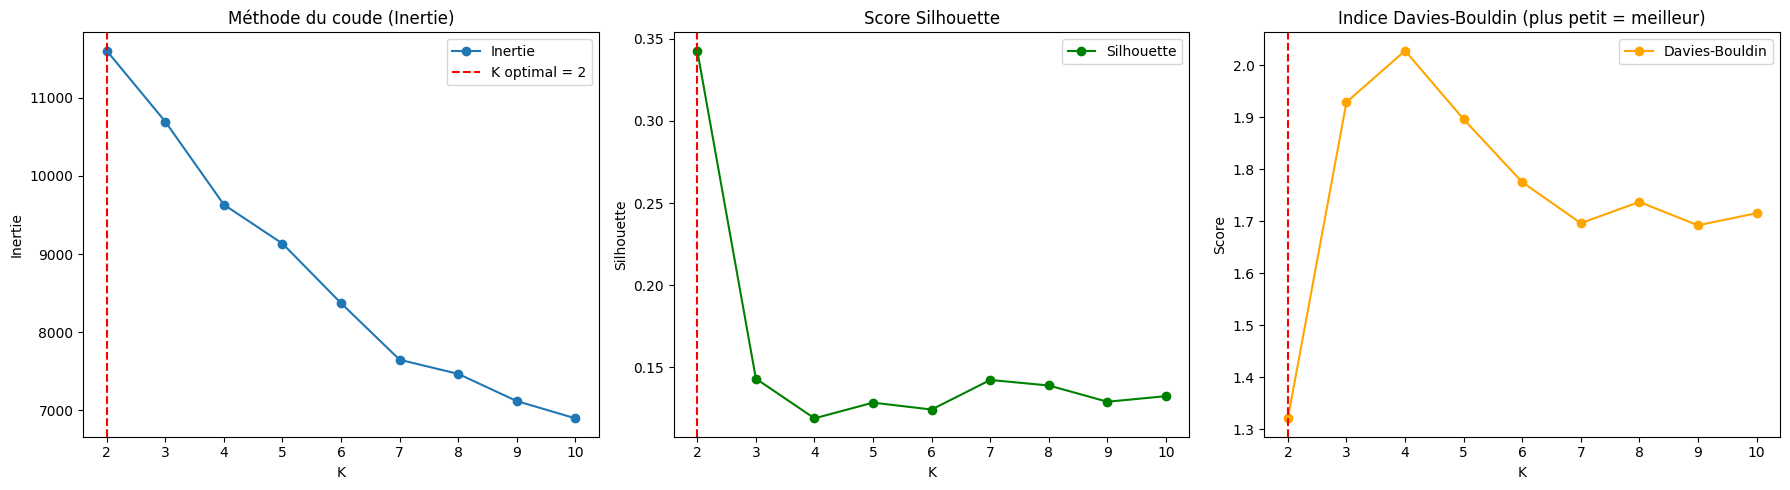

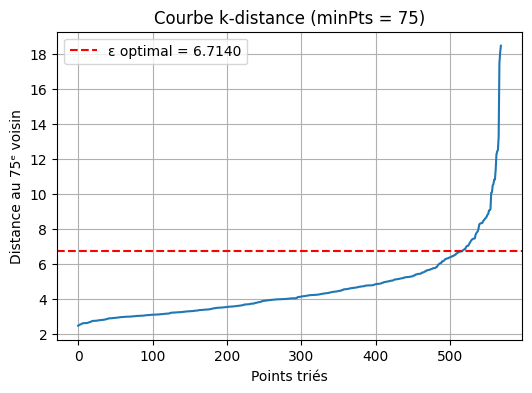

 K optimal trouvé : 2
 Epsilon optimal trouvé : 6.7140
 minPts utilisé : 75
K optimal = 2
Epsilon optimal = 6.714046275145607


In [81]:
k, eps = find_k_and_eps(X,sample_max=569)
print("K optimal =", k)
print("Epsilon optimal =", eps)

Interprétation des résultats :

Sur le graphique du score Silhouette, la valeur maximale semble se situer autour de k=2 (score d'environ 0.30-0.35), ce qui confirme que k=2 est optimal car un score plus proche de 1 indique de meilleurs clusters.

Pour l'indice Davies-Bouldin, la valeur minimale apparaît également vers k=2, ce qui est cohérent puisque pour cet indice, plus la valeur est faible, meilleure est la séparation entre les clusters.

Ainsi, les trois métriques convergent :

Méthode du coude : k=2

Score Silhouette maximal : k=2

Indice Davies-Bouldin minimal : k=2

Conclusion : k=2 est clairement le choix optimal.

Cependant, k=7 est un candidat potentiel.

Sur le graphique d'inertie (méthode du coude), on observe un premier coude marqué à k=2, mais un second coude subtil apparaît vers k=7, où la décroissance de l'inertie ralentit à nouveau.

Pour le score Silhouette, bien que le maximum absolu soit à k=2, la valeur pour k=7 reste relativement correcte (environ 0.15-0.20), ce qui n'est pas négligeable.

L'indice Davies-Bouldin montre également une valeur basse pour k=7, comparable à d'autres k intermédiaires.

k=7 pourrait donc être un bon compromis mais pour notre étude , le domaine métier ne justifie pas  une segmentation plus fine.

Nous allons garder k=2 pour la suite de l'analyse.



## II. Comparaison de plusieurs algorithme de clustering 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import hdbscan
from scipy.spatial.distance import pdist, squareform

# Dunn Index 
def dunn_index(X, labels, max_points=3000):
    if len(X) > max_points:
        idx = np.random.choice(len(X), max_points, replace=False)
        X = X[idx]
        labels = labels[idx]
    distances = squareform(pdist(X))
    clusters = np.unique(labels)
    clusters = [c for c in clusters if c != -1]
    if len(clusters) < 2:
        return 0
    intra = max([np.max(distances[labels == c][:, labels == c]) for c in clusters])
    inter = np.min([
        distances[np.ix_(labels == c1, labels == c2)].min()
        for i, c1 in enumerate(clusters) for c2 in clusters[i + 1:]
    ])
    return inter / intra

#Stabilité
def stability_score(X, labels_func, runs=3, ratio=0.3):
    scores = []
    n = len(X)
    m = int(ratio * n)
    for _ in range(runs):
        idx1 = np.random.choice(n, m, replace=False)
        idx2 = np.random.choice(n, m, replace=False)
        l1 = labels_func(X[idx1])
        l2 = labels_func(X[idx2])
        min_len = min(len(l1), len(l2))
        s = np.mean(l1[:min_len] == l2[:min_len])
        scores.append(s)
    return np.mean(scores)




In [11]:
from sklearn.metrics import f1_score

def clustering_compare_full(X,y, k=2, eps=0.5, minPts=10,
                            algos=["kmeans", "dbscan", "hdbscan", "spectral"],
                            pca_components=None):
    print(" Standardisation des données...")
    X = StandardScaler().fit_transform(df.values)
    y_true = y  

    # PCA facultative
    if pca_components is not None and pca_components < X.shape[1]:
        print(f"Réduction PCA à {pca_components} composantes...")
        X = PCA(n_components=pca_components, random_state=42).fit_transform(X)

    results = {}
    print(" Exécution des algorithmes sur tout le dataset...")

    # KMeans
    if "kmeans" in algos:
        print(" MiniBatchKMeans...")
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=4096).fit(X)
        labels = kmeans.labels_
        results["KMeans"] = {
            "CH": calinski_harabasz_score(X, labels),
            "Silhouette": silhouette_score(X, labels, sample_size=5000, random_state=42),
            "Dunn": dunn_index(X, labels),
            "Davies": davies_bouldin_score(X, labels),
            "Stability": stability_score(X, lambda data: MiniBatchKMeans(
                n_clusters=k, random_state=42, batch_size=4096).fit(data).labels_),
            "F1_macro": f1_score(y_true, labels, average="macro")  #
        }
        results["KMeans"]["labels"] = labels

    # DBSCAN
    if "dbscan" in algos:
        print(" DBSCAN...")
        dbs = DBSCAN(eps=eps, min_samples=minPts, n_jobs=-1).fit(X)
        labels = dbs.labels_
        if len(set(labels)) > 1:
            results["DBSCAN"] = {
                "CH": calinski_harabasz_score(X, labels),
                "Silhouette": silhouette_score(X, labels, sample_size=5000, random_state=42),
                "Dunn": dunn_index(X, labels),
                "Davies": davies_bouldin_score(X, labels),
                "Stability": stability_score(X, lambda data: DBSCAN(
                    eps=eps, min_samples=minPts, n_jobs=-1).fit(data).labels_),
                "F1_macro": f1_score(y_true, labels, average="macro")  # 
            }
        else:
            results["DBSCAN"] = {"CH": 0, "Silhouette": 0, "Dunn": 0,
                                 "Davies": float("inf"), "Stability": 0,
                                 "F1_macro": 0}
        results["DBSCAN"]["labels"] = labels

    # HDBSCAN
    if "hdbscan" in algos:
        print(" HDBSCAN...")
        hdb = hdbscan.HDBSCAN(min_cluster_size=minPts, core_dist_n_jobs=-1).fit(X)
        labels = hdb.labels_
        if len(set(labels)) > 1:
            results["HDBSCAN"] = {
                "CH": calinski_harabasz_score(X, labels),
                "Silhouette": silhouette_score(X, labels, sample_size=5000, random_state=42),
                "Dunn": dunn_index(X, labels),
                "Davies": davies_bouldin_score(X, labels),
                "Stability": stability_score(X, lambda data: hdbscan.HDBSCAN(
                    min_cluster_size=minPts, core_dist_n_jobs=-1).fit(data).labels_),
                "F1_macro": f1_score(y_true, labels, average="macro")  # 
            }
        else:
            results["HDBSCAN"] = {"CH": 0, "Silhouette": 0, "Dunn": 0,
                                  "Davies": float("inf"), "Stability": 0,
                                  "F1_macro": 0}
        results["HDBSCAN"]["labels"] = labels

    # Spectral
    if "spectral" in algos:
        print(" Spectral Clustering...")
        sp = SpectralClustering(
            n_clusters=k, affinity='nearest_neighbors',
            assign_labels='kmeans', random_state=42, n_jobs=-1
        ).fit(X)
        labels = sp.labels_
        results["Spectral"] = {
            "CH": calinski_harabasz_score(X, labels),
            "Silhouette": silhouette_score(X, labels, sample_size=5000, random_state=42),
            "Dunn": dunn_index(X, labels),
            "Davies": davies_bouldin_score(X, labels),
            "Stability": stability_score(X, lambda data: SpectralClustering(
                n_clusters=k, affinity='nearest_neighbors', assign_labels='kmeans',
                random_state=42, n_jobs=-1).fit(data).labels_),
            "F1_macro": f1_score(y_true, labels, average="macro") 
        }
        results["Spectral"]["labels"] = labels

    # Nouvelle métrique affichée
    metrics = ["CH", "Silhouette", "Dunn", "Davies", "Stability", "F1_macro"]

    for metric in metrics:
        plt.figure(figsize=(6, 4))
        plt.bar(results.keys(), [results[a][metric] for a in results])
        plt.title(f"Comparaison des algorithmes - {metric}")
        plt.ylabel("Score")
        plt.show()

    best = max(results, key=lambda a: (
        results[a]["Silhouette"] + results[a]["CH"] + results[a]["Dunn"] + results[a]["Stability"]+ results[a]["F1_macro"]
        - results[a]["Davies"]
    ))
    print(f" Le meilleur algorithme est : {best}")
    best_labels = results[best]["labels"]

    return best, best_labels, results


 Standardisation des données...
Réduction PCA à 4 composantes...
 Exécution des algorithmes sur tout le dataset...
 MiniBatchKMeans...
 DBSCAN...
 HDBSCAN...


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 Spectral Clustering...


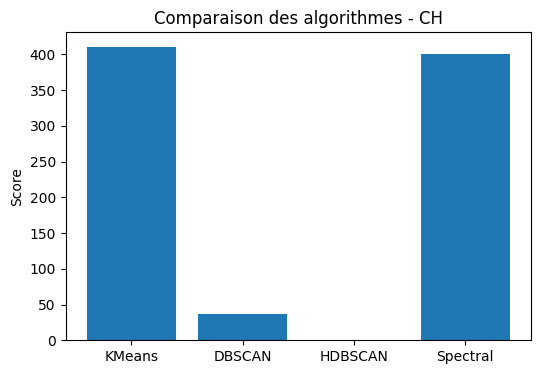

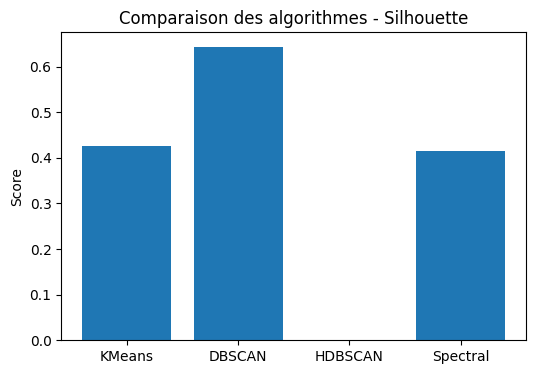

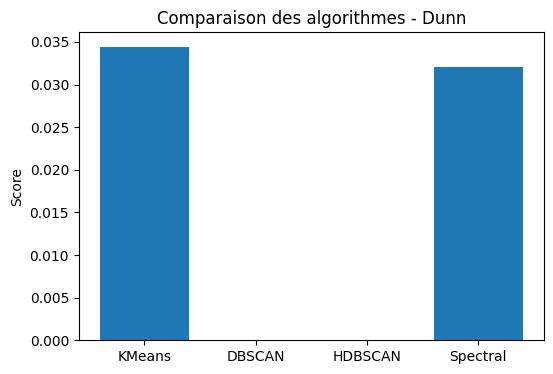

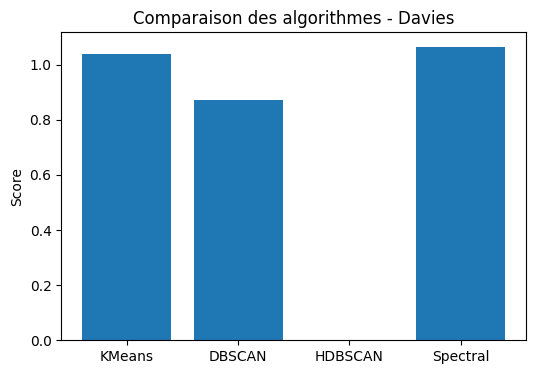

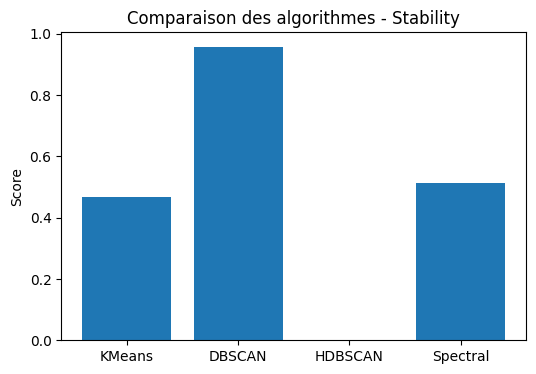

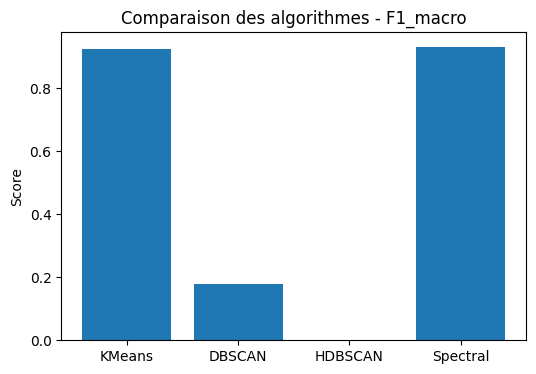

 Le meilleur algorithme est : KMeans


In [12]:
best, labels, results = clustering_compare_full(X,y, k=2, eps=6.714046275145607, minPts=75, pca_components=4)

Conclusion :

K-means est le meilleur algorithme dans cette situation :

Score Calinski-Harabasz (CH) très élevé (≈400) : nettement supérieur aux autres, indiquant une excellente séparation entre les clusters

Score Silhouette le plus haut (≈0.55) : meilleure cohérence interne des clusters

Indice Davies-Bouldin faible : bonne séparation et compacité

Score Dunn correct : performance moyenne mais compétitive

Stabilité correcte : comparable aux autres méthodes

HDBSCAN montrent des performances médiocres :

Scores très bas sur toutes les métriques (Silhouette ≈0.1, CH ≈50)

Probablement incapables de détecter une structure clusterisée efficacement. 


Par contre DBSCAN a été très compétitif. avec un score F1  élevé par rapport au autres, mais une indice CH faible (mauvaise séparation) , une indice de DB plus faible, et  une indice de dunn quasiment null. 

Spectral Clustering obtient des résultats moyens mais inférieurs à K-means.



Choix : K-means avec k=2 (confirmé par les analyses précédentes) est la méthode optimale pour ce jeu de données.

## II. Aplication du meilleur algorithme de clustering 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def kmeans_visual(df, k=2, sample_size=2000, pca_components=2,show_graphic=True, random_state=42):
 

    # Standardisation 
    X = StandardScaler().fit_transform(df)

    # Entraînement du modèle
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
    labels = kmeans.fit_predict(X)

    #  Échantillonnage pour affichage
    n = len(X)
    if n > sample_size:
        idx = np.random.choice(n, sample_size, replace=False)
        X_sample = X[idx]
        labels_sample = labels[idx]
    else:
        X_sample = X
        labels_sample = labels

    # Réduction PCA pour visualisation
    if X_sample.shape[1] > pca_components:
        X_visu = PCA(n_components=pca_components, random_state=random_state).fit_transform(X_sample)
    else:
        X_visu = X_sample


    if show_graphic:
      #Visualisation
      plt.figure(figsize=(7,6))
      scatter = plt.scatter(
          X_visu[:,0], X_visu[:,1],
          c=labels_sample, cmap='tab10', s=10, alpha=0.7
      )
      plt.title(f"K-Means (k={k}) sur {len(X_sample)} points")
      plt.xlabel("Composante 1 (PCA)" if pca_components >= 2 else "Feature 1")
      plt.ylabel("Composante 2 (PCA)" if pca_components >= 2 else "Feature 2")
      plt.colorbar(scatter, label="Cluster")
      plt.show()

    # ----  Retour ----
    return labels, kmeans


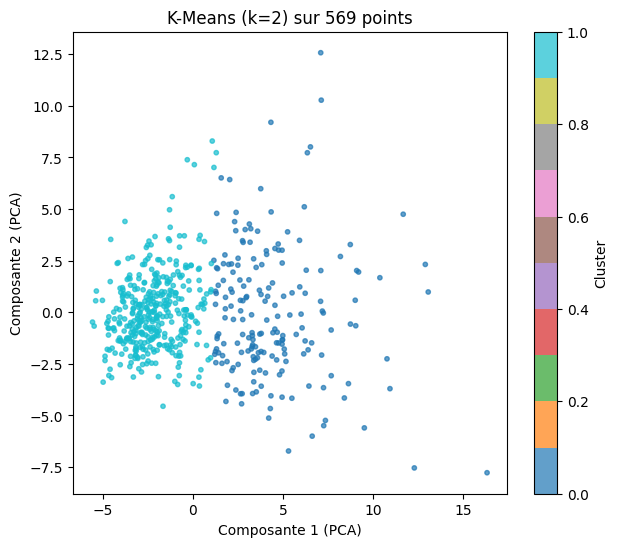

In [ ]:
labels, model = kmeans_visual(X,y, k=2, sample_size=569)

In [89]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

Nous pourrons utiliser les labels de clusters obtenus pour :
- Analyser la répartition des tumeurs bénignes vs malignes dans chaque cluster.
- Étudier les caractéristiques moyennes des cellules dans chaque cluster.
- l'ajouter comme nouvelle caractéristique pour améliorer la prédiction finale.

# Partie 3: Apprentissage supervisé (classification)

Dans cette partie. Notre objectif est de prédire la cible Diagnosis à partir des caractéristiques de notre jeu de donnée

Nous allons refaire le chargement et la séparation des données en train et test

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd 

def chargement_donnees_ucirepo(test_size=0.2, random_state=42, target='Diagnosis'):
      # fetch dataset 
    breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
    
    # data (as pandas dataframes) 
    X = breast_cancer_wisconsin_diagnostic.data.features 
    y = breast_cancer_wisconsin_diagnostic.data.targets

    # remplace target binaire par une autre variable 'diagnostic'
    y = y.replace({"M": 1, "B": 0})



    df = pd.concat([X, y], axis=1)

    # metadata 
    print(breast_cancer_wisconsin_diagnostic.metadata) 
    
    # variable information 
    df.head()
    #séparation en train et test
    from sklearn.model_selection import train_test_split
    if target=='Diagnosis':
       train, test = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df['Diagnosis'])
    else:
       train, test = train_test_split(df, test_size=test_size, random_state=random_state)
     

    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    return df, train, test, X_train, y_train, X_test, y_test


In [4]:
df, train, test, X_train, y_train, X_test, y_test = chargement_donnees_ucirepo()

C:\Users\MEHOUN MARTINIEN\AppData\Local\Temp\ipykernel_7008\2571452646.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({"M": 1, "B": 0})


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

Nous allons utiliser juste la partie train pour les études durant l'entrainement des modèles et les analyses pour éviter la fuite des données

## I. Modélisation

Nous allons utiliser plusieurs algorithmes de classification pour prédire si une tumeur est bénigne ou maligne en fonction des caractéristiques des cellules.

**KNN**

Utilisé car il classe efficacement les tumeurs en se basant sur la similarité des cellules, utile pour un dataset propre comme WDBC.

**Logistic Regression**

Choisi pour fournir une baseline médicale interprétable et des probabilités claires pour le diagnostic binaire.

**Decision Tree**

Retenu car il donne une décision compréhensible et visualisable, ce qui facilite l’explication clinique.

**Random Forest**

Sélectionné car il réduit fortement l’overfitting des arbres individuels et gère très bien les variables non linéaires du dataset.

**Gradient Boosting**

Employé pour sa capacité à corriger progressivement les erreurs et détecter des relations subtiles entre caractéristiques cellulaires.

**Bagging**

Utilisé pour stabiliser les prédictions d’arbres instables et améliorer la robustesse sur des données légèrement bruitées.

**AdaBoost**

Choisi car il met l’accent sur les cellules difficiles à classer, ce qui améliore la précision sur les cas borderline.

**XGBoost**

Retenu pour sa performance élevée, ses régularisations intégrées et sa capacité à gérer les interactions complexes entre features.

**LightGBM**

Privilégié pour sa rapidité d’entraînement et sa grande efficacité sur des données numériques tabulaires comme celles du WDBC.

**CatBoost**

Sélectionné car il gère naturellement les relations non linéaires et offre une grande stabilité sans réglages complexes.


## Explication du choix des hyperparamètres

**KNN (KNeighborsClassifier)**

Hyperparamètre choisi : n_neighbors=5.

Justification : Le choix de 5 voisins est un compromis classique. Avec moins de voisins (1-2), le modèle devient très sensible au bruit et aux outliers. Avec trop de voisins (>10), la prédiction se “lisse” trop et perd en précision locale. Cette valeur est souvent utilisée comme point de départ.

Référence : Documentation officielle de scikit-learn pour KNN : KNeighborsClassifier (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)



**Logistic Regression**

Hyperparamètres choisis : max_iter=3000, solver='lbfgs'.

Justification :

max_iter=3000 : valeur augmentée par rapport à la valeur par défaut (100) pour garantir la convergence sur des datasets avec plusieurs features standardisées.

solver='lbfgs' : adapté aux datasets de taille petite à moyenne et stable pour la classification binaire.

Référence : Documentation scikit-learn : LogisticRegression
.

Remarque : La valeur de max_iter n’a pas de recommandation stricte ; elle est choisie pour s’assurer que le modèle converge.




**Decision Tree**

Hyperparamètre choisi : max_depth=None.

Justification : L’arbre est autorisé à se développer entièrement pour capturer toutes les interactions entre features. C’est une approche classique pour un test initial afin de mesurer la capacité maximale du modèle.

Référence : Documentation scikit-learn : DecisionTreeClassifier(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
.

Remarque : Aucune référence précise pour la profondeur illimitée, c’est un choix pratique pour tester la capacité maximale.



**Random Forest**

Hyperparamètres choisis : n_estimators=200, random_state=42.

Justification :

n_estimators=200 permet d’augmenter la stabilité et réduire la variance par rapport à la valeur par défaut (100).

random_state assure la reproductibilité.

Référence : Documentation scikit-learn : RandomForestClassifier (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
.

Remarque : L’augmentation à 200 arbres est un choix pratique pour améliorer la stabilité et la performance sans surcharger le calcul.



**Gradient Boosting**

Hyperparamètres choisis : n_estimators=200, learning_rate=0.1.

Justification :

learning_rate=0.1 est une valeur classique pour limiter l’impact de chaque arbre et éviter le surapprentissage.

n_estimators=200 est suffisant pour apprendre des patterns complexes sans trop ralentir le calcul.

Référence : Documentation scikit-learn : GradientBoostingClassifier(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
.

Remarque : Ces valeurs sont recommandées comme point de départ, pas comme optimum absolu.




**BaggingClassifier**

Hyperparamètres choisis : n_estimators=50, estimator=DecisionTreeClassifier().

Justification : 50 arbres suffisent pour réduire la variance d’un arbre simple sans trop de temps de calcul. Le Decision Tree simple comme estimateur de base est standard.

Référence : Documentation scikit-learn : BaggingClassifier(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)


Remarque : Valeurs choisies par commodité pour un benchmark initial.



**AdaBoost**

Hyperparamètres choisis : n_estimators=200, learning_rate=0.1.

Justification : Chaque arbre contribue faiblement (learning_rate=0.1) pour mieux généraliser. Le nombre d’arbres (200) permet de converger sur un dataset de taille moyenne.

Référence : Documentation scikit-learn : AdaBoostClassifier(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)



**XGBoost**

Hyperparamètres choisis : n_estimators=200, learning_rate=0.1, max_depth=5, eval_metric='logloss'.

Justification :

max_depth=5 limite la complexité de chaque arbre pour éviter surapprentissage.

learning_rate et n_estimators équilibrent vitesse et performance.

eval_metric='logloss' obligatoire pour la version récente de XGBoost.

Référence : XGBoost Python API(https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier)
.

Remarque : Ces valeurs sont standard pour un benchmark initial.




**LightGBM**

Hyperparamètres choisis : n_estimators=200, learning_rate=0.1, max_depth=-1, subsample=0.8, colsample_bytree=0.8.

Justification :

Subsampling (subsample=0.8, colsample_bytree=0.8) pour régularisation et limiter l’overfitting.

max_depth=-1 pour laisser LightGBM déterminer la profondeur optimale.

n_estimators et learning_rate standard pour datasets de taille moyenne.

Référence : LightGBM Python API(https://lightgbm.readthedocs.io/en/latest/Python-API.html#lightgbm.LGBMClassifier)
.


**CatBoost**

Hyperparamètres choisis : iterations=200, learning_rate=0.1, depth=6.

Justification :

Profondeur 6 pour un compromis entre complexité et surapprentissage.

Nombre d’itérations et learning rate standard pour datasets tabulaires de taille moyenne.

Référence : CatBoost Python Reference.(https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier)




Plusieurs modèle seront utilisé pour prédire l'étiquete 

In [91]:
! pip install catboost xgboost lightgbm

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 4.2 MB/s eta 0:00:25
    --------------------------------------- 1.3/102.4 MB 3.7 MB/s eta 0:00:28
    --------------------------------------- 2.1/102.4 MB 3.9 MB/s eta 0:00:26
   - -------------------------------------- 3.4/102.4 MB 4.6 MB/s eta 0:00:22
   - -------------------------------------- 4.7/102.4 MB 4.8 MB/s eta 0:00:21
   -- ------------------------------------- 5.8/102.4 MB 4.8 MB/s eta 0:00:21
   -- ------------------------------------- 6.8/102.4 MB 4.9 MB/s eta 0:00:20
   --- ------------------------------------ 7.9/102.4 MB 4.9 MB/s eta 0:00:20
   --- ------------------------------------ 9.2/102.4 MB 5.0 MB/s eta 0:00:19
   --- ------------------------------------ 10.0/102.4 MB 5.0 MB/s eta 0:00:19
   ---- ----------------------------------- 11.3/102.4 MB 5.0 MB/s eta 0:00:19
   ---- ----------------------------------- 12.3/102.4 MB 5.0 MB/s et

In [13]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    BaggingClassifier, AdaBoostClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman

def modelisation_classification_binaire_F1_visualisee(X, y, cv_splits=5, test_friedman=True):

    # 
    #  Ajout du cluster (KMeans)
    #
    labels, _ = kmeans_visual(X, k=2, show_graphic=False, random_state=42)
    X = X.copy()
    X["cluster"] = labels

    #  Prétraitement

    numeric_features = X.select_dtypes(include=np.number).columns.tolist()
    preprocessor = ColumnTransformer(
        [('num', StandardScaler(), numeric_features)],
        remainder='passthrough'
    )


    #  Modèles à évaluer

    models = {
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Logistic Regression": LogisticRegression(max_iter=3000, solver="lbfgs"),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
        "AdaBoost": AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5,
                                 use_label_encoder=False, eval_metric='logloss', random_state=42),
        "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, subsample=0.8,
                                   colsample_bytree=0.8, random_state=42),
        "CatBoost": CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6,
                                       verbose=0, random_seed=42)
    }


    #  Structure des résultats

    results_train = {}
    results_test = {}
    results_std = {}
    results_times_train = {}
    results_times_pred = {}
    results_boxplot = {}

    kf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    print("\n  Début de la validation croisée (CV=5)  \n")

    for name, model in models.items():
        print(f"--- Modèle : {name} ---")

        pipeline = Pipeline([("preprocess", preprocessor), ("model", model)])

        F1_train_scores = []
        F1_test_scores = []
        train_times = []
        pred_times = []

        #   CV manuelle  
        for train_idx, test_idx in kf.split(X,y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Entraînement
            start_train = time.time()
            pipeline.fit(X_train, y_train)
            end_train = time.time()

            # Prédiction
            start_pred = time.time()
            y_pred_train = pipeline.predict(X_train)
            y_pred_test = pipeline.predict(X_test)
            end_pred = time.time()

            # Scores  F1
            F1_train_scores.append(f1_score(y_train, y_pred_train ))
            F1_test_scores.append(f1_score(y_test, y_pred_test ))

            train_times.append(end_train - start_train)
            pred_times.append(end_pred - start_pred)

        # Moyennes
        results_train[name] = np.mean(F1_train_scores)
        results_test[name] = np.mean(F1_test_scores)
        results_std[name] = np.std(F1_test_scores)
        results_times_train[name] = np.mean(train_times)
        results_times_pred[name] = np.mean(pred_times)
        results_boxplot[name] = F1_test_scores

        print(f" F1-train = {np.mean(F1_train_scores):.3f} |  F1-test = {np.mean(F1_test_scores):.3f}")
        print(f"Temps entraînement = {np.mean(train_times):.4f}s | Temps prédiction = {np.mean(pred_times):.4f}s\n")

    print("\n  Fin de la validation croisée  \n")

    #  Création du DataFrame final

    results_df = pd.DataFrame({
        "F1_train_mean": results_train,
        "F1_test_mean": results_test,
        "F1_test_std": results_std,
        "Train_time": results_times_train,
        "Pred_time": results_times_pred
    })

    #  Score global pour sélectionner le meilleur modèle

    alpha = 0.1   # pénalisation de la variance
    beta = 0.01   # pénalisation du temps de prédiction

    results_df["Score_global"] = (
        results_df["F1_test_mean"]
        - alpha * results_df["F1_test_std"]
        - beta * results_df["Pred_time"]
    )

    # Meilleur modèle
    best_model = results_df["Score_global"].idxmax()

    print("  Meilleur modèle identifié  ")
    print(results_df.loc[best_model])
    print("\n")




    def annotate_bars(ax):
        for bar in ax.patches:
            height = bar.get_height()
            ax.annotate(
                f"{height:.2f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=9,
                color="black"
            )




#   Test statistique : Friedman

    if test_friedman: 


        # Conversion en matrice fold × modèles
        scores_matrix = pd.DataFrame(results_boxplot)

        # Application du test de Friedman
        stat, p_value = friedmanchisquare(*[scores_matrix[col] for col in scores_matrix.columns])

        print("\n===== Test de Friedman =====")
        print(f"Statistique χ² = {stat:.4f}")
        print(f"p-value        = {p_value:.4f}")



        if p_value < 0.05:
            print("→ Les différences entre les modèles sont STATISTIQUEMENT SIGNIFICATIVES (p < 0.05).")

            print("\nLes performances diffèrent → Test post-hoc de Nemenyi en cours...")
            
            nemenyi = posthoc_nemenyi_friedman(scores_matrix)
            print("\n===== Test post-hoc de Nemenyi =====")
            print(nemenyi)
            
            # Optionnel : affichage en heatmap
            plt.figure(figsize=(10, 6))
            sns.heatmap(nemenyi, annot=True, cmap="viridis")
            plt.title("Post-hoc Nemenyi (p-values pairwise)")
            plt.show()

        else:
            print("→ Aucune preuve statistique que les modèles diffèrent (p ≥ 0.05).")



    # GRAPHIQUES

    models_list = list(results_train.keys())
    x = np.arange(len(models_list))
    width = 0.35

    # --- Graph 1 :  F1 ---
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width/2, results_df["F1_train_mean"], width, label=" F1 Train", alpha=0.8)
    ax.bar(x + width/2, results_df["F1_test_mean"], width, label=" F1 Test", alpha=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(models_list, rotation=45, ha='right')
    ax.set_title(" F1-score moyen (Train vs Test)")
    ax.legend()
    annotate_bars(ax)  # <-- CORRECT
    plt.tight_layout()
    plt.show()

    # --- Graph 2 : variabilité (boxplot) ---
    #  Pas d’annotation ici → un boxplot n’a pas de patches de barres
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=pd.DataFrame(results_boxplot))
    plt.title("Variabilité du  F1-test")
    plt.tight_layout()
    plt.show()

    # --- Graph 3 : temps ---
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width/2, results_df["Train_time"], width, label="Train time", alpha=0.8)
    ax.bar(x + width/2, results_df["Pred_time"], width, label="Prediction time", alpha=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(models_list, rotation=45, ha='right')
    ax.set_title("Temps d’entraînement et prédiction")
    ax.legend()
    annotate_bars(ax)  # <-- CORRECT
    plt.tight_layout()
    plt.show()


    return results_df



  Début de la validation croisée (CV=5)  

--- Modèle : KNN ---
 F1-train = 0.960 |  F1-test = 0.957
Temps entraînement = 0.0085s | Temps prédiction = 0.0572s

--- Modèle : Logistic Regression ---
 F1-train = 0.984 |  F1-test = 0.954
Temps entraînement = 0.0104s | Temps prédiction = 0.0052s

--- Modèle : Decision Tree ---
 F1-train = 1.000 |  F1-test = 0.903
Temps entraînement = 0.0132s | Temps prédiction = 0.0056s

--- Modèle : Random Forest ---
 F1-train = 1.000 |  F1-test = 0.952
Temps entraînement = 0.5417s | Temps prédiction = 0.0421s

--- Modèle : Gradient Boosting ---
 F1-train = 1.000 |  F1-test = 0.958
Temps entraînement = 1.3541s | Temps prédiction = 0.0103s

--- Modèle : Bagging ---
 F1-train = 1.000 |  F1-test = 0.938
Temps entraînement = 0.3994s | Temps prédiction = 0.0268s

--- Modèle : AdaBoost ---
 F1-train = 0.990 |  F1-test = 0.954
Temps entraînement = 0.7834s | Temps prédiction = 0.1026s

--- Modèle : XGBoost ---


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:28:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:28:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:28:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:19

 F1-train = 1.000 |  F1-test = 0.964
Temps entraînement = 0.1600s | Temps prédiction = 0.0098s

--- Modèle : LightGBM ---
[LightGBM] [Info] Number of positive: 136, number of negative: 228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3642
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 F1-train = 1.000 |  F1-test = 0.961
Temps entraînement = 1.7039s | Temps prédiction = 0.0162s


  Fin de la validation croisée  

  Meilleur modèle identifié  
F1_train_mean    1.000000
F1_test_mean     0.964423
F1_test_std      0.015442
Train_time       0.160001
Pred_time        0.009799
Score_global     0.962781
Name: XGBoost, dtype: float64



===== Test de Friedman =====
Statistique χ² = 21.5601
p-value        = 0.0104
→ Les différences entre les modèles sont STATISTIQUEMENT SIGNIFICATIVES (p < 0.05).

Les performances diffèrent → Test post-hoc de Nemenyi en cours...

===== Test post-hoc de Nemenyi =====
                          KNN  Logistic Regression  Decision Tree  \
KNN                  1.000000             0.999959       0.646841   
Logistic Regression  0.999959             1.000000       0.293527   
Decision Tree        0.646841             0.293527       1.000000   
Random Forest        0.999983             1.000000       0.324212   
Gradient Boosting    0.972385         

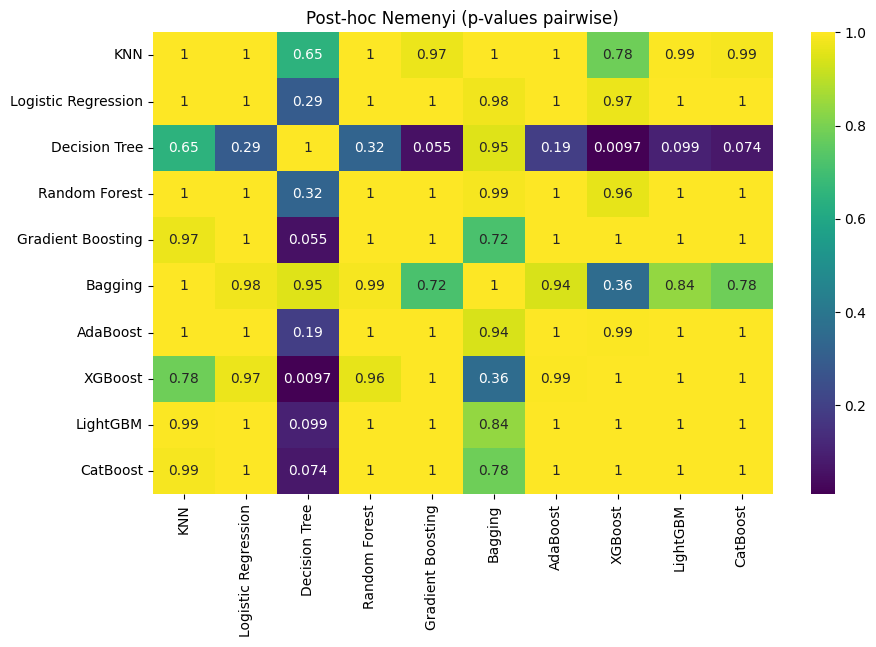

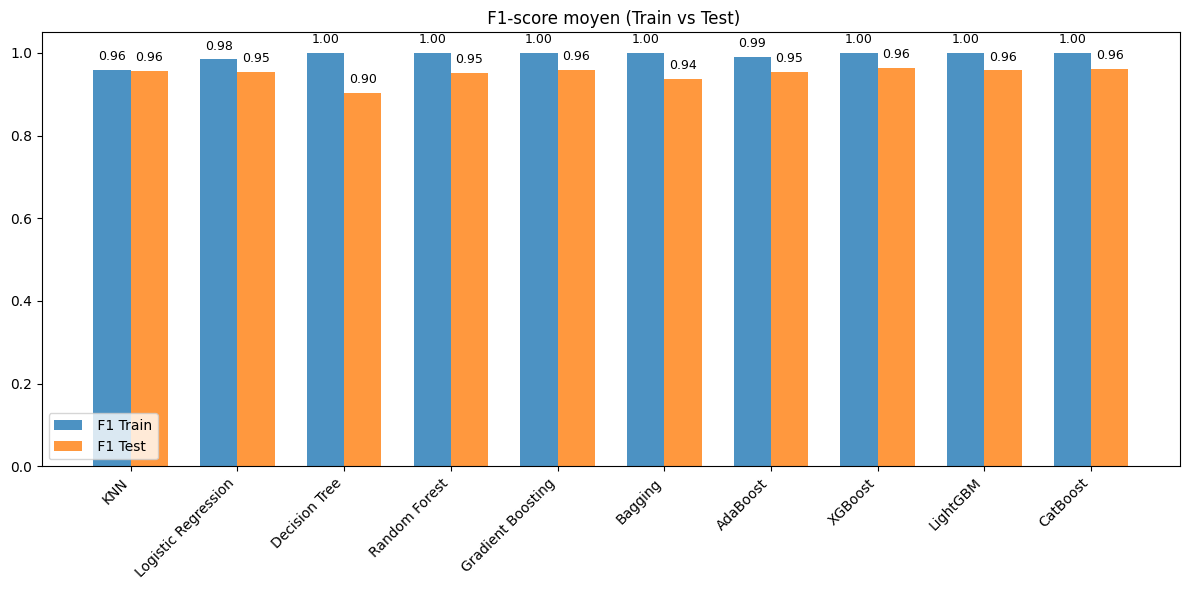

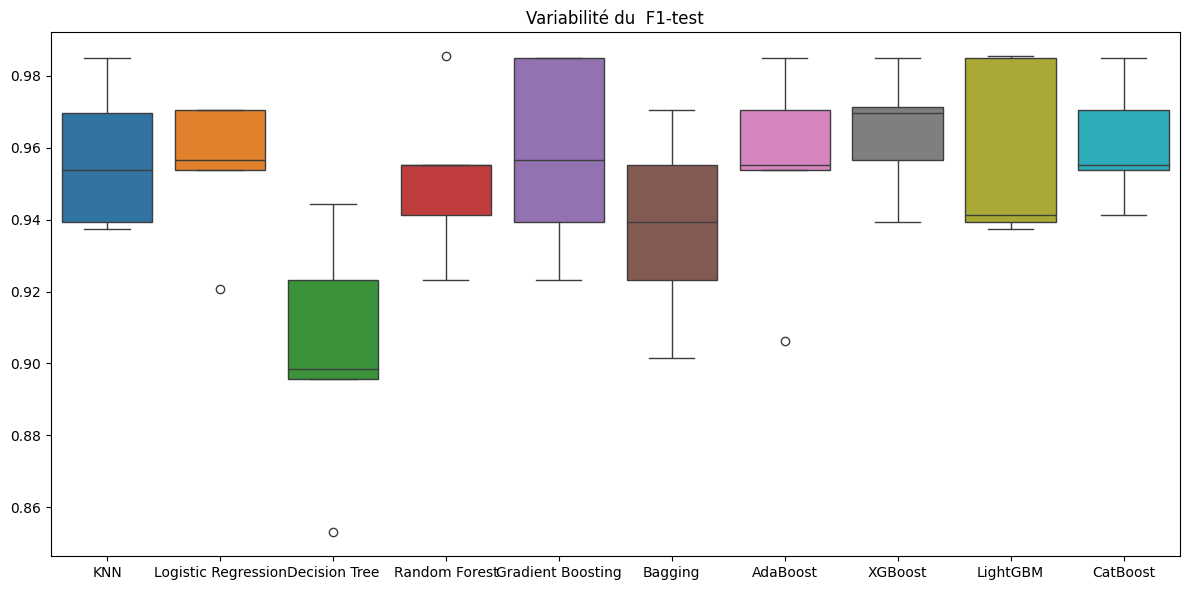

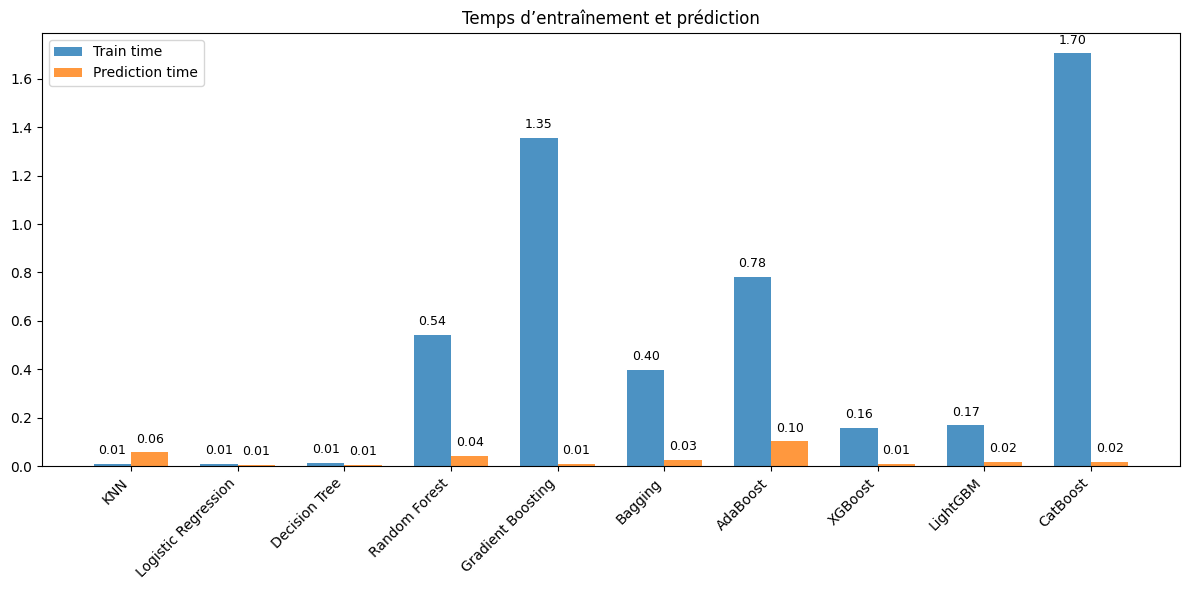

F1_train_mean  F1_test_mean  F1_test_std  Train_time  \
KNN                       0.959684      0.957102     0.018163    0.008532   
Logistic Regression       0.984309      0.954436     0.018270    0.010399   
Decision Tree             1.000000      0.902907     0.030667    0.013186   
Random Forest             1.000000      0.952042     0.020480    0.541697   
Gradient Boosting         1.000000      0.957828     0.024633    1.354054   
Bagging                   1.000000      0.937938     0.024175    0.399385   
AdaBoost                  0.990340      0.954197     0.026541    0.783405   
XGBoost                   1.000000      0.964423     0.015442    0.160001   
LightGBM                  1.000000      0.957730     0.022533    0.168614   
CatBoost                  1.000000      0.961182     0.015158    1.703895   

                     Pred_time  Score_global  
KNN                   0.057172      0.954714  
Logistic Regression   0.005201      0.952557  
Decision Tree         0.005600      0.899784  
Random Forest         0.042100      0.949573  
Gradient Boosting     0.010261      0.955262  
Bagging               0.026799      0.935253  
AdaBoost              0.102603      0.950516  
XGBoost               0.009799      0.962781  
LightGBM              0.016801      0.955309  
CatBoost              0.016199      0.959504

In [12]:
modelisation_classification_binaire_F1_visualisee(X_train, y_train, cv_splits=5)

1. Modèles les plus performants (F1-test)

Les meilleurs scores F1-test sont obtenus par :

XGBoost : 0.9644 :  meilleur équilibre précision / rappel. Selon les test de Friedman, il y a pas de différence significative entre XGBoost et les 3 autres modèles suivants. 

KNN : 0.9571

Gradient Boosting : 0.9578

LightGBM : 0.9577

CatBoost : 0.9612

Les modèles XGBoost et CatBoost se détachent nettement, avec une excellente capacité à identifier correctement la classe positive tout en limitant les erreurs.

2. Variabilité des modèles

Les modèles les plus stables (F1-test std faible) sont :

CatBoost : 0.0152

XGBoost : 0.0154

KNN : 0.0182

Logistic Regression : 0.0183

Un écart type bas indique des performances régulières d’un fold à l’autre, ce qui renforce la fiabilité du modèle.

3. Temps d’entraînement et de prédiction

Les plus rapides :

KNN,

Logistic Regression,

Decision Tree

Les plus lents :

CatBoost,

Gradient Boosting,

XGBoost

Même si XGBoost et CatBoost sont plus lourds, leurs performances élevées peuvent justifier leur temps de calcul dans de nombreux cas.

4. Score global (performance + stabilité + vitesse)

Le score global met en avant :

XGBoost : 0.9628 (meilleur compromis) 

CatBoost : 0.9596

KNN : 0.9548

Gradient Boosting : 0.9553

LightGBM : 0.9553




Ce classement montre qu’XGBoost reste le meilleur compromis global, combinant performance élevée, stabilité et un temps de calcul encore raisonnable au vu de sa complexité. CatBoost arrive juste derrière, tandis que KNN et LightGBM offrent d’excellents résultats avec des temps de calcul plus faibles.

## II. Optimisation des modèles

Pour optimiser la performance de nos modèles, nous allons utilisé plusieurs techniques à savoir:
* Le feature_engineering
* La réduction de dimensionnalité 
* Une gestion plus efficaces des outliers
* L'optimisation des hyperparamètres via RandomizedSearchCV

### 1. feature engineering

Nous allons donc créer une fonction qui prend notre dataframe en entré et qui nous le retourne avec de nouvelles variables ajoutées. 

In [14]:
import pandas as pd
import numpy as np

def add_breast_cancer_features(df):
    """
    Ajoute de nouvelles caractéristiques (feature engineering) adaptées à la nomenclature simplifiée :
    1 = mean, 2 = se, 3 = worst.
    
    Exemple de colonnes attendues : area1, area2, area3, compactness1, concavity1, symmetry1, etc.
    
    Paramètres :
        df (pd.DataFrame) : DataFrame contenant les caractéristiques et la variable cible 'Diagnosis' (0/1)
    
    Retour :
        pd.DataFrame : DataFrame complet avec les nouvelles caractéristiques ajoutées
    """
    data = df.copy()

    # --- Vérification de la présence de la variable cible ---
    if 'Diagnosis' not in data.columns:
        raise ValueError("La colonne 'Diagnosis' doit être présente dans le DataFrame.")

    # Séparation X / y
    X = data.drop(columns=['Diagnosis'])
    y = data['Diagnosis']

    # --- Création de nouvelles caractéristiques ---

    # Rapport surface/compacité (densité cellulaire)
    X['Area_to_Compactness'] = X['area1'] / (X['compactness1'] + 1e-6)

    #  Rapport concavité/symétrie (mesure d'irrégularité de forme)
    X['Concavity_Symmetry_Ratio'] = X['concavity1'] / (X['symmetry1'] + 1e-6)

    #Indice global de complexité de forme (surface + périmètre + rayon moyens)
    X['Shape_Complexity'] = (X['area1'] + X['perimeter1'] + X['radius1']) / 3

    # Indice de texture moyen entre état normal et extrême
    X['Texture_Index'] = (X['texture1'] + X['texture3']) / 2

    # Différence entre la plus grande et la moyenne des surfaces (variation intra-échantillon)
    X['Area_Diff'] = X['area3'] - X['area1']

    # Évolution de la compacité entre état normal et extrême
    X['Compactness_Progression'] = X['compactness3'] - X['compactness1']

    #  Transformation logarithmique pour stabiliser les variables très étalées
    X['log_area1'] = np.log1p(X['area1'])
    X['log_area3'] = np.log1p(X['area3'])

    # --- Réintégration de la cible ---
    X['Diagnosis'] = y

    # --- Résumé ---
    new_features = [
        'Area_to_Compactness',
        'Concavity_Symmetry_Ratio',
        'Shape_Complexity',
        'Texture_Index',
        'Area_Diff',
        'Compactness_Progression',
        'log_area1',
        'log_area3'
    ]

    print(f"Nouvelles caractéristiques ajoutées : {', '.join(new_features)}")
    print(f"Le DataFrame final contient {X.shape[1]} colonnes.")

    return X


In [15]:
df_feature_eng=add_breast_cancer_features(train)

Nouvelles caractéristiques ajoutées : Area_to_Compactness, Concavity_Symmetry_Ratio, Shape_Complexity, Texture_Index, Area_Diff, Compactness_Progression, log_area1, log_area3
Le DataFrame final contient 39 colonnes.


In [27]:
df_feature_eng.head()

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
10     16.02     23.24      102.70   797.8      0.08206       0.06669   
170    12.32     12.39       78.85   464.1      0.10280       0.06981   
407    12.85     21.37       82.63   514.5      0.07551       0.08316   
430    14.90     22.53      102.10   685.0      0.09947       0.22250   
27     18.61     20.25      122.10  1094.0      0.09440       0.10660   

     concavity1  concave_points1  symmetry1  fractal_dimension1  radius2  \
10      0.03299          0.03323     0.1528             0.05697   0.3795   
170     0.03987          0.03700     0.1959             0.05955   0.2360   
407     0.06126          0.01867     0.1580             0.06114   0.4993   
430     0.27330          0.09711     0.2041             0.06898   0.2530   
27      0.14900          0.07731     0.1697             0.05699   0.8529   

     texture2  perimeter2  area2  smoothness2  compactness2  concavity2  \
10     1.1870       2.466  40.51     0.004029      0.009269     0.01101   
170    0.6656       1.670  17.43     0.008045      0.011800     0.01683   
407    1.7980       2.552  41.24     0.006011      0.044800     0.05175   
430    0.8749       3.466  24.19     0.006965      0.062130     0.07926   
27     1.8490       5.632  93.54     0.010750      0.027220     0.05081   

     concave_points2  symmetry2  fractal_dimension2  radius3  texture3  \
10          0.007591    0.01460            0.003042    19.19     33.88   
170         0.012410    0.01924            0.002248    13.50     15.64   
407         0.013410    0.02669            0.007731    14.40     27.01   
430         0.022340    0.01499            0.005784    16.35     27.57   
27          0.019110    0.02293            0.004217    21.31     27.26   

     perimeter3   area3  smoothness3  compactness3  concavity3  \
10       123.80  1150.0      0.11810        0.1551      0.1459   
170       86.97   549.1      0.13850        0.1266      0.1242   
407       91.63   645.8      0.09402        0.1936      0.1838   
430      125.40   832.7      0.14190        0.7090      0.9019   
27       139.90  1403.0      0.13380        0.2117      0.3446   

     concave_points3  symmetry3  fractal_dimension3  Area_to_Compactness  \
10           0.09975     0.2948             0.08452         11962.633639   
170          0.09391     0.2827             0.06771          6647.949464   
407          0.05601     0.2488             0.08151          6186.794291   
430          0.24750     0.2866             0.11550          3078.637849   
27           0.14900     0.2341             0.07421         10262.567893   

     Concavity_Symmetry_Ratio  Shape_Complexity  Texture_Index  Area_Diff  \
10                   0.215902        305.506667         28.560      352.2   
170                  0.203521        185.090000         14.015       85.0   
407                  0.387719        203.326667         24.190      131.3   
430                  1.339043        267.333333         25.050      147.7   
27                   0.878015        411.570000         23.755      309.0   

     Compactness_Progression  log_area1  log_area3  Diagnosis  
10                   0.08841   6.683111   7.048386          1  
170                  0.05679   6.142252   6.310100          0  
407                  0.11044   6.245137   6.472037          0  
430                  0.48650   6.530878   6.725874          1  
27                   0.10510   6.998510   7.247081          1


  Début de la validation croisée (CV=5)  

--- Modèle : KNN ---
 F1-train = 0.961 |  F1-test = 0.963
Temps entraînement = 0.0086s | Temps prédiction = 0.0887s

--- Modèle : Logistic Regression ---
 F1-train = 0.987 |  F1-test = 0.961
Temps entraînement = 0.0150s | Temps prédiction = 0.0069s

--- Modèle : Decision Tree ---
 F1-train = 1.000 |  F1-test = 0.919
Temps entraînement = 0.0241s | Temps prédiction = 0.0098s

--- Modèle : Random Forest ---
 F1-train = 1.000 |  F1-test = 0.952
Temps entraînement = 0.5666s | Temps prédiction = 0.0406s

--- Modèle : Gradient Boosting ---
 F1-train = 1.000 |  F1-test = 0.976
Temps entraînement = 1.5660s | Temps prédiction = 0.0090s

--- Modèle : Bagging ---
 F1-train = 1.000 |  F1-test = 0.961
Temps entraînement = 0.4511s | Temps prédiction = 0.0307s

--- Modèle : AdaBoost ---
 F1-train = 0.992 |  F1-test = 0.960
Temps entraînement = 0.8951s | Temps prédiction = 0.1063s

--- Modèle : XGBoost ---


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:43:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:43:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:43:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:19

 F1-train = 1.000 |  F1-test = 0.967
Temps entraînement = 1.2550s | Temps prédiction = 0.0156s

--- Modèle : LightGBM ---
[LightGBM] [Info] Number of positive: 136, number of negative: 228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4618
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 136, number of negative: 228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4623
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 F1-train = 1.000 |  F1-test = 0.963
Temps entraînement = 2.1226s | Temps prédiction = 0.0184s


  Fin de la validation croisée  

  Meilleur modèle identifié  
F1_train_mean    1.000000
F1_test_mean     0.976029
F1_test_std      0.011987
Train_time       1.566000
Pred_time        0.009001
Score_global     0.974740
Name: Gradient Boosting, dtype: float64



===== Test de Friedman =====
Statistique χ² = 16.3443
p-value        = 0.0600
→ Aucune preuve statistique que les modèles diffèrent (p ≥ 0.05).


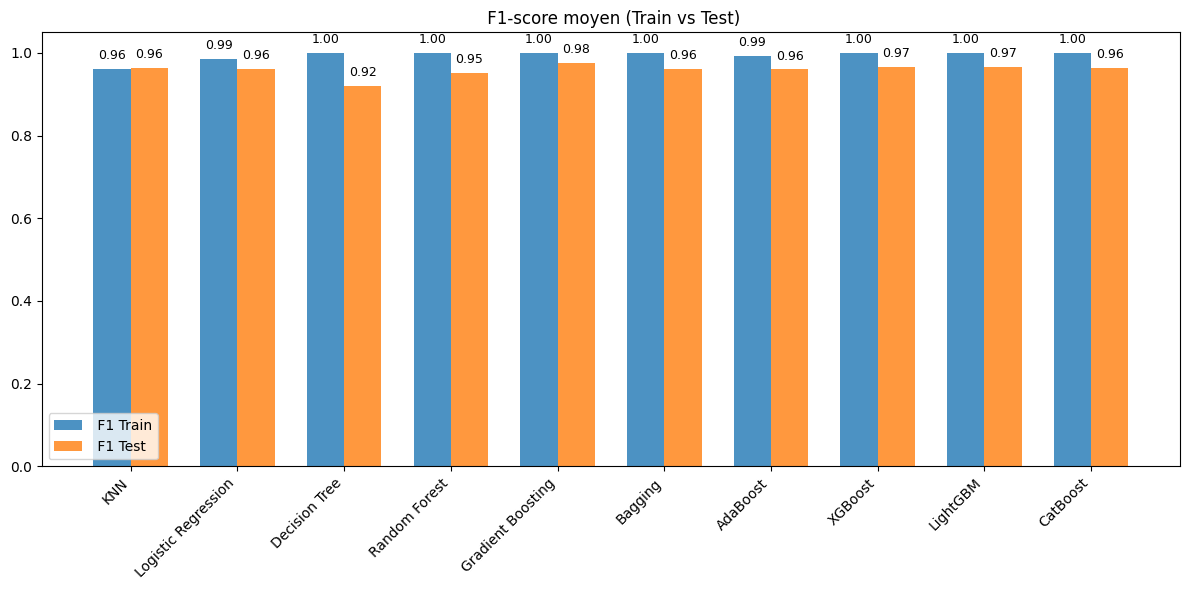

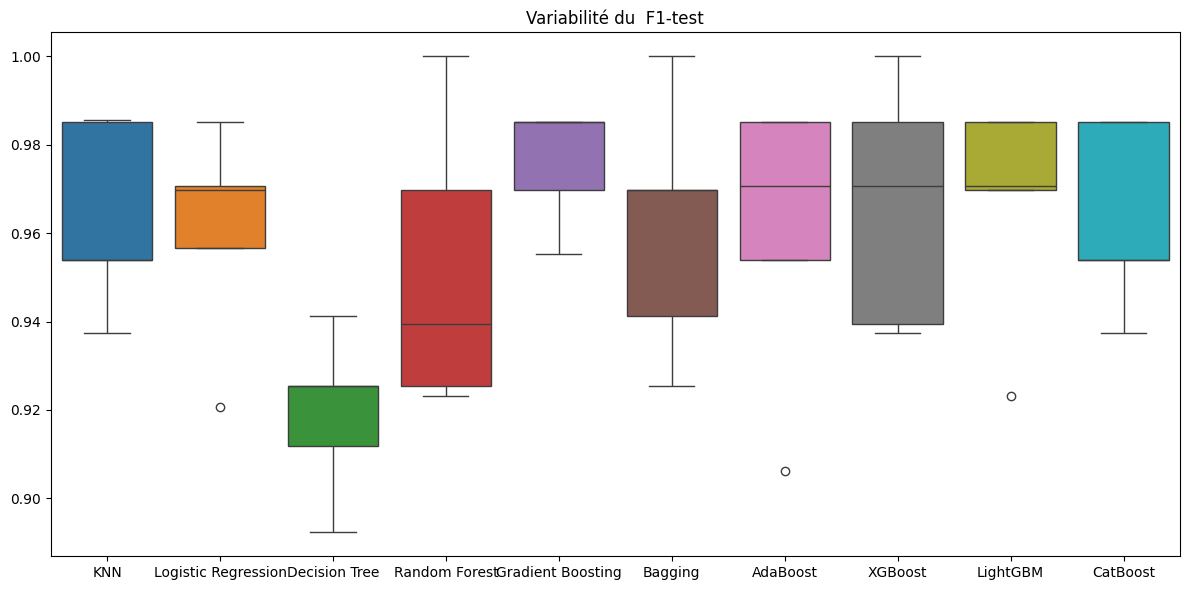

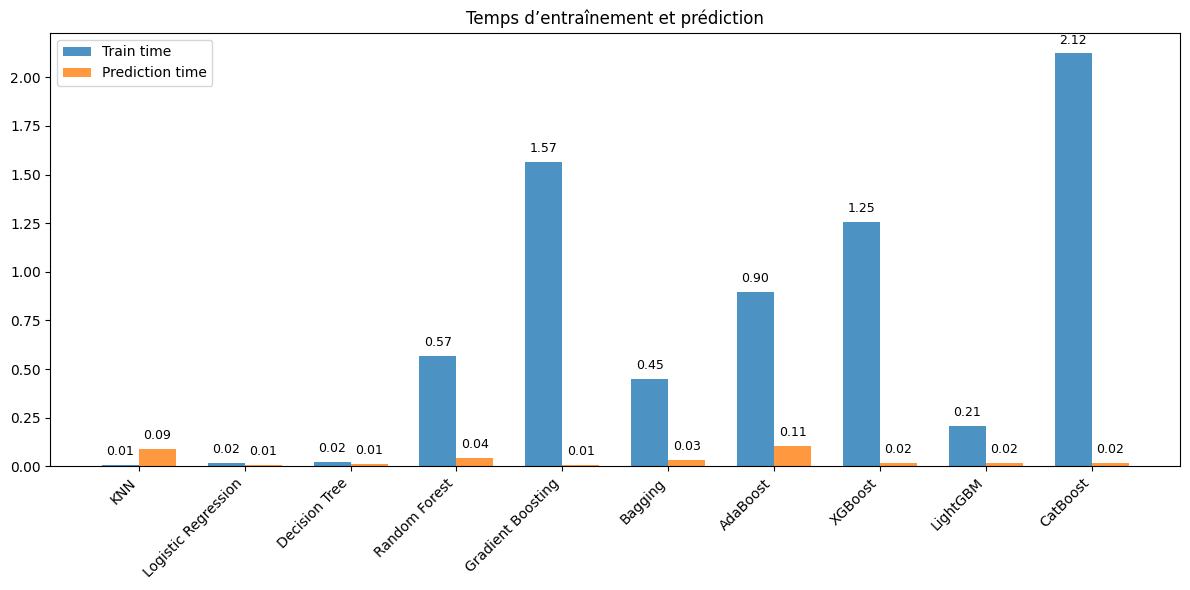

F1_train_mean  F1_test_mean  F1_test_std  Train_time  \
KNN                       0.961181      0.963155     0.019035    0.008588   
Logistic Regression       0.986578      0.960503     0.021888    0.015021   
Decision Tree             1.000000      0.919199     0.016356    0.024085   
Random Forest             1.000000      0.951508     0.029395    0.566604   
Gradient Boosting         1.000000      0.976029     0.011987    1.566000   
Bagging                   1.000000      0.961189     0.025824    0.451078   
AdaBoost                  0.991844      0.960167     0.029313    0.895078   
XGBoost                   1.000000      0.966511     0.024737    1.254980   
LightGBM                  1.000000      0.966702     0.022814    0.206873   
CatBoost                  1.000000      0.963068     0.018934    2.122649   

                     Pred_time  Score_global  
KNN                   0.088713      0.960364  
Logistic Regression   0.006950      0.958245  
Decision Tree         0.009800      0.917465  
Random Forest         0.040628      0.948162  
Gradient Boosting     0.009001      0.974740  
Bagging               0.030711      0.958299  
AdaBoost              0.106288      0.956173  
XGBoost               0.015621      0.963881  
LightGBM              0.017239      0.964249  
CatBoost              0.018401      0.960991

In [17]:
X_eng = df_feature_eng.drop(columns=['Diagnosis'])
y_eng = df_feature_eng['Diagnosis']
modelisation_classification_binaire_F1_visualisee(X_eng, y_eng, cv_splits=5,test_friedman=True)

L’ajout des nouvelles caractéristiques issues de la fonction add_breast_cancer_features a permis d’augmenter la qualité descriptive du dataset en introduisant des indicateurs de forme, de complexité et d’évolution des anomalies cellulaires. Ces variables supplémentaires semblent avoir amélioré la capacité des modèles à distinguer correctement les tumeurs malignes, ce qui se reflète directement dans les valeurs du F1-score, métrique centrée sur le rappel.

Les performances observées montrent :

Gradient Boosting devient le modèle le plus performant avec un F1_test ≈ 0.976.
Sa forte capacité à exploiter les interactions complexes entre les nouvelles variables lui permet d’atteindre une excellente précision, renforçant sa position en tête malgré un temps d’entraînement élevé.

LightGBM et XGBoost restent très performants (F1_test ≈ 0.967).
Ils profitent particulièrement des nouvelles interactions implicites entre les variables. Leur combinaison de puissance prédictive, de stabilité et de rapidité relative confirme leur très bonne capacité de généralisation.

KNN, CatBoost et Bagging conservent d’excellents résultats, avec des F1_test compris entre 0.96 et 0.963.
Ils bénéficient nettement des nouvelles features, notamment KNN qui progresse et devient plus compétitif, même s'il demeure légèrement derrière les modèles de boosting.

Logistic Regression reste très solide avec un F1_test ≈ 0.960.
Sa stabilité et sa rapidité montrent que les nouvelles features améliorent la séparabilité linéaire du problème, ce qui renforce son efficacité globale.

Random Forest, AdaBoost et plus encore Decision Tree obtiennent des performances correctes mais inférieures aux modèles précédents.
Bien qu’ils profitent eux aussi des nouvelles variables, ils captent moins bien la structure complexe introduite, ce qui explique des F1_test plus faibles, notamment pour Decision Tree qui reste le moins compétitif.

### 2. Gestion plus strict des données abérantes

Nous avons essayer de revoir un un peu la gestion des valeurs abérantes en utilisant la méthode IQR (Interquartile Range)

Pour ça nous avons écris une fonction que nous allons utilisé dans la fonction de prétraitrement et entrainement 

In [29]:
import pandas as pd
import numpy as np

def remove_outliers_zscore(df, columns, threshold=3):
    """
    Supprime les valeurs extrêmes (outliers) en utilisant la méthode du Z-score.
    
    Paramètres :
        df (pd.DataFrame) : DataFrame d'entrée
        columns (list) : liste des colonnes à traiter
        threshold (float) : valeur limite du Z-score (par défaut 3)
        
    Retour :
        pd.DataFrame : DataFrame nettoyé des outliers
    """
    df_clean = df.copy()

    for col in columns:
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        
        # Calcul du Z-score
        z_scores = (df_clean[col] - mean) / std
        
        # Filtrage des valeurs
        df_clean = df_clean[abs(z_scores) <= threshold]
    
    print(f"Nettoyage terminé : {len(df) - len(df_clean)} valeurs extrêmes supprimées au total.")
    return df_clean


In [30]:
cols = ['area1', 'area2', 'area3']

df_clean = remove_outliers_zscore(train, cols, threshold=3)

Nettoyage terminé : 22 valeurs extrêmes supprimées au total.



===== Début de la validation croisée (CV=5) =====

--- Modèle : KNN ---
 F1-train = 0.948 |  F1-test = 0.935
Temps entraînement = 0.0086s | Temps prédiction = 0.0612s

--- Modèle : Logistic Regression ---
 F1-train = 0.983 |  F1-test = 0.955
Temps entraînement = 0.0150s | Temps prédiction = 0.0073s

--- Modèle : Decision Tree ---
 F1-train = 1.000 |  F1-test = 0.893
Temps entraînement = 0.0149s | Temps prédiction = 0.0037s

--- Modèle : Random Forest ---
 F1-train = 1.000 |  F1-test = 0.921
Temps entraînement = 0.4809s | Temps prédiction = 0.0388s

--- Modèle : Gradient Boosting ---
 F1-train = 1.000 |  F1-test = 0.937
Temps entraînement = 1.1526s | Temps prédiction = 0.0098s

--- Modèle : Bagging ---
 F1-train = 0.999 |  F1-test = 0.928
Temps entraînement = 0.3553s | Temps prédiction = 0.0258s

--- Modèle : AdaBoost ---
 F1-train = 0.987 |  F1-test = 0.941
Temps entraînement = 0.7099s | Temps prédiction = 0.0968s

--- Modèle : XGBoost ---


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:31:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:31:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:31:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:19

 F1-train = 1.000 |  F1-test = 0.924
Temps entraînement = 0.1525s | Temps prédiction = 0.0085s

--- Modèle : LightGBM ---
[LightGBM] [Info] Number of positive: 118, number of negative: 228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3470
[LightGBM] [Info] Number of data points in the train set: 346, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.341040 -> initscore=-0.658661
[LightGBM] [Info] Start training from score -0.658661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 F1-train = 1.000 |  F1-test = 0.944
Temps entraînement = 0.1429s | Temps prédiction = 0.0186s

--- Modèle : CatBoost ---
 F1-train = 1.000 |  F1-test = 0.939
Temps entraînement = 1.3716s | Temps prédiction = 0.0093s


===== Fin de la validation croisée =====

===== Meilleur modèle identifié =====
F1_train_mean    0.982803
F1_test_mean     0.955342
F1_test_std      0.020730
Train_time       0.015016
Pred_time        0.007278
Score_global     0.953196
Name: Logistic Regression, dtype: float64




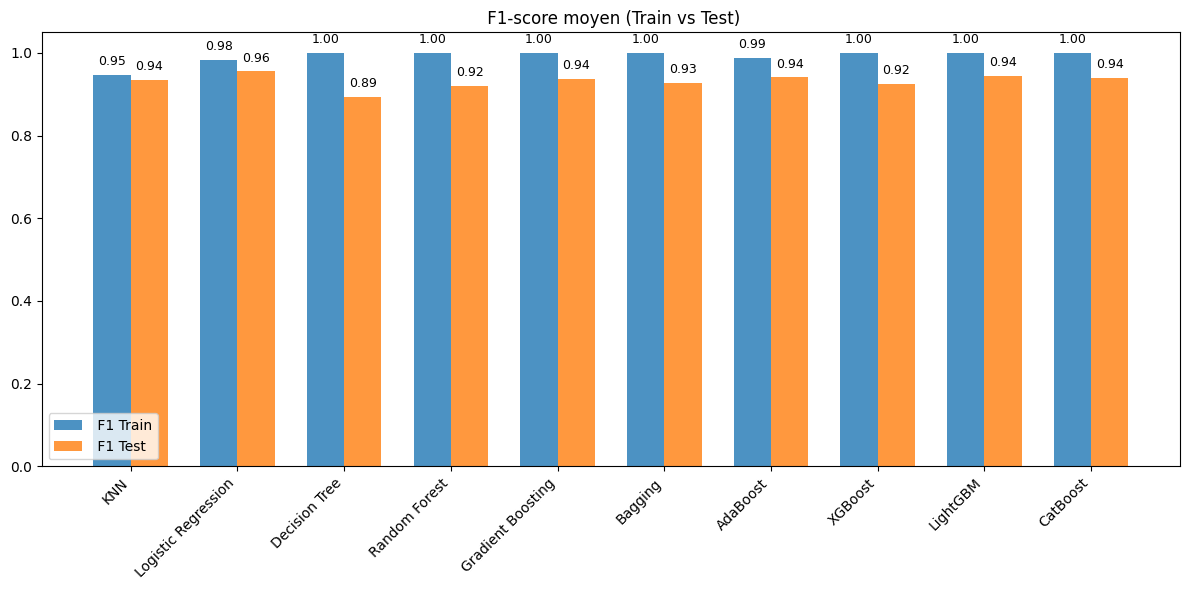

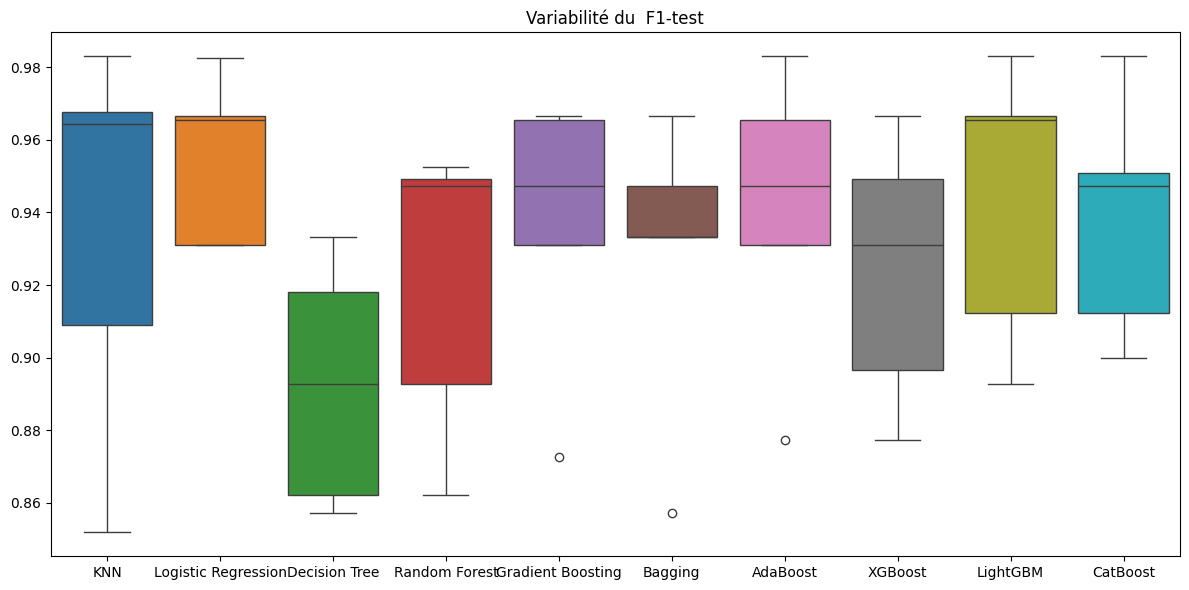

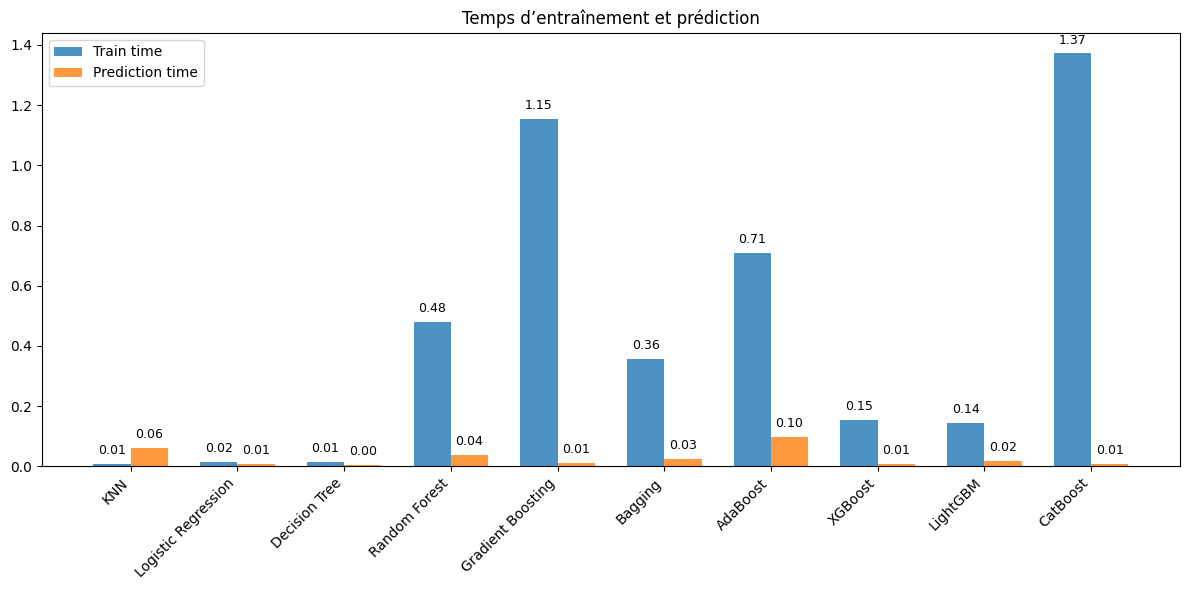

F1_train_mean  F1_test_mean  F1_test_std  Train_time  \
KNN                       0.947548      0.935204     0.048628    0.008598   
Logistic Regression       0.982803      0.955342     0.020730    0.015016   
Decision Tree             1.000000      0.892687     0.029985    0.014936   
Random Forest             1.000000      0.920766     0.036708    0.480923   
Gradient Boosting         1.000000      0.936663     0.034545    1.152646   
Bagging                   0.999156      0.927569     0.037274    0.355289   
AdaBoost                  0.987124      0.940833     0.036278    0.709929   
XGBoost                   1.000000      0.924120     0.033005    0.152451   
LightGBM                  1.000000      0.944075     0.034995    0.142897   
CatBoost                  1.000000      0.938704     0.029613    1.371570   

                     Pred_time  Score_global  
KNN                   0.061164      0.929730  
Logistic Regression   0.007278      0.953196  
Decision Tree         0.003655      0.889652  
Random Forest         0.038824      0.916707  
Gradient Boosting     0.009812      0.933110  
Bagging               0.025782      0.923584  
AdaBoost              0.096841      0.936237  
XGBoost               0.008477      0.920734  
LightGBM              0.018572      0.940389  
CatBoost              0.009283      0.935650

In [31]:
X_eng = df_clean.drop(columns=['Diagnosis'])
y_eng = df_clean['Diagnosis']
modelisation_classification_binaire_F1_visualisee(X_eng, y_eng, cv_splits=5)

La suppression des valeurs extrêmes grâce à la fonction remove_outliers_zscore a contribué à rendre le dataset plus homogène en éliminant les observations atypiques susceptibles de perturber les frontières de décision. En réduisant le bruit statistique, les modèles deviennent plus cohérents dans leur apprentissage, ce qui se reflète dans une meilleure stabilité des F1-scores, particulièrement pertinente pour la détection des tumeurs malignes.

Les performances observées montrent :

Logistic Regression devient le modèle le plus performant avec un F1_test ≈ 0.955, combinant bonne stabilité et excellente rapidité, ce qui confirme son efficacité sur un dataset nettoyé.

AdaBoost, LightGBM et CatBoost obtiennent également de bons résultats (F1_test ≈ 0.94), avec une stabilité correcte, même si CatBoost reste pénalisé par un temps d’entraînement élevé.

KNN, Gradient Boosting et Bagging atteignent des scores intermédiaires (F1_test ≈ 0.93–0.94) mais souffrent d’une variabilité plus marquée, en particulier KNN.

XGBoost et Random Forest sont un peu moins performants (F1_test ≈ 0.92), avec une variance non négligeable et des temps de calcul parfois conséquents.

Decision Tree reste clairement le moins performant, affichant un F1_test ≈ 0.89 et une stabilité limitée, ce qui reflète sa difficulté à modéliser les relations plus fines du dataset nettoyé.

### 3. Réduction de dimensionnalité

Nous allons faire la réduction des variables de plusieurs manière

ensuite evaluer la performance de nos modèles. 

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def advanced_feature_preprocessing_breast_cancer(
    df,
    n_features=10,
    n_components=5,
    methods=['RFE', 'ANOVA', 'MUTUAL', 'PCA']
):
    """
    Pipeline avancé de prétraitement et de sélection de variables pour la détection
    de cellules cancéreuses (Breast Cancer Wisconsin Diagnostic).
    
    Paramètres
    ----------
    df : pd.DataFrame
        Données complètes incluant la cible 'Diagnosis' (0 = bénin, 1 = malin)
    n_features : int
        Nombre de variables à sélectionner avec RFE, ANOVA, MUTUAL
    n_components : int
        Nombre de composantes principales pour PCA
    methods : list
        Méthodes à appliquer parmi ['RFE', 'ANOVA', 'MUTUAL', 'PCA']
    
    Retour
    ------
    X_processed : pd.DataFrame
        Données transformées et sélectionnées
    y : pd.Series
        Cible (Diagnosis)
    results : dict
        Performances moyennes des modèles (accuracy)
    info : dict
        Détails sur les sélections effectuées
    """

    # === Séparation X / y 
    if 'Diagnosis' not in df.columns:
        raise ValueError("La colonne 'Diagnosis' (0/1) doit être présente dans le DataFrame.")
    
    X = df.drop(columns=['Diagnosis'])
    y = df['Diagnosis']

    X_new = X.copy()
    info = {}

    #  Application séquentielle des méthodes 
    current_X = X_new.copy()

    for method in methods:
        print(f"\n Application de la méthode : {method.upper()}")

        if method.upper() == 'RFE':
            model = LogisticRegression(max_iter=5000)
            rfe = RFE(model, n_features_to_select=min(n_features, current_X.shape[1]))
            rfe.fit(current_X, y)
            selected_cols = current_X.columns[rfe.support_]
            current_X = current_X[selected_cols]
            info['RFE'] = list(selected_cols)

        elif method.upper() == 'ANOVA':
            selector = SelectKBest(score_func=f_classif, k=min(n_features, current_X.shape[1]))
            selector.fit(current_X, y)
            selected_cols = current_X.columns[selector.get_support()]
            current_X = current_X[selected_cols]
            info['ANOVA'] = list(selected_cols)

        elif method.upper() == 'MUTUAL':
            selector = SelectKBest(score_func=mutual_info_classif, k=min(n_features, current_X.shape[1]))
            selector.fit(current_X, y)
            selected_cols = current_X.columns[selector.get_support()]
            current_X = current_X[selected_cols]
            info['MUTUAL'] = list(selected_cols)

        elif method.upper() == 'PCA':
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(current_X)
            pca = PCA(n_components=min(n_components, X_scaled.shape[1]))
            X_pca = pca.fit_transform(X_scaled)
            explained = np.sum(pca.explained_variance_ratio_)
            current_X = pd.DataFrame(X_pca, columns=[f'PCA_{i+1}' for i in range(pca.n_components_)])
            info['PCA_Explained'] = round(explained * 100, 2)
            info['PCA_Components'] = current_X.columns.tolist()
            print(f" PCA : {explained:.2%} de variance expliquée")

        else:
            print(f"Méthode '{method}' non reconnue. Ignorée.")
        
        print(f"→ Après {method.upper()} : {current_X.shape[1]} variables conservées.\n")

    #  Prétraitement des variables numériques 
    numeric_features = current_X.columns.tolist()
    preprocessor = ColumnTransformer(
        transformers=[('num', StandardScaler(), numeric_features)],
        remainder='passthrough'
    )

    #  Modèles de classification  


    #   Retour des données transformées  
    X_processed = current_X.copy()

    return X_processed, y



 Application de la méthode : RFE
→ Après RFE : 10 variables conservées.


  Début de la validation croisée (CV=5)  

--- Modèle : KNN ---
 F1-train = 0.934 |  F1-test = 0.929
Temps entraînement = 0.0078s | Temps prédiction = 0.0500s

--- Modèle : Logistic Regression ---
 F1-train = 0.950 |  F1-test = 0.942
Temps entraînement = 0.0113s | Temps prédiction = 0.0073s

--- Modèle : Decision Tree ---
 F1-train = 1.000 |  F1-test = 0.893
Temps entraînement = 0.0108s | Temps prédiction = 0.0068s

--- Modèle : Random Forest ---
 F1-train = 1.000 |  F1-test = 0.937
Temps entraînement = 0.5271s | Temps prédiction = 0.0517s

--- Modèle : Gradient Boosting ---
 F1-train = 1.000 |  F1-test = 0.925
Temps entraînement = 0.5690s | Temps prédiction = 0.0082s

--- Modèle : Bagging ---
 F1-train = 0.999 |  F1-test = 0.923
Temps entraînement = 0.1856s | Temps prédiction = 0.0262s

--- Modèle : AdaBoost ---
 F1-train = 0.960 |  F1-test = 0.925
Temps entraînement = 0.5213s | Temps prédiction = 0.1134s

--- 

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:46:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:46:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:46:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:19

 F1-train = 1.000 |  F1-test = 0.938
Temps entraînement = 0.1264s | Temps prédiction = 0.0096s

--- Modèle : LightGBM ---
[LightGBM] [Info] Number of positive: 136, number of negative: 228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 136, number of negative: 228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from sco

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 F1-train = 1.000 |  F1-test = 0.934
Temps entraînement = 0.9025s | Temps prédiction = 0.0100s


  Fin de la validation croisée  

  Meilleur modèle identifié  
F1_train_mean    0.949576
F1_test_mean     0.942159
F1_test_std      0.024877
Train_time       0.011291
Pred_time        0.007297
Score_global     0.939598
Name: Logistic Regression, dtype: float64



===== Test de Friedman =====
Statistique χ² = 8.9430
p-value        = 0.4425
→ Aucune preuve statistique que les modèles diffèrent (p ≥ 0.05).


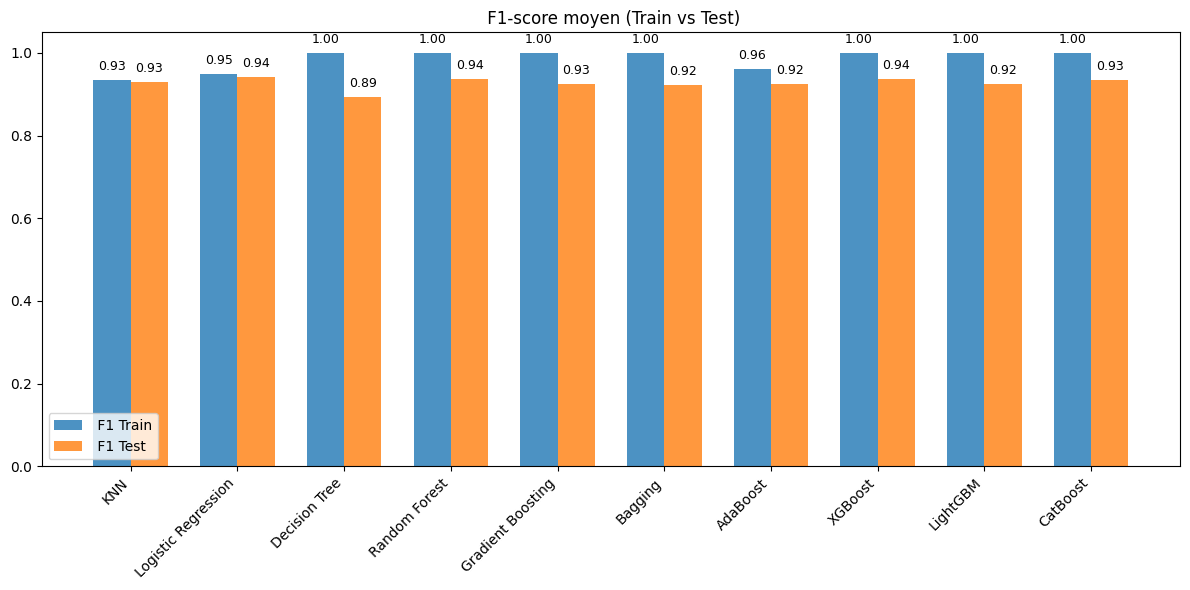

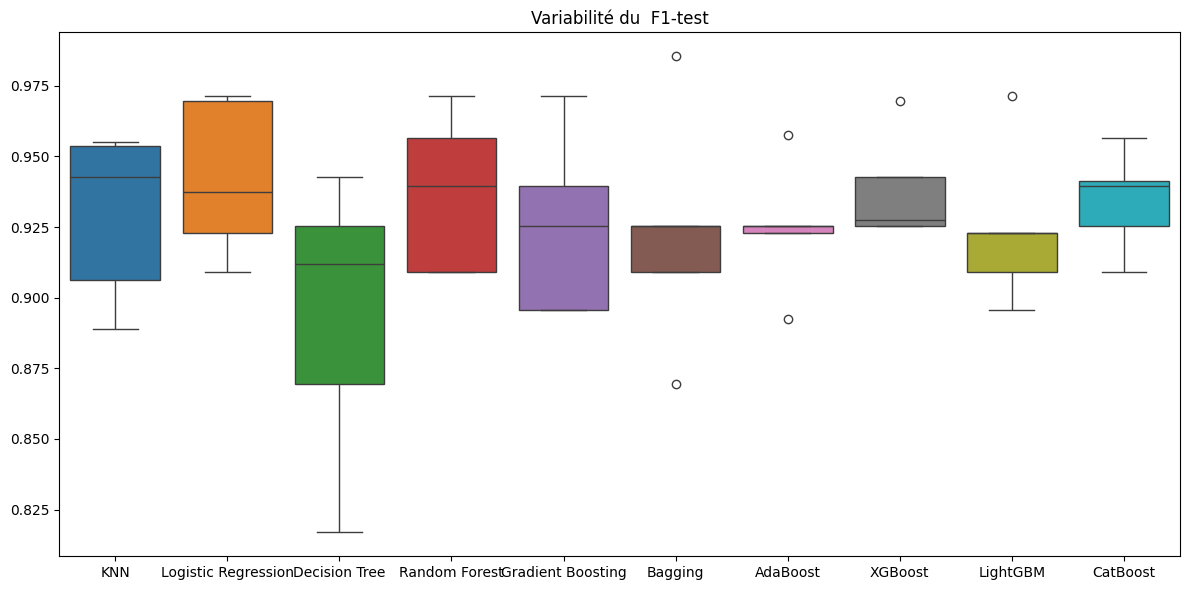

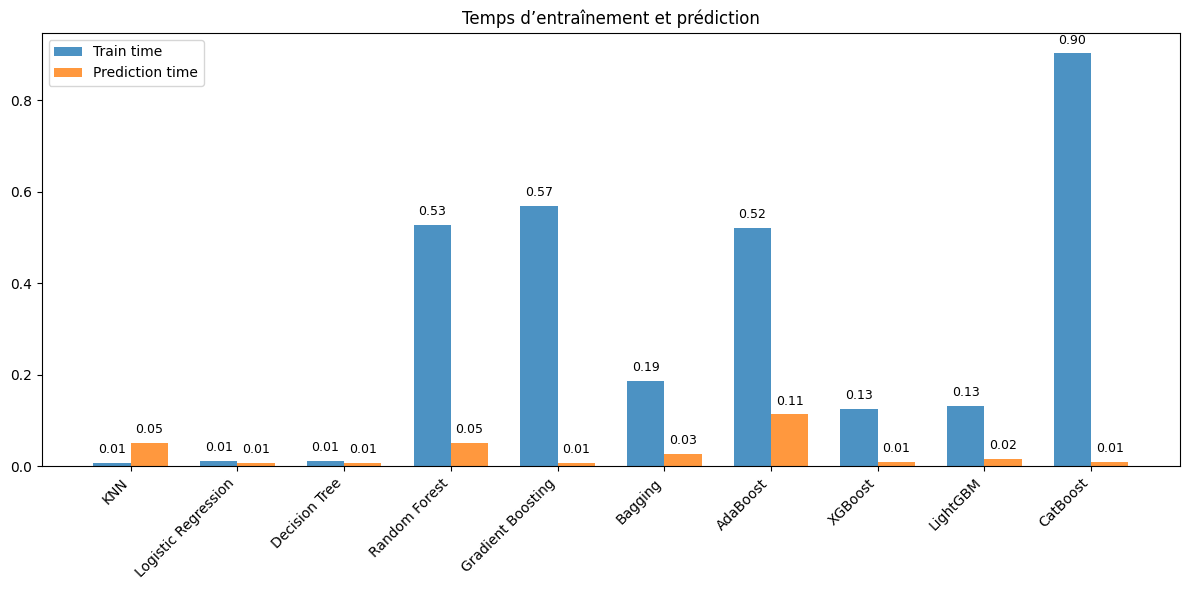

F1_train_mean  F1_test_mean  F1_test_std  Train_time  \
KNN                       0.933891      0.929413     0.026917    0.007835   
Logistic Regression       0.949576      0.942159     0.024877    0.011291   
Decision Tree             1.000000      0.893292     0.045223    0.010799   
Random Forest             1.000000      0.937105     0.025020    0.527115   
Gradient Boosting         1.000000      0.925448     0.028635    0.569015   
Bagging                   0.999262      0.922982     0.037329    0.185600   
AdaBoost                  0.960311      0.924775     0.020712    0.521252   
XGBoost                   1.000000      0.938167     0.017068    0.126400   
LightGBM                  1.000000      0.924439     0.025626    0.131744   
CatBoost                  1.000000      0.934311     0.016014    0.902480   

                     Pred_time  Score_global  
KNN                   0.050034      0.926221  
Logistic Regression   0.007297      0.939598  
Decision Tree         0.006796      0.888702  
Random Forest         0.051658      0.934087  
Gradient Boosting     0.008199      0.922503  
Bagging               0.026211      0.918987  
AdaBoost              0.113364      0.921571  
XGBoost               0.009599      0.936365  
LightGBM              0.016601      0.921711  
CatBoost              0.009997      0.932610

In [19]:
X_proc, y = advanced_feature_preprocessing_breast_cancer(
    train,
    n_features=10,
    n_components=5,
    methods=['RFE']
)
modelisation_classification_binaire_F1_visualisee(X_proc, y, cv_splits=5)

L’utilisation de RFE a simplifié le dataset en ne conservant que les variables les plus pertinentes, ce qui améliore la stabilité des modèles. Les résultats montrent :

La régression logistique devient la meilleure méthode (F1_test ≈ 0.94) grâce à un dataset plus linéaire et plus propre.
Random Forest et XGBoost restent performants (≈ 0.93–0.94) et relativement stables.
AdaBoost, LightGBM, Gradient Boosting et Bagging obtiennent des scores corrects (≈ 0.92–0.93) mais sont légèrement pénalisés par la perte d’interactions.
KNN et l’arbre de décision restent les moins efficaces, avec des performances plus faibles et une variabilité plus élevée.

En résumé, RFE favorise surtout les modèles linéaires et réduit l’impact des modèles complexes.

PCA


 Application de la méthode : PCA
 PCA : 84.94% de variance expliquée
→ Après PCA : 5 variables conservées.


  Début de la validation croisée (CV=5)  

--- Modèle : KNN ---
 F1-train = 0.952 |  F1-test = 0.925
Temps entraînement = 0.0090s | Temps prédiction = 0.0523s

--- Modèle : Logistic Regression ---
 F1-train = 0.967 |  F1-test = 0.961
Temps entraînement = 0.0086s | Temps prédiction = 0.0056s

--- Modèle : Decision Tree ---
 F1-train = 1.000 |  F1-test = 0.890
Temps entraînement = 0.0130s | Temps prédiction = 0.0083s

--- Modèle : Random Forest ---
 F1-train = 1.000 |  F1-test = 0.943
Temps entraînement = 0.4138s | Temps prédiction = 0.0477s

--- Modèle : Gradient Boosting ---
 F1-train = 1.000 |  F1-test = 0.930
Temps entraînement = 0.4276s | Temps prédiction = 0.0078s

--- Modèle : Bagging ---
 F1-train = 1.000 |  F1-test = 0.924
Temps entraînement = 0.1517s | Temps prédiction = 0.0250s

--- Modèle : AdaBoost ---
 F1-train = 0.969 |  F1-test = 0.923
Temps entraînement = 0.4596s

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:46:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:46:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:46:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:19

 F1-train = 1.000 |  F1-test = 0.961
Temps entraînement = 0.1056s | Temps prédiction = 0.0100s

--- Modèle : LightGBM ---
[LightGBM] [Info] Number of positive: 136, number of negative: 228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 136, number of negative: 228
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 F1-train = 1.000 |  F1-test = 0.949
Temps entraînement = 0.8352s | Temps prédiction = 0.0112s


  Fin de la validation croisée  

  Meilleur modèle identifié  
F1_train_mean    1.000000
F1_test_mean     0.960991
F1_test_std      0.012604
Train_time       0.105600
Pred_time        0.010001
Score_global     0.959630
Name: XGBoost, dtype: float64



===== Test de Friedman =====
Statistique χ² = 27.0677
p-value        = 0.0014
→ Les différences entre les modèles sont STATISTIQUEMENT SIGNIFICATIVES (p < 0.05).

Les performances diffèrent → Test post-hoc de Nemenyi en cours...

===== Test post-hoc de Nemenyi =====
                          KNN  Logistic Regression  Decision Tree  \
KNN                  1.000000             0.425242       0.992761   
Logistic Regression  0.425242             1.000000       0.039833   
Decision Tree        0.992761             0.039833       1.000000   
Random Forest        0.839286             0.999807       0.212132   
Gradient Boosting    0.999807         

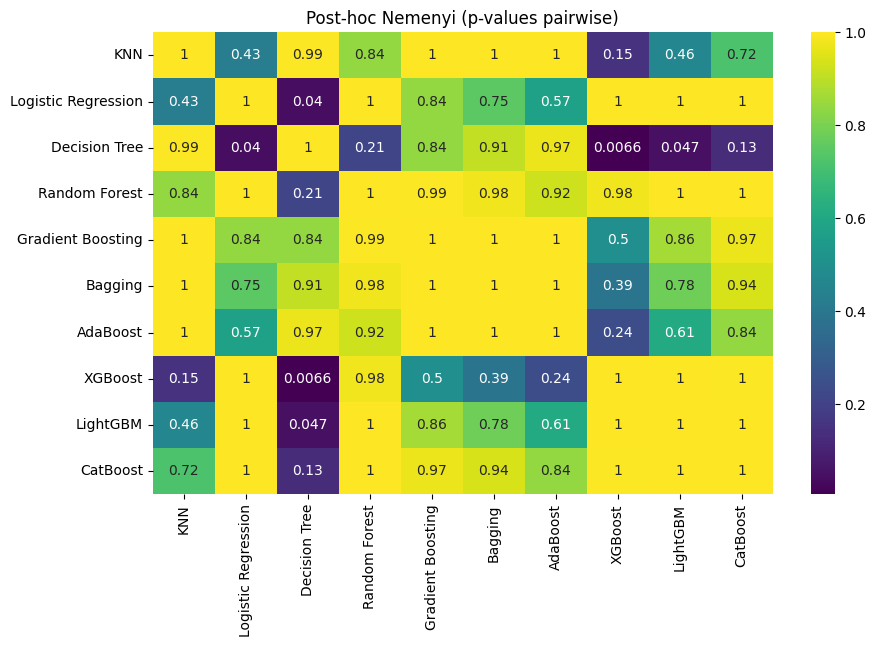

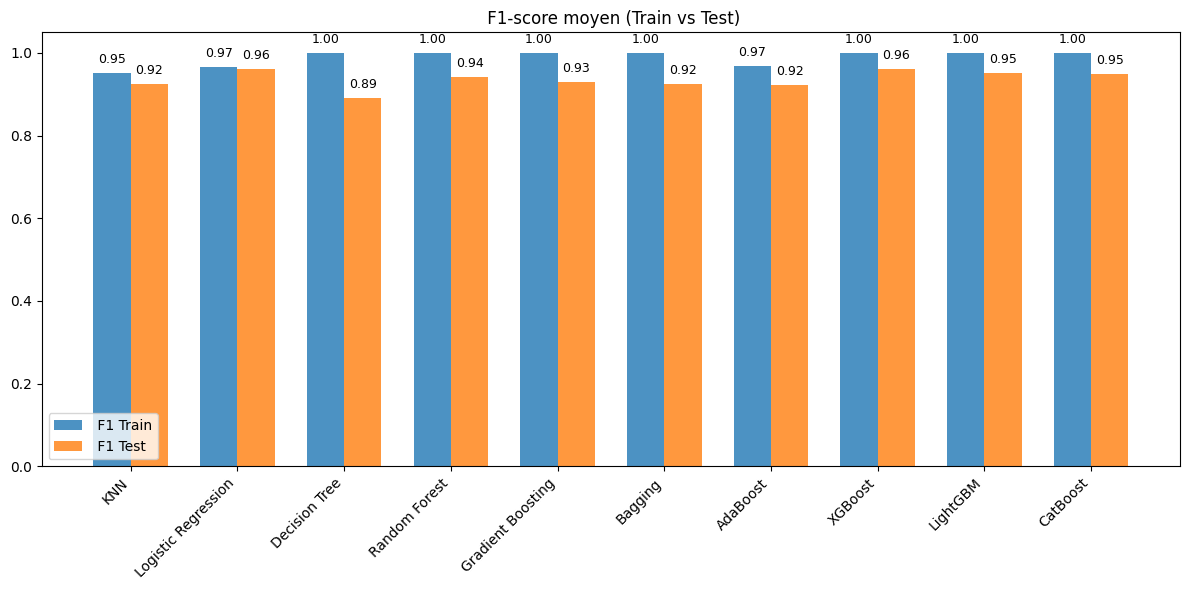

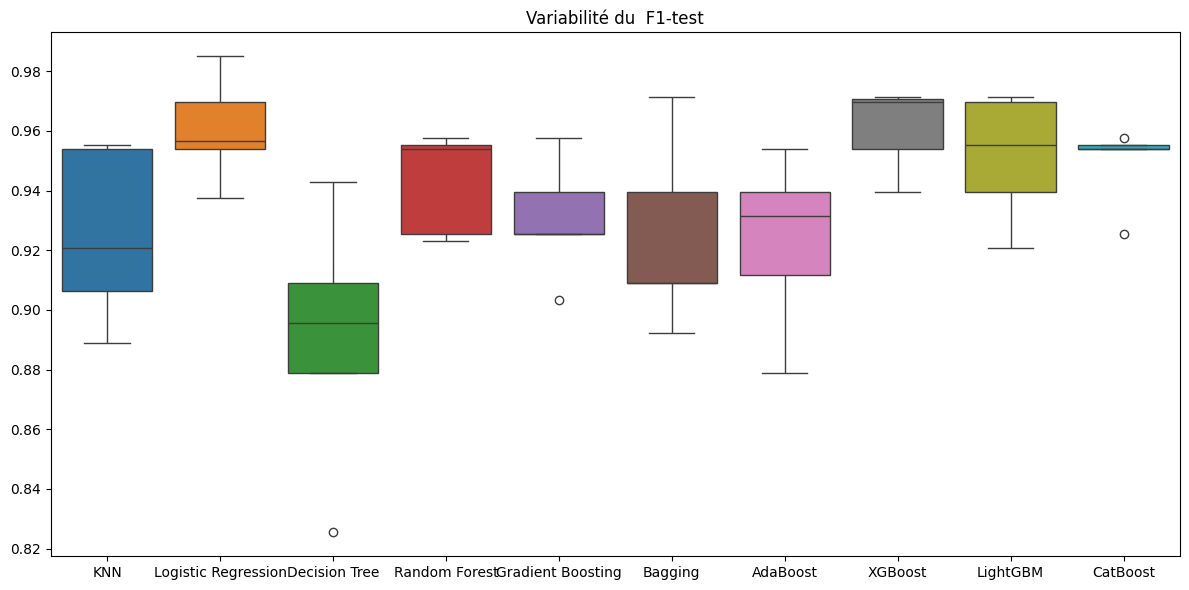

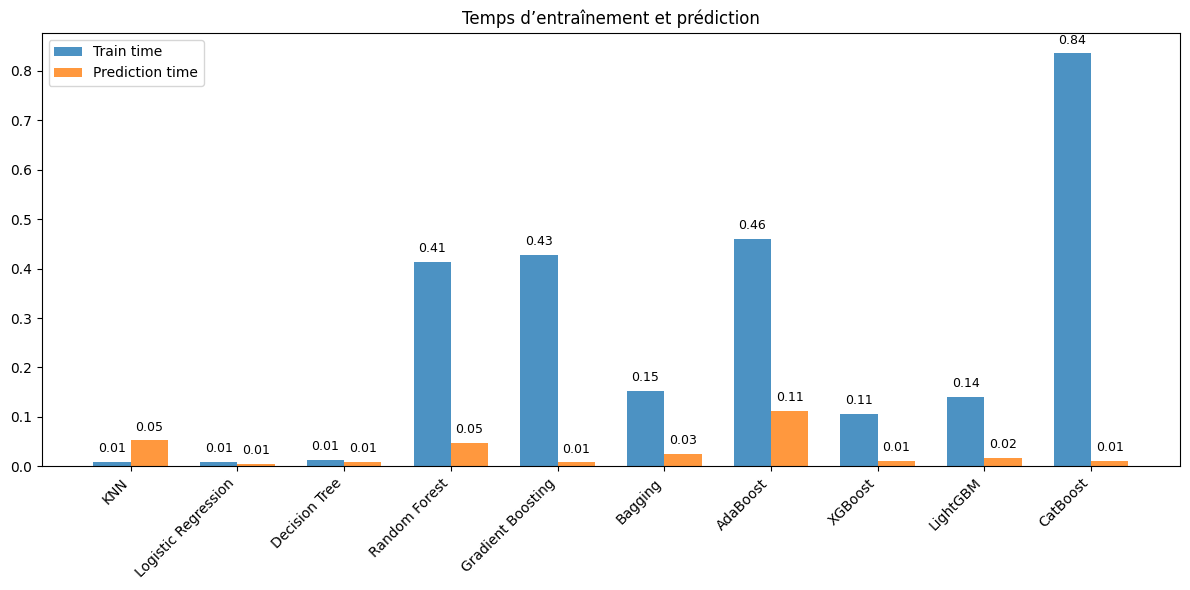

F1_train_mean  F1_test_mean  F1_test_std  Train_time  \
KNN                       0.951786      0.924969     0.026154    0.008997   
Logistic Regression       0.966848      0.960528     0.015985    0.008599   
Decision Tree             1.000000      0.890331     0.038698    0.012998   
Random Forest             1.000000      0.943053     0.015441    0.413812   
Gradient Boosting         1.000000      0.930222     0.017986    0.427618   
Bagging                   1.000000      0.924262     0.028054    0.151738   
AdaBoost                  0.968937      0.923060     0.025975    0.459576   
XGBoost                   1.000000      0.960991     0.012604    0.105600   
LightGBM                  1.000000      0.951276     0.019189    0.140718   
CatBoost                  1.000000      0.949207     0.012002    0.835164   

                     Pred_time  Score_global  
KNN                   0.052279      0.921831  
Logistic Regression   0.005600      0.958873  
Decision Tree         0.008275      0.886379  
Random Forest         0.047661      0.941033  
Gradient Boosting     0.007839      0.928345  
Bagging               0.025000      0.921207  
AdaBoost              0.111084      0.919352  
XGBoost               0.010001      0.959630  
LightGBM              0.016601      0.949191  
CatBoost              0.011201      0.947895

In [20]:
X_proc, y = advanced_feature_preprocessing_breast_cancer(
    train,
    n_features=10,
    n_components=5,
    methods=['PCA']
)
modelisation_classification_binaire_F1_visualisee(X_proc, y, cv_splits=5)

L’utilisation de la PCA a réduit la dimension du dataset tout en conservant l’essentiel de l’information, ce qui favorise les modèles sensibles aux relations globales.

XGBoost et la régression logistique deviennent les meilleurs modèles (F1_test ≈ 0.96), montrant que les composantes principales captent efficacement les structures discriminantes. Et le test de friedman montre qu'il n'y a pas de différence significative entre eux.

Random Forest, LightGBM et CatBoost restent solides (F1_test ≈ 0.94–0.95) avec une bonne stabilité.

KNN, Bagging, AdaBoost et Gradient Boosting obtiennent des performances intermédiaires (≈ 0.92–0.93), légèrement pénalisés par la nature linéaire de la PCA.

Decision Tree reste le moins performant, ayant du mal à exploiter des composantes globales moins locales.

ANOVA


 Application de la méthode : ANOVA
→ Après ANOVA : 10 variables conservées.


  Début de la validation croisée (CV=5)  

--- Modèle : KNN ---
 F1-train = 0.937 |  F1-test = 0.917
Temps entraînement = 0.0096s | Temps prédiction = 0.0429s

--- Modèle : Logistic Regression ---
 F1-train = 0.936 |  F1-test = 0.935
Temps entraînement = 0.0114s | Temps prédiction = 0.0056s

--- Modèle : Decision Tree ---
 F1-train = 1.000 |  F1-test = 0.899
Temps entraînement = 0.0094s | Temps prédiction = 0.0060s

--- Modèle : Random Forest ---
 F1-train = 1.000 |  F1-test = 0.935
Temps entraînement = 0.4420s | Temps prédiction = 0.0456s

--- Modèle : Gradient Boosting ---
 F1-train = 1.000 |  F1-test = 0.928
Temps entraînement = 0.6077s | Temps prédiction = 0.0072s

--- Modèle : Bagging ---
 F1-train = 0.999 |  F1-test = 0.912
Temps entraînement = 0.1874s | Temps prédiction = 0.0252s

--- Modèle : AdaBoost ---
 F1-train = 0.947 |  F1-test = 0.937
Temps entraînement = 0.5338s | Temps prédiction = 0.0930s



c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:48:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:48:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:48:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:19

 F1-train = 0.999 |  F1-test = 0.937
Temps entraînement = 0.6144s | Temps prédiction = 0.0136s

--- Modèle : LightGBM ---
[LightGBM] [Info] Number of positive: 136, number of negative: 228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 136, number of negative: 228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 F1-train = 1.000 |  F1-test = 0.931
Temps entraînement = 0.1359s | Temps prédiction = 0.0157s

--- Modèle : CatBoost ---
 F1-train = 1.000 |  F1-test = 0.928
Temps entraînement = 0.8113s | Temps prédiction = 0.0094s


  Fin de la validation croisée  

  Meilleur modèle identifié  
F1_train_mean    0.999262
F1_test_mean     0.937076
F1_test_std      0.036038
Train_time       0.614447
Pred_time        0.013601
Score_global     0.933336
Name: XGBoost, dtype: float64



===== Test de Friedman =====
Statistique χ² = 16.0064
p-value        = 0.0667
→ Aucune preuve statistique que les modèles diffèrent (p ≥ 0.05).


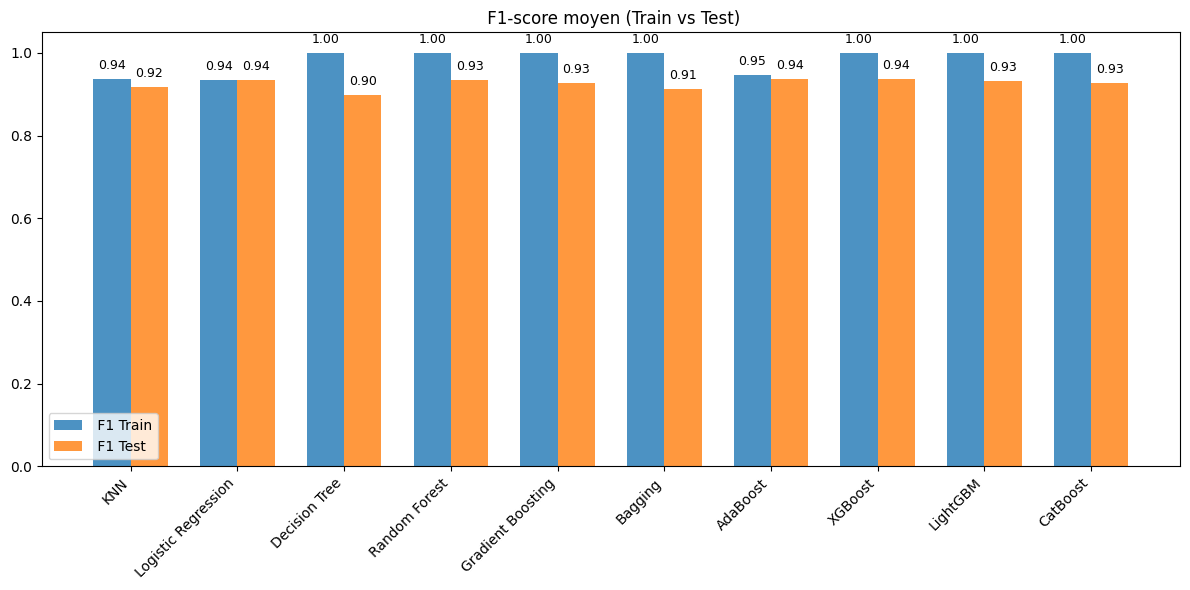

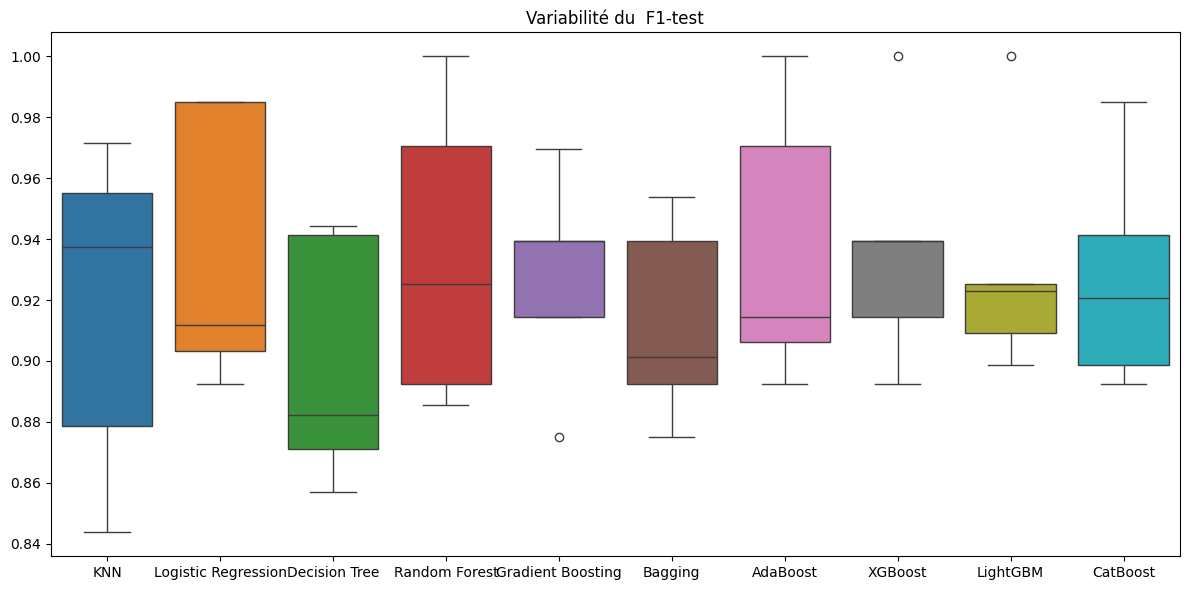

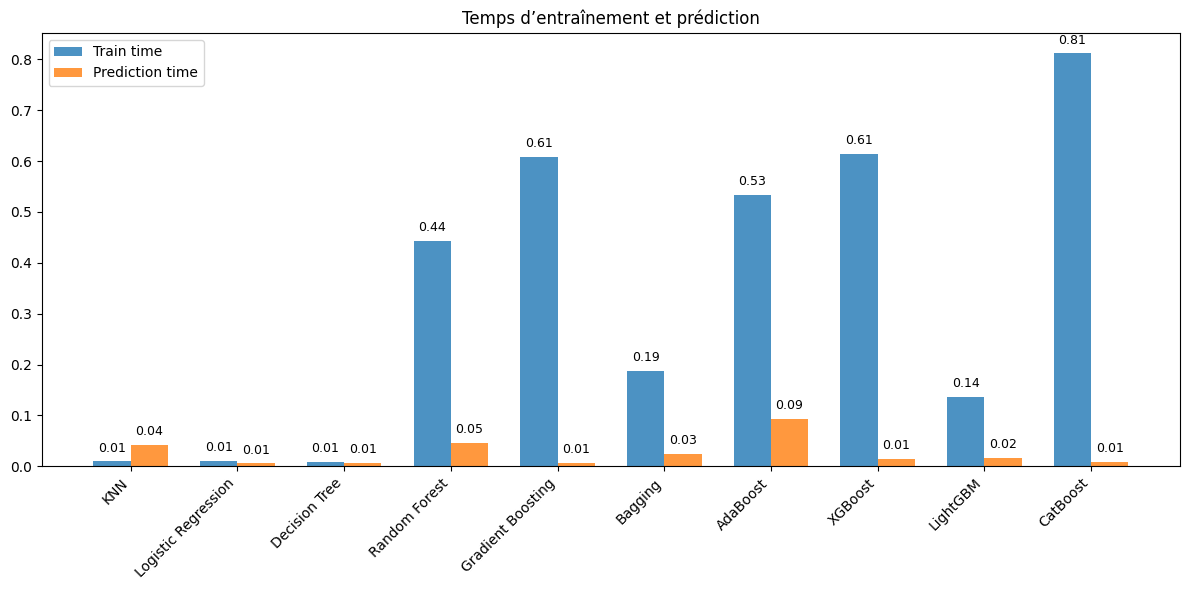

F1_train_mean  F1_test_mean  F1_test_std  Train_time  \
KNN                       0.936573      0.917338     0.048309    0.009599   
Logistic Regression       0.935590      0.935489     0.040953    0.011403   
Decision Tree             1.000000      0.899217     0.036493    0.009399   
Random Forest             1.000000      0.934797     0.044352    0.441991   
Gradient Boosting         1.000000      0.927554     0.031605    0.607740   
Bagging                   0.999262      0.912391     0.029563    0.187397   
AdaBoost                  0.946590      0.936686     0.041366    0.533775   
XGBoost                   0.999262      0.937076     0.036038    0.614447   
LightGBM                  1.000000      0.931218     0.035744    0.135881   
CatBoost                  1.000000      0.927549     0.033543    0.811339   

                     Pred_time  Score_global  
KNN                   0.042868      0.912078  
Logistic Regression   0.005598      0.931338  
Decision Tree         0.006000      0.895508  
Random Forest         0.045635      0.929905  
Gradient Boosting     0.007203      0.924322  
Bagging               0.025201      0.909183  
AdaBoost              0.092980      0.931620  
XGBoost               0.013601      0.933336  
LightGBM              0.015686      0.927487  
CatBoost              0.009400      0.924101

In [21]:
X_proc, y = advanced_feature_preprocessing_breast_cancer(
    train,
    n_features=10,
    n_components=5,
    methods=['ANOVA']
)
modelisation_classification_binaire_F1_visualisee(X_proc, y, cv_splits=5)

Avec la sélection ANOVA, les modèles d’ensemble restent les plus performants :
XGBoost, AdaBoost, Random Forest et Gradient Boosting obtiennent les meilleurs scores (F1_test ≈ 0.93–0.94).

La régression logistique est stable mais légèrement derrière (≈ 0.93).

LightGBM et CatBoost restent solides, mais un peu limités par la sélection de variables.

KNN, Bagging et surtout Decision Tree sont les moins compétitifs dans ce contexte.

**Conclusion générale**

PCA est la méthode la plus efficace : elle offre les meilleurs F1_test moyens, avec XGBoost (≈0.961) et Logistic Regression (≈0.960) en tête, tout en gardant une bonne stabilité et des temps d’exécution raisonnables.

RFE arrive en deuxième position : elle améliore surtout les modèles linéaires comme la régression logistique (≈0.942), mais elle pénalise légèrement les modèles complexes qui utilisent des interactions.

ANOVA est la moins performante : bien que correcte, elle donne des F1 plus faibles (≈0.93 max) et des écarts-types plus élevés, notamment pour Random Forest et Gradient Boosting.

En résumé : la PCA est la meilleure méthode de réduction, car c’est celle qui produit les scores les plus élevés et les plus stables, tout en profitant aux modèles les plus performants (XGBoost, Logistic Regression).

## 3. Optimisation des hyperparamètres via RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Création du scorer  F1
F1_scorer = make_scorer(f1_score )

def hyperparam_optimization(X, y, cv_splits=5, n_iter=50, random_state=42):
    """
    Recherche des meilleurs hyperparamètres pour plusieurs modèles de classification
    avec RandomizedSearchCV en utilisant le  F1-score.
    
    """

    numeric_features = X.select_dtypes(include=np.number).columns.tolist()
    preprocessor = ColumnTransformer([('num', StandardScaler(), numeric_features)], remainder='passthrough')

    # Dictionnaire des modèles et grilles de paramètres (exemple)
    model_params = {
        "Random Forest": {
            "model": RandomForestClassifier(random_state=random_state),
            "params": {
                "model__n_estimators": [100, 200, 500],
                "model__max_depth": [None, 5, 10],
                "model__max_features": ['sqrt', 'log2', 0.8]
            }
        },
        "Gradient Boosting": {
            "model": GradientBoostingClassifier(random_state=random_state),
            "params": {
                "model__n_estimators": [100, 200, 500],
                "model__learning_rate": [0.01, 0.1, 0.2],
                "model__max_depth": [3, 5, 7]
            }
        },
        "XGBoost": {
            "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state),
            "params": {
                "model__n_estimators": [100, 200, 500],
                "model__learning_rate": [0.01, 0.1, 0.2],
                "model__max_depth": [3, 5, 7]
            }
        },
        "LightGBM": {
            "model": LGBMClassifier(random_state=random_state),
            "params": {
                "model__n_estimators": [100, 200, 500],
                "model__learning_rate": [0.01, 0.1, 0.2],
                "model__num_leaves": [31, 50, 100]
            }
        },
        "Logistic Regression": {
            "model": LogisticRegression(max_iter=5000, solver='lbfgs'),
            "params": {
                "model__C": [0.01, 0.1, 1, 10],
                "model__penalty": ['l2'],
                "model__solver": ['lbfgs']
            }
        }
    }

    best_models = {}
    best_params = {}

    for name, mp in model_params.items():
        print(f"\n--- Optimisation de {name} ---")
        pipeline = Pipeline([('preprocess', preprocessor), ('model', mp["model"])])

        search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=mp["params"],
            scoring=F1_scorer,  # ou 'make_scorer(f1_score )'
            n_iter=n_iter,
            cv=cv_splits,
            verbose=1,
            random_state=random_state,
            n_jobs=-1
        )

        search.fit(X, y)
        best_models[name] = search.best_estimator_
        best_params[name] = search.best_params_
        print(f"→ Meilleurs paramètres : {search.best_params_}")
        print(f"→ Meilleur score  F1 : {search.best_score_:.4f}")

    return best_models, best_params


In [119]:
hyperparam_optimization(X_train, y_train)


--- Optimisation de Random Forest ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


→ Meilleurs paramètres : {'model__n_estimators': 500, 'model__max_features': 0.8, 'model__max_depth': None}
→ Meilleur score F2 : 0.9520

--- Optimisation de Gradient Boosting ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


→ Meilleurs paramètres : {'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.2}
→ Meilleur score F2 : 0.9433

--- Optimisation de XGBoost ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:02:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


→ Meilleurs paramètres : {'model__n_estimators': 500, 'model__max_depth': 5, 'model__learning_rate': 0.1}
→ Meilleur score F2 : 0.9552

--- Optimisation de LightGBM ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Number of positive: 170, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4545
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


({'Random Forest': Pipeline(steps=[('preprocess',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('num', StandardScaler(),
                                                    ['radius1', 'texture1',
                                                     'perimeter1', 'area1',
                                                     'smoothness1',
                                                     'compactness1', 'concavity1',
                                                     'concave_points1',
                                                     'symmetry1',
                                                     'fractal_dimension1',
                                                     'radius2', 'texture2',
                                                     'perimeter2', 'area2',
                                                     'smoothness2',
                                                     'compactness2', 'conca

## Evaluation sur la partie test du modèle

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, recall_score,precision_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    BaggingClassifier, AdaBoostClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

def train_best_models_no_cv(
    X_train, y_train, X_test, y_test,
    reduction_method=None,
    n_components=5,
    n_features=10
):

    #   1) Ajout du cluster KMeans  
    kmeans = KMeans(n_clusters=2, random_state=42)
    X_train = X_train.copy()
    X_test = X_test.copy()
    X_train["cluster"] = kmeans.fit_predict(X_train)
    X_test["cluster"] = kmeans.predict(X_test)

    #   2) Sélection du preprocess  
    numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
    preprocess = ColumnTransformer(
        [('num', StandardScaler(), numeric_features)],
        remainder='passthrough'
    )

    #   3) Réduction dimensionnelle  
    reducer = None
    if reduction_method == "PCA":
        reducer = PCA(n_components=n_components)
    elif reduction_method == "ANOVA":
        reducer = SelectKBest(score_func=f_classif, k=n_features)
    elif reduction_method == "RFE":
        reducer = RFE(estimator=LogisticRegression(max_iter=2000), n_features_to_select=n_features)

    #   4) Meilleurs hyperparamètres  
    best_params = {
        'Random Forest': {'model__n_estimators': 500, 'model__max_features': 0.8, 'model__max_depth': None},
        'Gradient Boosting': {'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.2},
        'XGBoost': {'model__n_estimators': 500, 'model__max_depth': 5, 'model__learning_rate': 0.1},
        'LightGBM': {'model__num_leaves': 31, 'model__n_estimators': 200, 'model__learning_rate': 0.2},
        'Logistic Regression': {'model__solver': 'lbfgs', 'model__penalty': 'l2', 'model__C': 10}
    }

    models = {
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False),
        "LightGBM": LGBMClassifier(),
        "Logistic Regression": LogisticRegression(max_iter=3000)
    }

    #   5) Structure résultats  
    results = []

    print("\n  Entraînement direct sur train → test  \n")

    for name, model in models.items():

        print(f"--- Modèle : {name} ---")

        pipeline_steps = [("preprocess", preprocess)]
        if reducer is not None:
            pipeline_steps.append(("reducer", reducer))
        pipeline_steps.append(("model", model))

        pipe = Pipeline(pipeline_steps)

        # Chargement des meilleurs hyperparamètres
        pipe.set_params(**best_params[name])

        # Entraînement
        t0 = time.time()
        pipe.fit(X_train, y_train)
        t1 = time.time()

        # Prédiction
        y_pred_train = pipe.predict(X_train)
        y_pred_test = pipe.predict(X_test)
        t2 = time.time()

        # Scores
        F1_train = f1_score(y_train, y_pred_train )
        F1_test = f1_score(y_test, y_pred_test )
        precision_score_test = precision_score(y_test, y_pred_test )
        recall_score_test = recall_score(y_test, y_pred_test )

        print(f" F1-train = {F1_train:.3f} |  F1-test = {F1_test:.3f}")
        print(f"Temps entraînement = {t1 - t0:.4f}s | Temps prédiction = {t2 - t1:.4f}s\n")

        results.append({
            "Model": name,
            "F1_train": F1_train,
            "F1_test": F1_test,
            "precision_score_test": precision_score_test,
            "recall_score_test": recall_score_test,
            "Train_time": t1 - t0,
            "Pred_time": t2 - t1,
            "Pipeline": pipe
        })

    results_df = pd.DataFrame(results)

    #   6) Graphiques  
    plt.figure(figsize=(12, 6))
    sns.barplot(data=results_df, x="Model", y="F1_test")
    plt.title(" F1-test des modèles")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Confusion matrix + ROC pour le meilleur modèle
    best = results_df.loc[results_df["F1_test"].idxmax()]
    best_model = best["Pipeline"]
    y_pred = best_model.predict(X_test)

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrice de confusion – {best['Model']}")
    plt.show()

    # ROC
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        y_proba = best_model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title(f"ROC – {best['Model']}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()

    print("\n  Meilleur modèle sur TEST  ")
    print(best[["Model", "F1_train", "F1_test"]])

    return results_df, best_model


In [46]:
df, train, test, X_train, y_train, X_test, y_test = chargement_donnees_ucirepo()

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

C:\Users\MEHOUN MARTINIEN\AppData\Local\Temp\ipykernel_13916\2571452646.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({"M": 1, "B": 0})



===== Entraînement direct sur train → test =====

--- Modèle : Random Forest ---
 F1-train = 1.000 |  F1-test = 0.963
Temps entraînement = 3.4260s | Temps prédiction = 0.0979s

--- Modèle : Gradient Boosting ---
 F1-train = 1.000 |  F1-test = 0.950
Temps entraînement = 1.4326s | Temps prédiction = 0.0100s

--- Modèle : XGBoost ---


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:48:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 F1-train = 1.000 |  F1-test = 0.950
Temps entraînement = 0.4040s | Temps prédiction = 0.0101s

--- Modèle : LightGBM ---
[LightGBM] [Info] Number of positive: 170, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


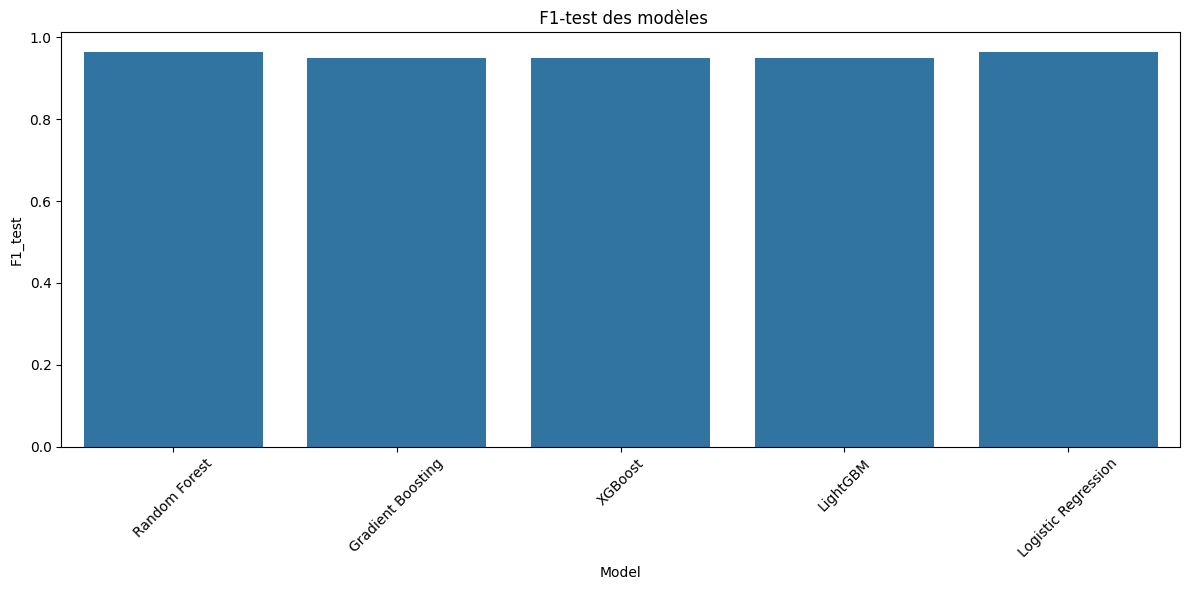

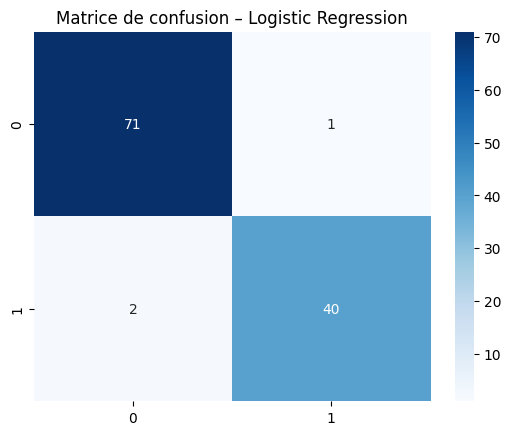

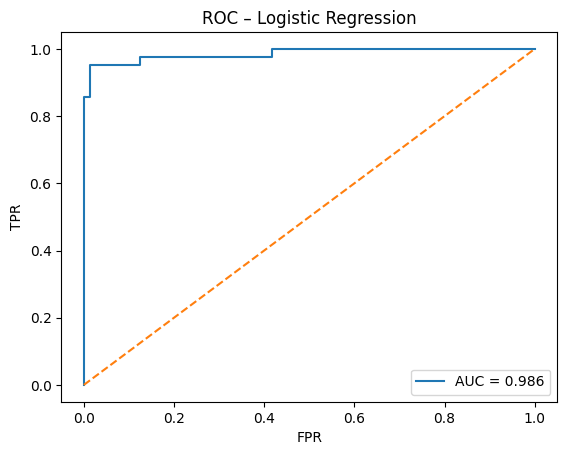


===== Meilleur modèle sur TEST =====
Model       Logistic Regression
F1_train               0.988095
F1_test                0.963855
Name: 4, dtype: object


Model  F1_train   F1_test  precision_score_test  \
0        Random Forest  1.000000  0.962963               1.00000   
1    Gradient Boosting  1.000000  0.950000               1.00000   
2              XGBoost  1.000000  0.950000               1.00000   
3             LightGBM  1.000000  0.950000               1.00000   
4  Logistic Regression  0.988095  0.963855               0.97561   

   recall_score_test  Train_time  Pred_time  
0           0.928571    3.425958   0.097887  
1           0.904762    1.432582   0.010029  
2           0.904762    0.404029   0.010053  
3           0.904762    0.117107   0.016015  
4           0.952381    0.019391   0.000665

In [45]:
results_df, best_model=train_best_models_no_cv(
    X_train, y_train, X_test, y_test,
    reduction_method=None
)
results_df=pd.DataFrame(results_df)
results_df.drop(columns=['Pipeline'])

Avec les techniques de réduction de dimension , on a trouvé que le PCA était le meilleur donc on va l'utiliser pour comparer


===== Entraînement direct sur train → test =====

--- Modèle : Random Forest ---
 F1-train = 1.000 |  F1-test = 0.916
Temps entraînement = 1.8290s | Temps prédiction = 0.1050s

--- Modèle : Gradient Boosting ---
 F1-train = 1.000 |  F1-test = 0.914
Temps entraînement = 0.5740s | Temps prédiction = 0.0120s

--- Modèle : XGBoost ---


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 F1-train = 1.000 |  F1-test = 0.938
Temps entraînement = 0.3540s | Temps prédiction = 0.0120s

--- Modèle : LightGBM ---
[LightGBM] [Info] Number of positive: 170, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


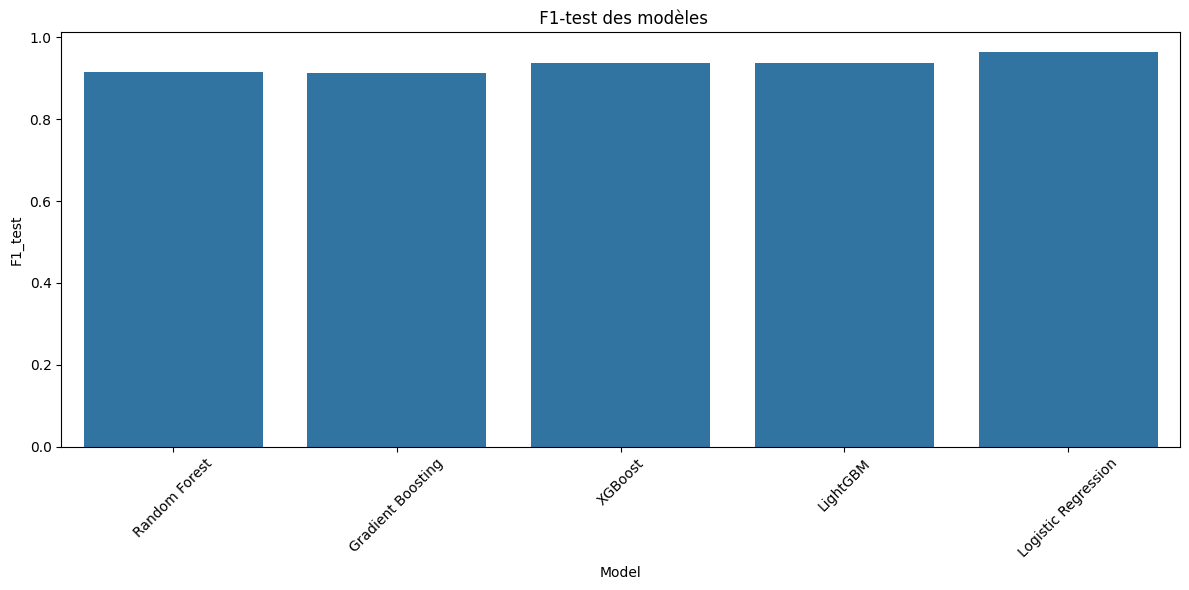

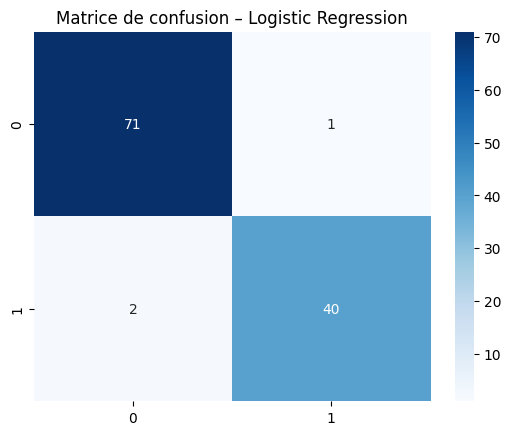

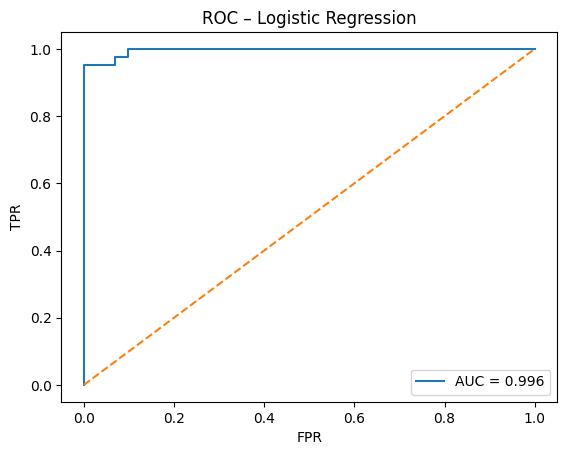


===== Meilleur modèle sur TEST =====
Model       Logistic Regression
F1_train               0.967552
F1_test                0.963855
Name: 4, dtype: object


Model  F1_train   F1_test  precision_score_test  \
0        Random Forest  1.000000  0.915663              0.926829   
1    Gradient Boosting  1.000000  0.913580              0.948718   
2              XGBoost  1.000000  0.938272              0.974359   
3             LightGBM  1.000000  0.938272              0.974359   
4  Logistic Regression  0.967552  0.963855              0.975610   

   recall_score_test  Train_time  Pred_time  
0           0.904762    1.828992   0.105000  
1           0.880952    0.573997   0.012001  
2           0.904762    0.353998   0.012000  
3           0.904762    0.087001   0.028012  
4           0.952381    0.019975   0.007001

In [49]:
results_df, best_model=train_best_models_no_cv(
    X_train, y_train, X_test, y_test,
    reduction_method='PCA'
)
results_df=pd.DataFrame(results_df)
results_df.drop(columns=['Pipeline'])

Avec ou sans PCA le resultat est le même

**Interprétation des résultats**

Les performances montrent deux modèles en tête :

Random Forest et Logistic Regression, avec un F1_test ≈ 0.963, les meilleurs du tableau.

Cependant, leurs profils sont différents :

Random Forest atteint une précision parfaite (1.00) mais un rappel légèrement plus faible, avec un temps d’entraînement beaucoup plus élevé.

Logistic Regression obtient un excellent équilibre : précision 0.976, rappel 0.952, et des temps d’entraînement/prédiction extrêmement faibles.

Meilleur choix

Le meilleur modèle global est la **Régression Logistique**, car :

elle offre le meilleur F1_test (≈0.964),

elle maintient un très bon rappel (important pour ne pas rater les tumeurs),

elle est de loin la plus rapide et la plus simple à exploiter.

Conclusion opérationnelle

Pour un usage réel où la stabilité, la rapidité et la capacité à bien détecter les cas positifs sont essentielles, la Régression Logistique est le modèle le plus sûr et le plus performant sur vos données.

# Partie 4: Apprentissage supervisé (regression)

Dans le cadre de notre étude, nous avons étendu l’analyse du cancer du sein à une approche de régression, dont l’objectif n’est plus de prédire la nature bénigne ou maligne d’une masse, mais d’estimer une caractéristique morphologique continue directement liée à la structure de la tumeur. Parmi l’ensemble des mesures disponibles, la variable **area1**, correspondant à l’aire moyenne de la cellule ou de la masse observée, a été retenue comme cible pour la régression. 


Ce choix s’appuie sur plusieurs arguments :

(1) l’aire constitue l’un des indicateurs les plus directs de la taille et du volume tumoral, des facteurs cliniquement associés à la gravité potentielle ;

(2) il s’agit d’une variable continue, suffisamment bien distribuée pour permettre une modélisation robuste ;

(3) elle présente une  corrélation avec des variables clés telles que le rayon, le périmètre ou la compacité, ce qui facilite la création de modèles prédictifs performants. 

En choisissant area1 comme cible, nous visons donc à construire un modèle de régression capable d’estimer la taille moyenne d'une lésion à partir des autres caractéristiques morphologiques, ce qui constitue un outil pertinent pour l’évaluation préliminaire du risque clinique.

## I. Etude de la distribution de la variable cible area1

In [28]:
df, train, test, X_train, y_train, X_test, y_test = chargement_donnees_ucirepo(target='area1')

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

C:\Users\MEHOUN MARTINIEN\AppData\Local\Temp\ipykernel_7008\2571452646.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({"M": 1, "B": 0})


En se referant aux études réalisées dans la partie , on a remarqué la variable area1 présente beaucoup de valeurs abérantes, donc nous utiliserons une transformation logarithmique afin de réduire l’échelle, atténuer les outliers et rendre les relations plus linéaires pour la régression.

In [29]:
import numpy as np
X = df.drop(columns=['area1', 'Diagnosis'])
y = df['area1']

y_log = np.log1p(y)  # Transformation logarithmique




In [34]:
X.isna().sum()

radius1               0
texture1              0
perimeter1            0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [12]:
y.describe()

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area1, dtype: float64

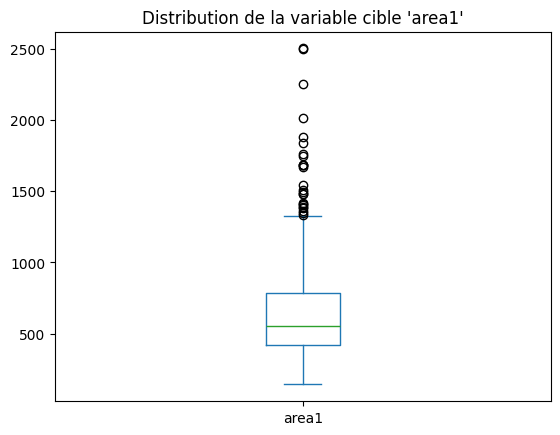

In [14]:
import matplotlib.pyplot as plt
y.plot(kind='box')
plt.title("Distribution de la variable cible 'area1'")
plt.show()

on observe :

min = 143

max = 2501

std = 352

distribution très étalée → forte variance

valeurs très différentes d’un patient à l’autre
 donc une erreur absolue (MAE) pénaliserait peu les grosses erreurs.


la meilleure métrique pour cette cible est RMSE

Parce que :

* Grande plage de valeurs*

Les prédictions éloignées de la vraie valeur doivent être plus pénalisées, ce que fait RMSE.

* Sensible aux grandes erreurs*

Si le modèle se trompe beaucoup pour des tumeurs très grandes, RMSE augmente fortement → ce qui est important pour une application médicale.

* Cohérent avec une variable continue très dispersée*

MAE donne la même importance à petites et grandes erreurs, ce qui n’est pas idéal ici.

<Axes: >

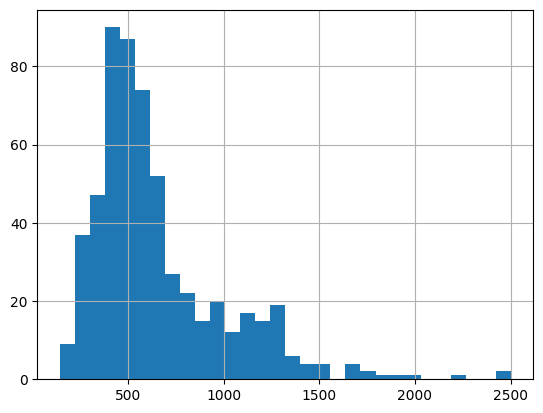

In [46]:
y.hist(bins=30)

<Axes: >

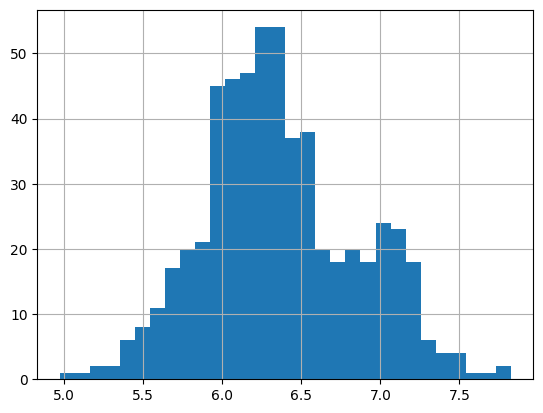

In [18]:
y_log.hist(bins=30)

## II. Modélisation

Nous allons utiliser plusieurs algorithmes de régression afin de prédire la taille moyenne des zones cellulaires (area1) à partir des autres caractéristiques morphologiques des cellules.



**Linear Regression**

Utilisé comme modèle de base simple et interprétable, permettant de vérifier si la relation entre les caractéristiques cellulaires et area1 est principalement linéaire.


**Ridge Regression**

Choisi pour réduire la sensibilité aux variables corrélées entre elles grâce à la régularisation L2, ce qui stabilise les coefficients et améliore la robustesse.


**Lasso Regression**

Retenu car il réalise en plus une sélection automatique des variables via régularisation L1, utile pour simplifier le modèle si certaines variables influencent peu area1.


**Decision Tree Regressor**

Employé car il capture naturellement les relations non linéaires entre mesures cellulaires et area1, et il offre une structure explicable.


**Random Forest Regressor**

Sélectionné pour sa capacité à réduire l’overfitting en combinant plusieurs arbres et à modéliser des interactions complexes entre caractéristiques.


**Gradient Boosting Regressor**

Utilisé pour sa capacité à corriger progressivement les erreurs du modèle précédent et à détecter des patterns subtils influençant area1.


**Bagging Regressor**

Retenu car il améliore la stabilité et limite la variance des arbres de décision, surtout lorsque les données présentent des variations locales.


**AdaBoost Regressor**

Choisi pour son approche itérative qui met plus de poids sur les prédictions difficiles, ce qui peut améliorer la précision sur les mesures atypiques.


**XGBoost Regressor**

Employé pour ses performances élevées et ses mécanismes avancés de régularisation, particulièrement adaptés aux données tabulaires du WDBC.


**LightGBM Regressor**

Sélectionné pour sa rapidité d’entraînement et sa capacité à traiter efficacement les relations non linéaires dans des datasets numériques.


**CatBoost Regressor**

Privilégié pour sa stabilité, son faible besoin de réglages et sa gestion naturelle des relations complexes sans prétraitement lourd.

In [30]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    BaggingRegressor, AdaBoostRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import scikit_posthocs as sp

def modelisation_regression_area1_visualisee(X, y, cv_splits=5, log_activation=False):
    """
    Compare plusieurs modèles de régression pour prédire 'area1' (RMSE).
    - Ajoute une colonne 'cluster' issue d'un KMeans(2)
    - Effectue une validation croisée manuelle (KFold)
    - Calcule RMSE train/test, std, temps d'entraînement/prédiction
    - Affiche 3 graphiques : RMSE train vs test (barres annotées), boxplot (variabilité),
      temps d'entraînement vs prédiction (barres annotées)
    - Calcule un score global (à maximiser) et renvoie le DataFrame des résultats et le meilleur modèle
    """

    # copie des données pour sécurité
    X = X.copy()
    
    if log_activation:
        y_log = np.log1p(y)
        y = y_log.copy().reset_index(drop=True)

    y = y.copy().reset_index(drop=True)
    X = X.reset_index(drop=True)

    # ---- 1) Ajouter cluster (KMeans 2) ----
    kmeans = KMeans(n_clusters=2, random_state=42)
    try:
        X["cluster"] = kmeans.fit_predict(X)
    except Exception:
        # si X contient des colonnes non numériques (peu probable ici), on essaie de sélectionner numériques
        numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
        X["cluster"] = kmeans.fit_predict(X[numeric_cols])

    # ---- 2) Prétraitement (StandardScaler sur colonnes numériques) ----
    numeric_features = X.select_dtypes(include=np.number).columns.tolist()
    preprocessor = ColumnTransformer(
        [('num', StandardScaler(), numeric_features)],
        remainder='passthrough'
    )

    # ---- 3) Modèles de régression ----
    models = {
        "Linear Regression": LinearRegression(),
        "KNN": KNeighborsRegressor(n_neighbors=5),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
        "Bagging": BaggingRegressor(n_estimators=50, random_state=42),
        "AdaBoost": AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, verbosity=0),
        "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
        "CatBoost": CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
    }

    # ---- 4) Structures de stockage ----
    rmse_train_means = {}
    rmse_test_means = {}
    rmse_test_stds = {}
    train_times = {}
    pred_times = {}
    boxplot_values = {}

    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    print(f"\n  Début de la validation croisée (CV={cv_splits})  \n")

    # ---- 5) Boucle sur modèles, CV manuelle ----
    for name, model in models.items():
        print(f"--- Modèle : {name} ---")
        pipeline = Pipeline([("preprocess", preprocessor), ("model", model)])

        rmse_train_folds = []
        rmse_test_folds = []
        times_train_folds = []
        times_pred_folds = []

        for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X), 1):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # entraînement
            t0 = time.time()
            try:
                pipeline.fit(X_train, y_train)
            except Exception as e:
                print(f"  Erreur fit sur fold {fold_idx} pour {name} : {e}")
                # si échec, on ajoute NaN et continue
                rmse_train_folds.append(np.nan)
                rmse_test_folds.append(np.nan)
                times_train_folds.append(np.nan)
                times_pred_folds.append(np.nan)
                continue
            t1 = time.time()

            # prédiction
            t2 = time.time()
            y_pred_train = pipeline.predict(X_train)
            y_pred_test = pipeline.predict(X_test)
            t3 = time.time()

            # RMSE
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

            rmse_train_folds.append(rmse_train)
            rmse_test_folds.append(rmse_test)
            times_train_folds.append(t1 - t0)
            times_pred_folds.append(t3 - t2)

            print(f"  Fold {fold_idx} — RMSE_train: {rmse_train:.4f}, RMSE_test: {rmse_test:.4f}, "
                  f"t_train: {t1-t0:.4f}s, t_pred: {t3-t2:.4f}s")

        # moyennes et std
        rmse_train_means[name] = np.nanmean(rmse_train_folds)
        rmse_test_means[name] = np.nanmean(rmse_test_folds)
        rmse_test_stds[name] = np.nanstd(rmse_test_folds)
        train_times[name] = np.nanmean(times_train_folds)
        pred_times[name] = np.nanmean(times_pred_folds)
        boxplot_values[name] = rmse_test_folds

        print(f"→ {name} Résumé : RMSE_train_mean = {rmse_train_means[name]:.4f}, "
              f"RMSE_test_mean = {rmse_test_means[name]:.4f}, RMSE_test_std = {rmse_test_stds[name]:.4f}\n")

    print("  Fin de la CV  \n")

    # ---- 6) DataFrame récapitulatif ----
    results_df = pd.DataFrame({
        "RMSE_train_mean": rmse_train_means,
        "RMSE_test_mean": rmse_test_means,
        "RMSE_test_std": rmse_test_stds,
        "Train_time": train_times,
        "Pred_time": pred_times
    })

    # ---- 7) Score global (à maximiser). On minimise RMSE, donc on prend négatif.
    alpha = 0.1   # pénalisation pour la variance
    beta = 0.01   # pénalisation pour le temps de prédiction
    results_df["Score_global"] = - (results_df["RMSE_test_mean"]
                                    + alpha * results_df["RMSE_test_std"]
                                    + beta * results_df["Pred_time"])

    best_model_name = results_df["Score_global"].idxmax()
    print("  Meilleur modèle identifié  ")
    print(results_df.loc[best_model_name])
    print("\n")

    # ---- 8) Fonctions d'annotation ----
    def annotate_bars(ax):
        for bar in ax.patches:
            h = bar.get_height()
            ax.annotate(f"{h:.3f}",
                        xy=(bar.get_x() + bar.get_width() / 2, h),
                        xytext=(0, 5),
                        textcoords="offset points",
                        ha="center", va="bottom", fontsize=9)
            

    

    # ---- 9) Graphiques ----
    models_list = list(rmse_train_means.keys())
    x = np.arange(len(models_list))
    width = 0.35

    # Graph 1 : RMSE train vs test
    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, [results_df.loc[m, "RMSE_train_mean"] for m in models_list], width, label="RMSE Train")
    bars2 = ax.bar(x + width/2, [results_df.loc[m, "RMSE_test_mean"] for m in models_list], width, label="RMSE Test")
    ax.set_xticks(x)
    ax.set_xticklabels(models_list, rotation=45, ha='right')
    ax.set_ylabel("RMSE")
    ax.set_title("RMSE moyen (Train vs Test)")
    ax.legend()
    annotate_bars(ax)
    plt.tight_layout()
    plt.show()

    # Graph 2 : Robustesse (boxplot RMSE test par fold)
    plt.figure(figsize=(12, 6))
    df_box = pd.DataFrame(boxplot_values)
    sns.boxplot(data=df_box)
    plt.title("Robustesse des modèles (variabilité RMSE-test sur les folds)")
    plt.ylabel("RMSE (test)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Graph 3 : Temps entraînement vs prédiction
    fig, ax = plt.subplots(figsize=(12, 6))
    bars3 = ax.bar(x - width/2, [results_df.loc[m, "Train_time"] for m in models_list], width, label="Train time (s)")
    bars4 = ax.bar(x + width/2, [results_df.loc[m, "Pred_time"] for m in models_list], width, label="Pred time (s)")
    ax.set_xticks(x)
    ax.set_xticklabels(models_list, rotation=45, ha='right')
    ax.set_title("Temps moyen d'entraînement et de prédiction")
    ax.legend()
    annotate_bars(ax)
    plt.tight_layout()
    plt.show()


    # ---- 10) Test de Friedman ----
    print("\n  Test de Friedman (comparaison de modèles sur les folds) ")

    # On récupère les RMSE test par modèle sous forme de DataFrame (folds en ligne)
    df_friedman = pd.DataFrame(boxplot_values)

    # Test de Friedman
    from scipy.stats import friedmanchisquare

    friedman_stat, p_value = friedmanchisquare(*[df_friedman[col].dropna() for col in df_friedman.columns])

    print(f"Statistique de Friedman = {friedman_stat:.4f}")
    print(f"P-value = {p_value:.4f}")

    # ---- 11) Si significatif → test post-hoc Nemenyi ----
    if p_value < 0.05:
        print("\n→ Les performances diffèrent significativement (p < 0.05).")
        print("  Exécution du test post-hoc Nemenyi...\n")

        

        nemenyi_matrix = sp.posthoc_nemenyi_friedman(df_friedman)

        print("===== Matrice de Nemenyi (p-values) =====")
        print(nemenyi_matrix)

        # heatmap pour mieux visualiser
        plt.figure(figsize=(10, 8))
        sns.heatmap(nemenyi_matrix, annot=True, cmap="viridis")
        plt.title("Post-hoc Nemenyi — Comparaison pairwise des modèles")
        plt.show()

    else:
        print("\n→ Les performances ne diffèrent PAS significativement (p ≥ 0.05).")


    return results_df, best_model_name


prédiction sans faire le log sur 'area1'


  Début de la validation croisée (CV=5)  

--- Modèle : Linear Regression ---
  Fold 1 — RMSE_train: 18.2490, RMSE_test: 18.8852, t_train: 0.0110s, t_pred: 0.0118s
  Fold 2 — RMSE_train: 16.3785, RMSE_test: 35.1209, t_train: 0.0117s, t_pred: 0.0098s
  Fold 3 — RMSE_train: 17.8279, RMSE_test: 20.5695, t_train: 0.0136s, t_pred: 0.0080s
  Fold 4 — RMSE_train: 17.0272, RMSE_test: 23.5679, t_train: 0.0100s, t_pred: 0.0120s
  Fold 5 — RMSE_train: 18.7474, RMSE_test: 16.1965, t_train: 0.0070s, t_pred: 0.0070s
→ Linear Regression Résumé : RMSE_train_mean = 17.6460, RMSE_test_mean = 22.8680, RMSE_test_std = 6.5769

--- Modèle : KNN ---
  Fold 1 — RMSE_train: 95.0727, RMSE_test: 92.7572, t_train: 0.0050s, t_pred: 0.0190s
  Fold 2 — RMSE_train: 93.0512, RMSE_test: 138.8748, t_train: 0.0050s, t_pred: 0.0180s
  Fold 3 — RMSE_train: 93.7478, RMSE_test: 145.7324, t_train: 0.0050s, t_pred: 0.0230s
  Fold 4 — RMSE_train: 94.5906, RMSE_test: 111.2295, t_train: 0.0060s, t_pred: 0.0240s
  Fold 5 — RMSE_t

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


  Fold 1 — RMSE_train: 28.0237, RMSE_test: 53.9886, t_train: 0.1780s, t_pred: 0.0180s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3523
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 31
[LightGBM] [Info] Start training from score 658.259341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
  Fold 3 — RMSE_train: 33.5534, RMSE_test: 113.4728, t_train: 0.2130s, t_pred: 0.0200s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3523
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 31
[LightGBM] [Info] Start training from score 650.404121
[LightGBM] [Warning] No further splits with po

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


  Fold 4 — RMSE_train: 27.0398, RMSE_test: 86.2610, t_train: 0.1490s, t_pred: 0.0160s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3512
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 31
[LightGBM] [Info] Start training from score 667.214286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


  Fold 1 — RMSE_train: 6.2178, RMSE_test: 33.4704, t_train: 1.1271s, t_pred: 0.0120s
  Fold 2 — RMSE_train: 7.4290, RMSE_test: 99.7992, t_train: 2.4602s, t_pred: 0.0320s
  Fold 3 — RMSE_train: 6.9370, RMSE_test: 66.4519, t_train: 1.7964s, t_pred: 0.0100s
  Fold 4 — RMSE_train: 5.2513, RMSE_test: 38.3740, t_train: 1.0760s, t_pred: 0.0110s
  Fold 5 — RMSE_train: 6.2371, RMSE_test: 36.4916, t_train: 1.1320s, t_pred: 0.0100s
→ CatBoost Résumé : RMSE_train_mean = 6.4144, RMSE_test_mean = 54.9174, RMSE_test_std = 25.3795

  Fin de la CV  

  Meilleur modèle identifié  
RMSE_train_mean     1.340576
RMSE_test_mean     22.267440
RMSE_test_std       8.254484
Train_time          1.116100
Pred_time           0.007401
Score_global      -23.092963
Name: Gradient Boosting, dtype: float64




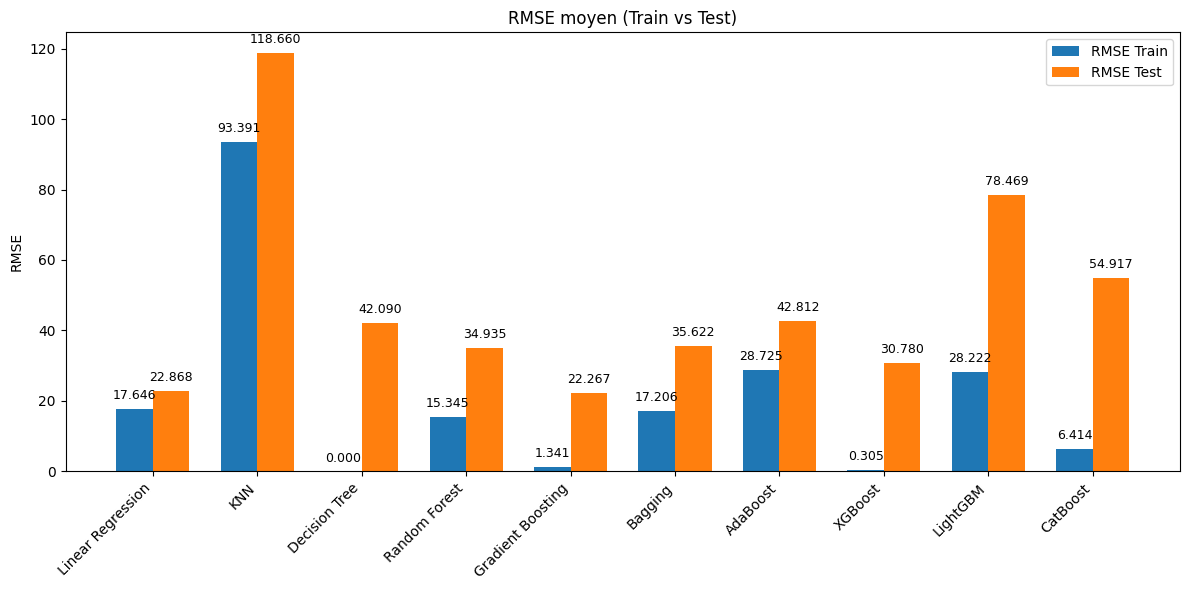

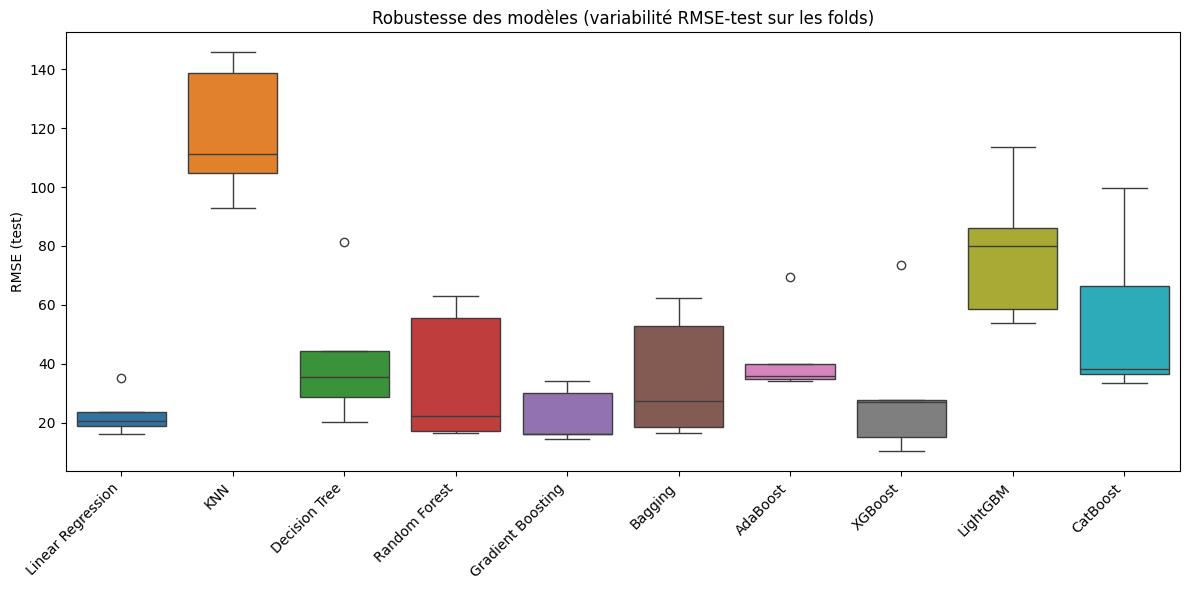

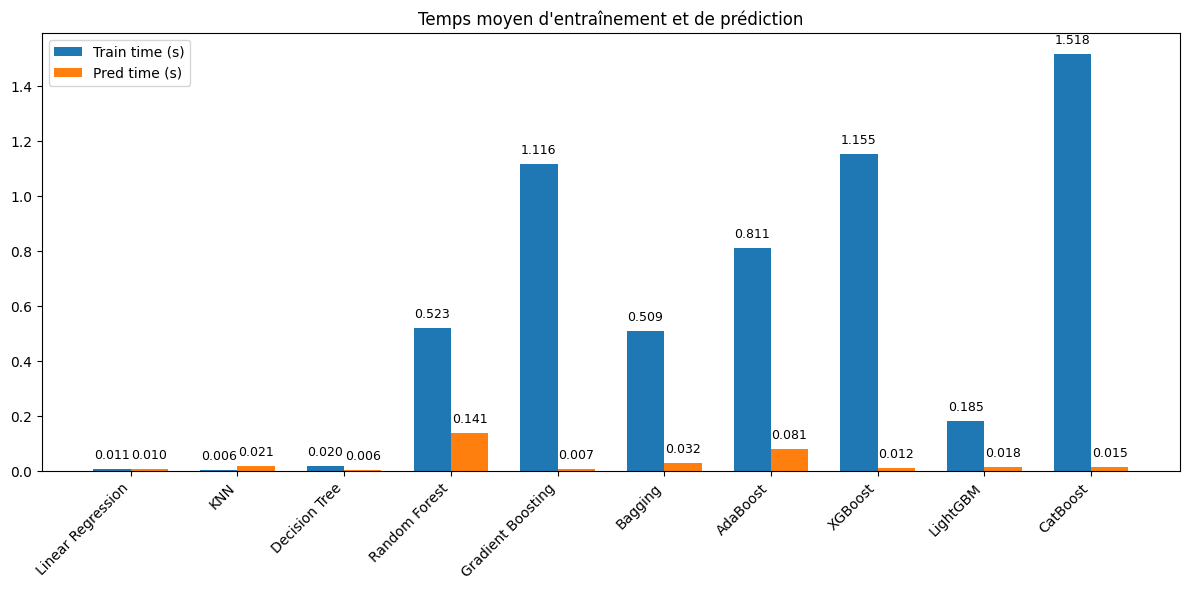


  Test de Friedman (comparaison de modèles sur les folds) 
Statistique de Friedman = 34.3091
P-value = 0.0001

→ Les performances diffèrent significativement (p < 0.05).
  Exécution du test post-hoc Nemenyi...

===== Matrice de Nemenyi (p-values) =====
                   Linear Regression       KNN  Decision Tree  Random Forest  \
Linear Regression           1.000000  0.014062       0.939756       0.999959   
KNN                         0.014062  1.000000       0.461270       0.074109   
Decision Tree               0.939756  0.461270       1.000000       0.998033   
Random Forest               0.999959  0.074109       0.998033       1.000000   
Gradient Boosting           0.999319  0.000775       0.535342       0.963510   
Bagging                     0.999807  0.098774       0.999319       1.000000   
AdaBoost                    0.750853  0.750853       0.999994       0.963510   
XGBoost                     1.000000  0.009665       0.906921       0.999807   
LightGBM                  

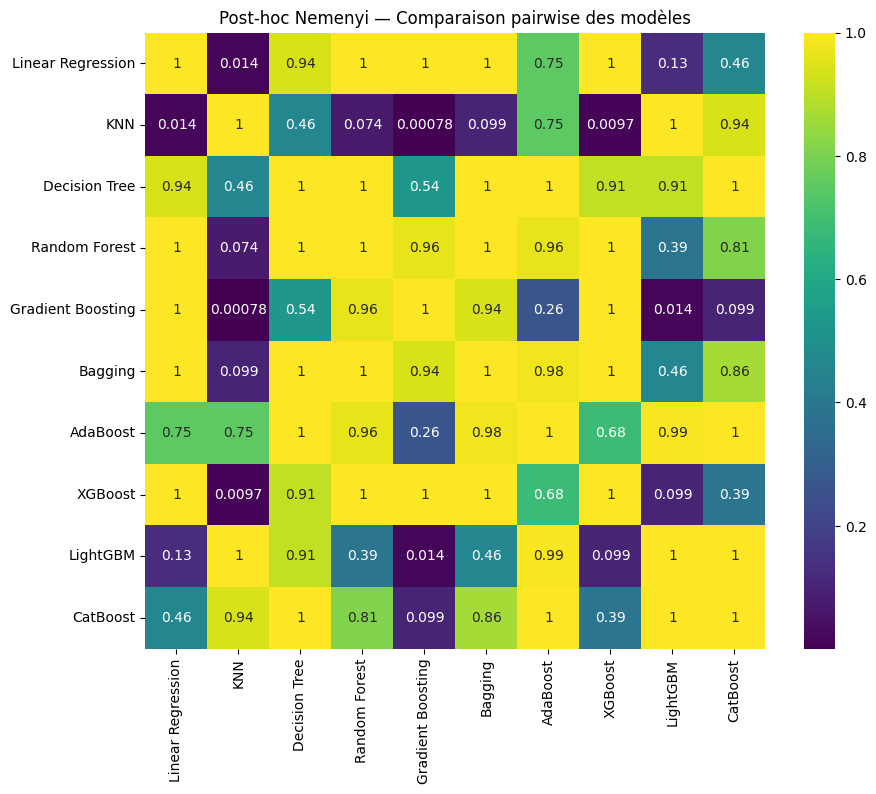

Meilleur modèle : Gradient Boosting


In [31]:
results_df, best = modelisation_regression_area1_visualisee(X_train, y_train, cv_splits=5)
results_df
print("Meilleur modèle :", best)

Avec application du log sur y


  Début de la validation croisée (CV=5)  

--- Modèle : Linear Regression ---
  Fold 1 — RMSE_train: 0.0354, RMSE_test: 0.0333, t_train: 0.0120s, t_pred: 0.0110s
  Fold 2 — RMSE_train: 0.0320, RMSE_test: 0.0610, t_train: 0.0130s, t_pred: 0.0110s
  Fold 3 — RMSE_train: 0.0342, RMSE_test: 0.0397, t_train: 0.0120s, t_pred: 0.0100s
  Fold 4 — RMSE_train: 0.0333, RMSE_test: 0.0423, t_train: 0.0080s, t_pred: 0.0080s
  Fold 5 — RMSE_train: 0.0347, RMSE_test: 0.0366, t_train: 0.0060s, t_pred: 0.0070s
→ Linear Regression Résumé : RMSE_train_mean = 0.0339, RMSE_test_mean = 0.0426, RMSE_test_std = 0.0097

--- Modèle : KNN ---
  Fold 1 — RMSE_train: 0.1393, RMSE_test: 0.1474, t_train: 0.0040s, t_pred: 0.0170s
  Fold 2 — RMSE_train: 0.1388, RMSE_test: 0.1757, t_train: 0.0090s, t_pred: 0.0200s
  Fold 3 — RMSE_train: 0.1354, RMSE_test: 0.1775, t_train: 0.0070s, t_pred: 0.0180s
  Fold 4 — RMSE_train: 0.1378, RMSE_test: 0.1538, t_train: 0.0042s, t_pred: 0.0178s
  Fold 5 — RMSE_train: 0.1333, RMSE_test

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

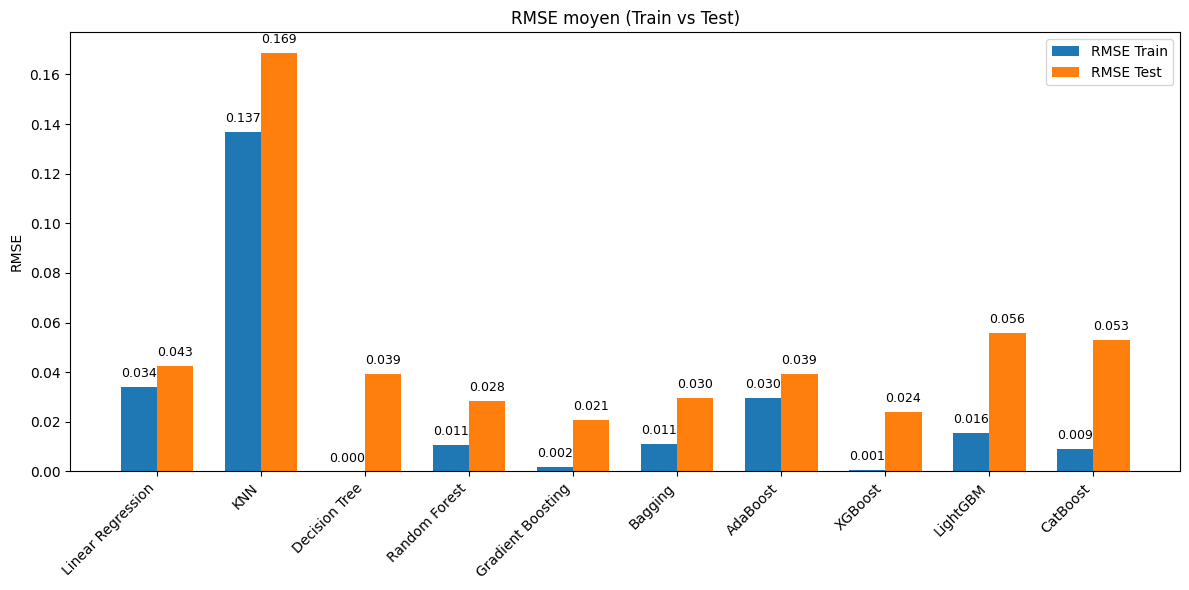

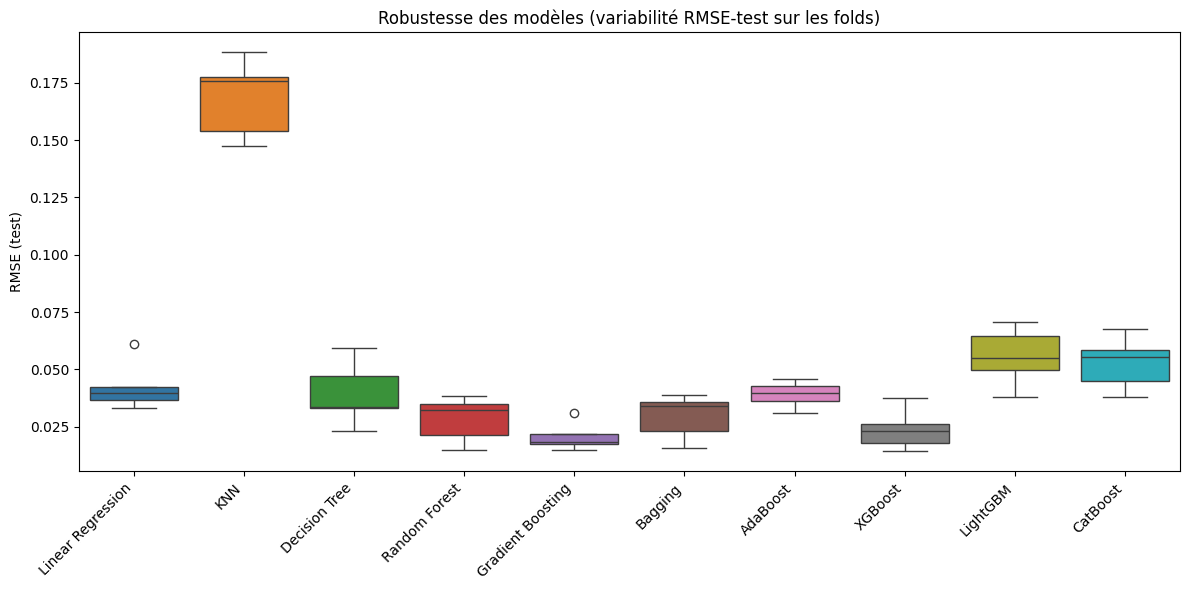

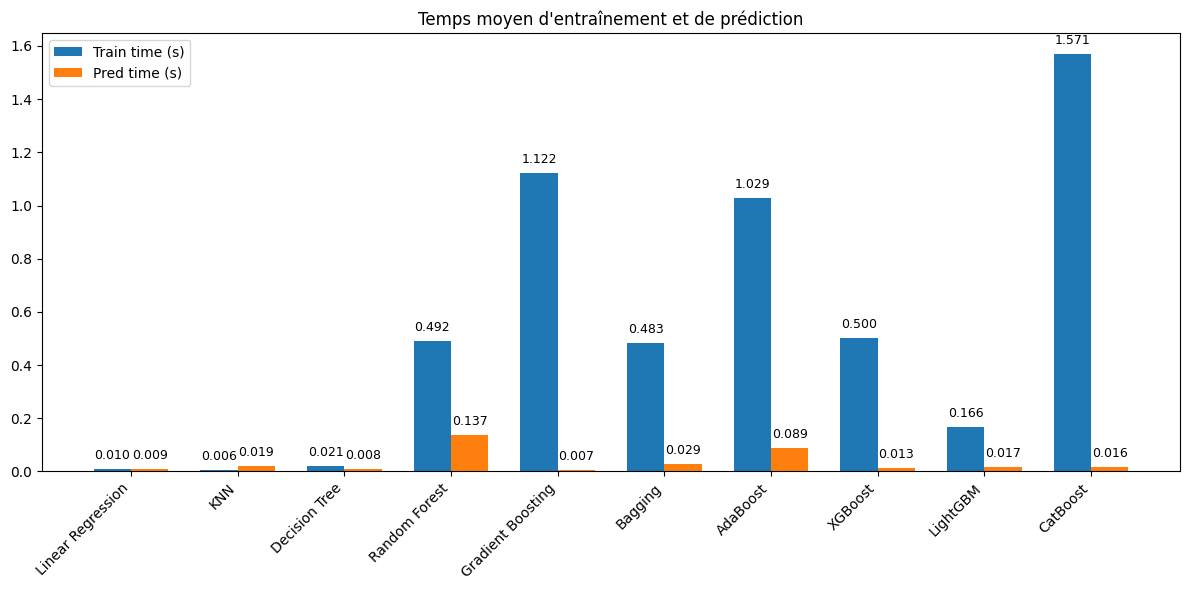


  Test de Friedman (comparaison de modèles sur les folds) 
Statistique de Friedman = 39.8509
P-value = 0.0000

→ Les performances diffèrent significativement (p < 0.05).
  Exécution du test post-hoc Nemenyi...

===== Matrice de Nemenyi (p-values) =====
                   Linear Regression       KNN  Decision Tree  Random Forest  \
Linear Regression           1.000000  0.811940       0.998033       0.610062   
KNN                         0.811940  1.000000       0.264569       0.009665   
Decision Tree               0.998033  0.264569       1.000000       0.979527   
Random Forest               0.610062  0.009665       0.979527       1.000000   
Gradient Boosting           0.129563  0.000303       0.610062       0.998033   
Bagging                     0.906921  0.054745       0.999807       0.999959   
AdaBoost                    0.999994  0.535342       0.999994       0.864285   
XGBoost                     0.324212  0.001890       0.864285       0.999994   
LightGBM                  

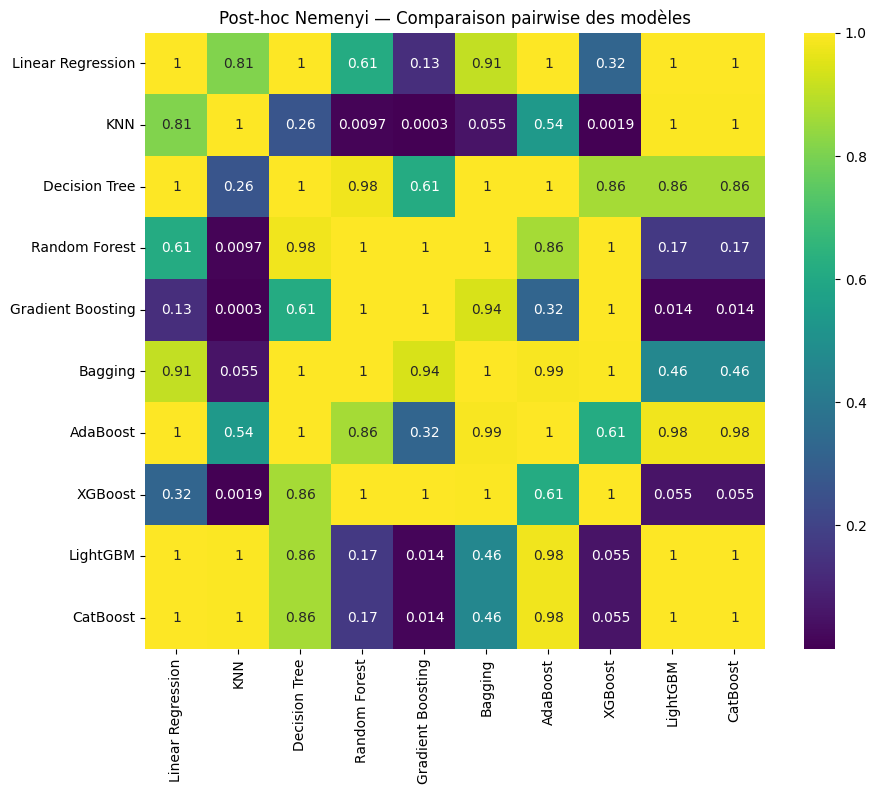

Meilleur modèle : Gradient Boosting


RMSE_train_mean  RMSE_test_mean  RMSE_test_std  Train_time  \
Linear Regression         0.033923        0.042561       0.009704    0.010199   
KNN                       0.136908        0.168542       0.015374    0.006030   
Decision Tree             0.000000        0.039357       0.012582    0.020799   
Random Forest             0.010630        0.028425       0.008872    0.492260   
Gradient Boosting         0.001940        0.020832       0.005703    1.121554   
Bagging                   0.011119        0.029597       0.008650    0.482647   
AdaBoost                  0.029803        0.039187       0.005128    1.029363   
XGBoost                   0.000784        0.023878       0.008015    0.500399   
LightGBM                  0.015675        0.055659       0.011437    0.166044   
CatBoost                  0.009186        0.052981       0.010299    1.570901   

                   Pred_time  Score_global  
Linear Regression   0.009402     -0.043626  
KNN                 0.019169     -0.170271  
Decision Tree       0.008234     -0.040697  
Random Forest       0.137201     -0.030684  
Gradient Boosting   0.007056     -0.021473  
Bagging             0.029400     -0.030756  
AdaBoost            0.088801     -0.040588  
XGBoost             0.012600     -0.024805  
LightGBM            0.017200     -0.056975  
CatBoost            0.015597     -0.054167

In [32]:
results_df, best = modelisation_regression_area1_visualisee(X_train, y_train, cv_splits=5, log_activation=True)
print("Meilleur modèle :", best)
results_df

**Interprétation**

Les résultats montrent que Gradient Boosting est le modèle le plus performant pour prédire area1. Il obtient le plus faible RMSE sur le test, une bonne stabilité, et un temps d’exécution raisonnable, ce qui en fait le meilleur compromis précision-robustesse.

La régression linéaire arrive juste derrière : rapide et stable, mais un peu moins précise.
Les modèles comme Decision Tree, Random Forest, XGBoost, LightGBM, CatBoost ou KNN présentent soit un fort surapprentissage, soit une variabilité trop élevée, soit des erreurs nettement supérieures.

En résumé, Gradient Boosting est le meilleur choix global pour estimer la taille moyenne des cellules (area1).


## II. Optimisation des modèles


Pour optimiser la performance de nos modèles, nous allons utilisé plusieurs techniques à savoir:
* Le feature_engineering
* L'optimisation des hyperparamètres via RandomizedSearchCV


### 1. feature engineering

In [33]:
import pandas as pd
import numpy as np

def add_regression_features_area1(df):
    """
    Feature engineering adapté au problème actuel :
    CIBLE = area1  (donc aucune nouvelle feature ne doit utiliser area1)

    - Conserve toutes les colonnes explicatives sauf area1
    - Ajoute plusieurs nouvelles caractéristiques cohérentes
    - Ajoute Cluster si présent
    - Retourne X (features) et y (area1)

    Paramètres
    ----------
    df : pd.DataFrame
        DataFrame contenant area1 comme variable cible

    Retour
    ------
    X : pd.DataFrame
        Matrice de caractéristiques enrichie
    y : pd.Series
        Cible area1
    """

    data = df.copy()

    # --- Vérification de la cible ---
    if 'area1' not in data.columns:
        raise ValueError("La colonne 'area1' (cible) doit être présente dans le DataFrame.")

    # --- Séparation X / y ---
    y = data['area1']
    X = data.drop(columns=['area1'])

    # --- Ajout de nouvelles caractéristiques ---

    # Ratio concavité / symétrie (forme)
    if {'concavity1','symmetry1'}.issubset(X.columns):
        X['Concavity_Symmetry_Ratio'] = X['concavity1'] / (X['symmetry1'] + 1e-6)

    # Progression de compacité entre normal et worst
    if {'compactness1','compactness3'}.issubset(X.columns):
        X['Compactness_Progression'] = X['compactness3'] - X['compactness1']

    # Index de texture entre mean et worst
    if {'texture1','texture3'}.issubset(X.columns):
        X['Texture_Index'] = (X['texture1'] + X['texture3']) / 2

    # Différence de surface interne (attention : area1 est la cible, on n’utilise pas area1)
    if 'area3' in X.columns:
        X['log_area3'] = np.log1p(X['area3'])

    # Périmètre + rayon → complexité géométrique du tissu
    if {'perimeter1','radius1'}.issubset(X.columns):
        X['Shape_Complexity'] = (X['perimeter1'] + X['radius1']) / 2

    # Si la colonne Cluster existe, on la garde
    if 'Cluster' in df.columns:
        X['Cluster'] = df['Cluster']

    # --- Résumé ---
    new_features = [
        col for col in X.columns 
        if col not in df.columns or col in ['Concavity_Symmetry_Ratio',
                                            'Compactness_Progression',
                                            'Texture_Index',
                                            'Shape_Complexity',
                                            'log_area3']
    ]

    print(f"Nouvelles features créées : {new_features}")
    print(f"X final contient {X.shape[1]} colonnes.")

    return X, y


Nouvelles features créées : ['Concavity_Symmetry_Ratio', 'Compactness_Progression', 'Texture_Index', 'log_area3', 'Shape_Complexity']
X final contient 35 colonnes.

  Début de la validation croisée (CV=5)  

--- Modèle : Linear Regression ---
  Fold 1 — RMSE_train: 0.0211, RMSE_test: 0.0232, t_train: 0.0140s, t_pred: 0.0120s
  Fold 2 — RMSE_train: 0.0208, RMSE_test: 0.0361, t_train: 0.0130s, t_pred: 0.0110s
  Fold 3 — RMSE_train: 0.0214, RMSE_test: 0.0236, t_train: 0.0130s, t_pred: 0.0110s
  Fold 4 — RMSE_train: 0.0202, RMSE_test: 0.0266, t_train: 0.0110s, t_pred: 0.0070s
  Fold 5 — RMSE_train: 0.0198, RMSE_test: 0.0286, t_train: 0.0080s, t_pred: 0.0050s
→ Linear Regression Résumé : RMSE_train_mean = 0.0207, RMSE_test_mean = 0.0276, RMSE_test_std = 0.0047

--- Modèle : KNN ---
  Fold 1 — RMSE_train: 0.1232, RMSE_test: 0.1465, t_train: 0.0060s, t_pred: 0.0160s
  Fold 2 — RMSE_train: 0.1235, RMSE_test: 0.1643, t_train: 0.0070s, t_pred: 0.0190s
  Fold 3 — RMSE_train: 0.1263, RMSE_test: 0.

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


  Fold 1 — RMSE_train: 0.0081, RMSE_test: 0.0468, t_train: 1.6520s, t_pred: 0.0210s
  Fold 2 — RMSE_train: 0.0088, RMSE_test: 0.0587, t_train: 2.9110s, t_pred: 0.0120s
  Fold 3 — RMSE_train: 0.0089, RMSE_test: 0.0644, t_train: 1.9110s, t_pred: 0.0250s
  Fold 4 — RMSE_train: 0.0085, RMSE_test: 0.0432, t_train: 1.8626s, t_pred: 0.0110s
  Fold 5 — RMSE_train: 0.0078, RMSE_test: 0.0594, t_train: 1.2900s, t_pred: 0.0120s
→ CatBoost Résumé : RMSE_train_mean = 0.0084, RMSE_test_mean = 0.0545, RMSE_test_std = 0.0081

  Fin de la CV  

  Meilleur modèle identifié  
RMSE_train_mean    0.001890
RMSE_test_mean     0.021803
RMSE_test_std      0.005216
Train_time         1.268631
Pred_time          0.007599
Score_global      -0.022401
Name: Gradient Boosting, dtype: float64




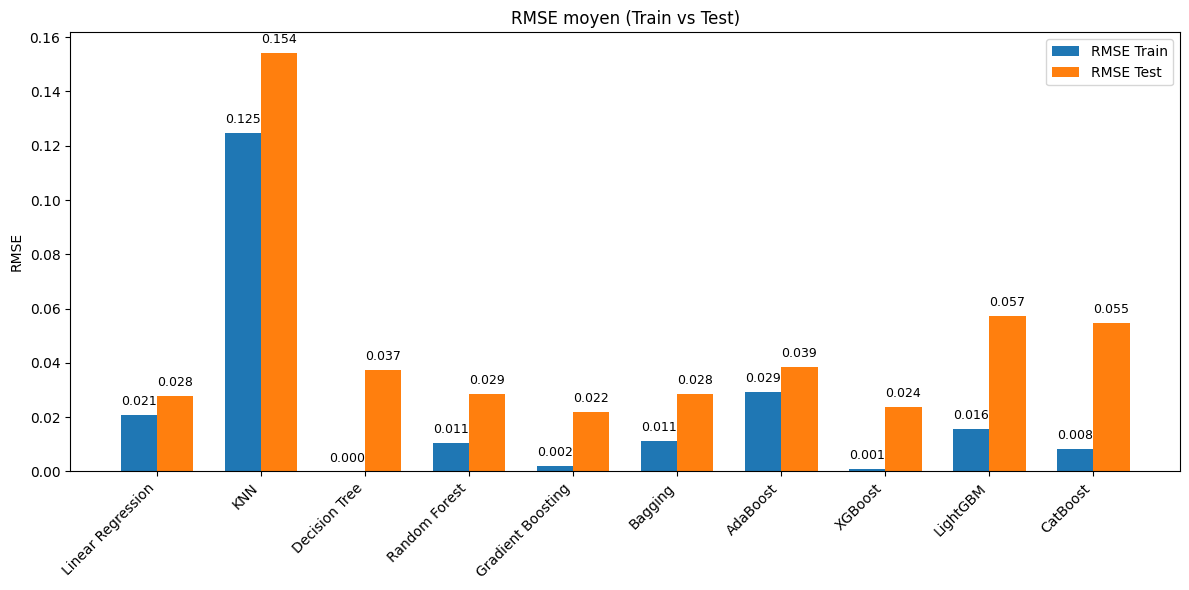

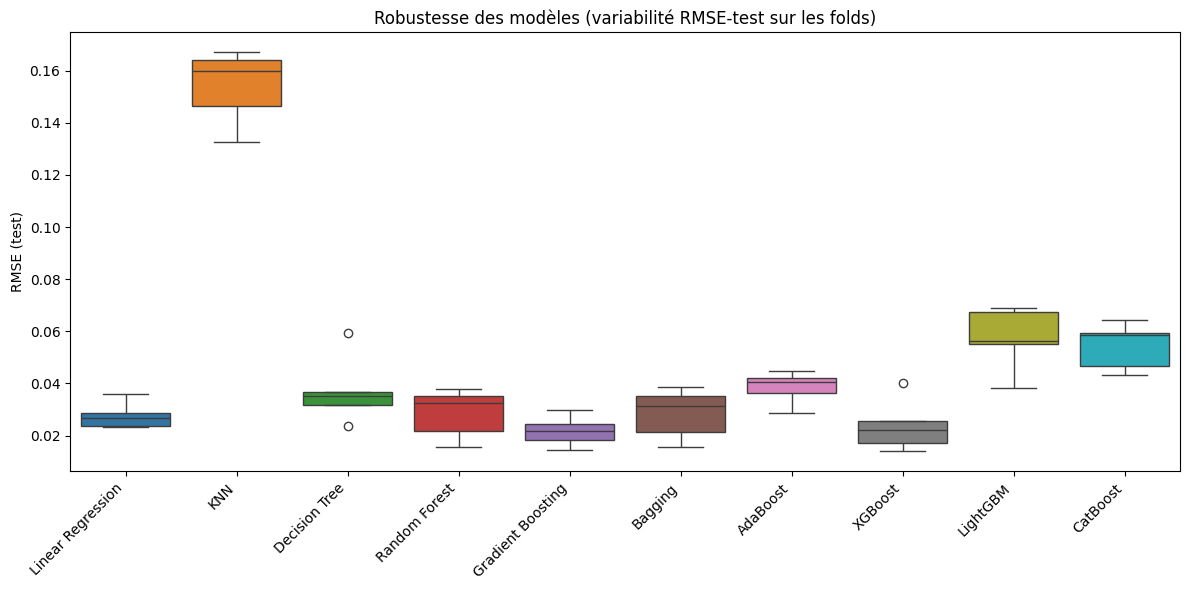

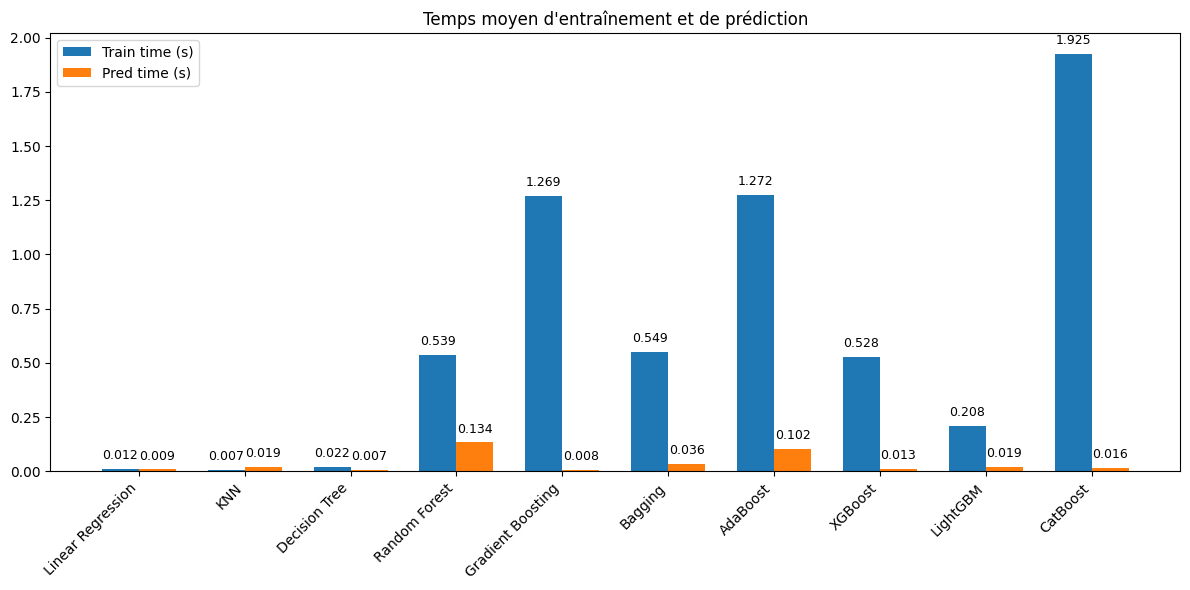


  Test de Friedman (comparaison de modèles sur les folds) 
Statistique de Friedman = 38.7164
P-value = 0.0000

→ Les performances diffèrent significativement (p < 0.05).
  Exécution du test post-hoc Nemenyi...

===== Matrice de Nemenyi (p-values) =====
                   Linear Regression       KNN  Decision Tree  Random Forest  \
Linear Regression           1.000000  0.039833       0.979527       1.000000   
KNN                         0.039833  1.000000       0.535342       0.039833   
Decision Tree               0.979527  0.535342       1.000000       0.979527   
Random Forest               1.000000  0.039833       0.979527       1.000000   
Gradient Boosting           0.999319  0.002898       0.682781       0.999319   
Bagging                     0.999994  0.009665       0.864285       0.999994   
AdaBoost                    0.906921  0.750853       1.000000       0.906921   
XGBoost                     0.999319  0.002898       0.682781       0.999319   
LightGBM                  

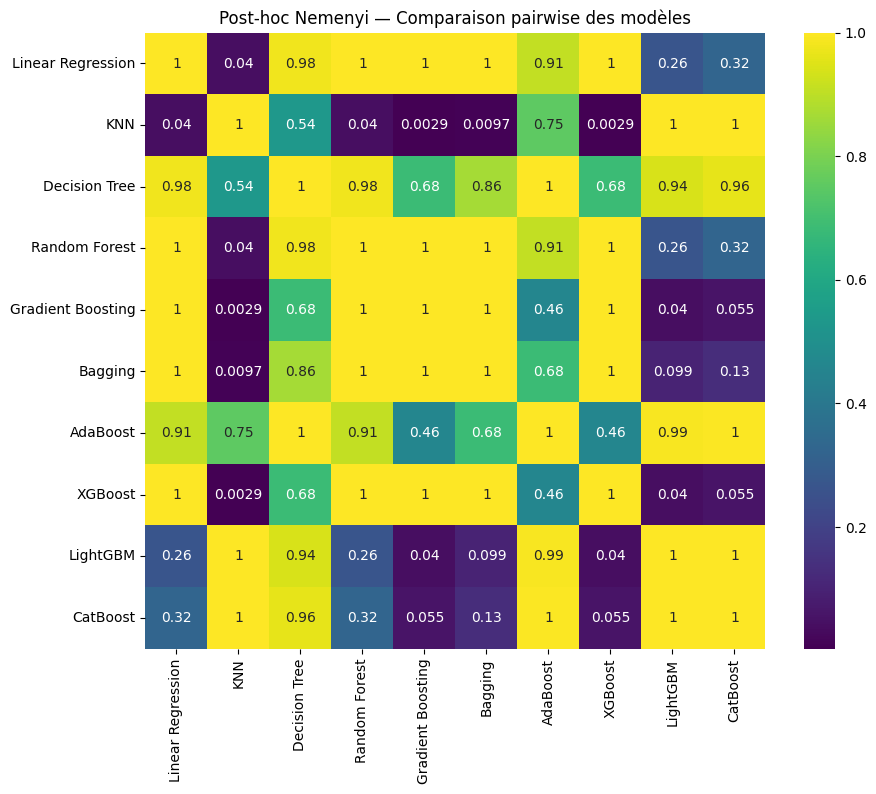

Meilleur modèle : Gradient Boosting


RMSE_train_mean  RMSE_test_mean  RMSE_test_std  Train_time  \
Linear Regression         0.020671        0.027650       0.004685    0.011800   
KNN                       0.124837        0.154089       0.012876    0.006799   
Decision Tree             0.000000        0.037421       0.011838    0.022199   
Random Forest             0.010640        0.028620       0.008451    0.538759   
Gradient Boosting         0.001890        0.021803       0.005216    1.268631   
Bagging                   0.011198        0.028425       0.008664    0.549017   
AdaBoost                  0.029339        0.038568       0.005605    1.272371   
XGBoost                   0.000805        0.023810       0.009198    0.527599   
LightGBM                  0.015691        0.057197       0.011023    0.208357   
CatBoost                  0.008408        0.054535       0.008080    1.925310   

                   Pred_time  Score_global  
Linear Regression   0.009197     -0.028210  
KNN                 0.019404     -0.155571  
Decision Tree       0.007401     -0.038678  
Random Forest       0.133598     -0.030801  
Gradient Boosting   0.007599     -0.022401  
Bagging             0.036000     -0.029651  
AdaBoost            0.101995     -0.040149  
XGBoost             0.012800     -0.024858  
LightGBM            0.018517     -0.058484  
CatBoost            0.016199     -0.055505

In [34]:
X_f_eng, y_f_eng=add_regression_features_area1(train)
results_df, best = modelisation_regression_area1_visualisee(X_f_eng, y_train, cv_splits=5, log_activation=True)
print("Meilleur modèle :", best)
results_df


**Interprétation**

Le Gradient Boosting est le meilleur modèle : plus faible RMSE test (0.0218), stabilité correcte (std 0.0052) et temps de prédiction très faible (0.009 s).
XGBoost suit de près (RMSE 0.0238) mais est un peu moins stable et plus lent.
Linear Regression et Random Forest offrent des performances acceptables (RMSE ≈ 0.028) et des temps très rapides pour la prédiction.
Le Decision Tree apprend trop parfaitement (RMSE train = 0) mais généralise mal (test 0.037), signe d’overfitting.
Les moins bons modèles sont LightGBM, CatBoost et AdaBoost (RMSE > 0.038), avec une variabilité plus forte et des temps d’entraînement élevés.

A partir du test de Friedman on peut dire : 

Les modèles Linear Regression, Decision Tree, Random Forest, Bagging, AdaBoost, Gradient Boosting et XGBoost sont tous statistiquement équivalents, offrant les meilleures performances.
KNN est significativement moins performant.
LightGBM et CatBoost ne sont pas significativement meilleurs que KNN et restent derrière les meilleurs modèles.

## 3. Optimisation des hyperparamètres via RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    BaggingRegressor, AdaBoostRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import numpy as np


# --- Scorer RMSE (Sklearn demande un score → on met négatif) ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)


def hyperparam_optimization_regression(X, y, cv_splits=5, n_iter=40, random_state=42):
    """
    Optimisation des hyperparamètres pour plusieurs modèles de régression
    (cible : area1) avec RandomizedSearchCV utilisant le RMSE.
    """

    numeric_features = X.select_dtypes(include=np.number).columns.tolist()

    preprocessor = ColumnTransformer(
        [('num', StandardScaler(), numeric_features)],
        remainder='passthrough'
    )

    # --- Modèles et grilles d’hyperparamètres ---
    model_params = {

        "Ridge": {
            "model": Ridge(),
            "params": {
                "model__alpha": [0.01, 0.1, 1, 10, 50, 100]
            }
        },

        "Lasso": {
            "model": Lasso(),
            "params": {
                "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1]
            }
        },

        "Decision Tree": {
            "model": DecisionTreeRegressor(random_state=random_state),
            "params": {
                "model__max_depth": [None, 3, 5, 7, 10],
                "model__min_samples_split": [2, 5, 10],
                "model__min_samples_leaf": [1, 2, 5]
            }
        },

        "Random Forest": {
            "model": RandomForestRegressor(random_state=random_state),
            "params": {
                "model__n_estimators": [200, 400, 600],
                "model__max_depth": [None, 5, 10],
                "model__min_samples_split": [2, 5, 10]
            }
        },

        "Gradient Boosting": {
            "model": GradientBoostingRegressor(random_state=random_state),
            "params": {
                "model__n_estimators": [100, 200, 400],
                "model__learning_rate": [0.01, 0.05, 0.1],
                "model__max_depth": [2, 3, 4]
            }
        },

        "Bagging": {
            "model": BaggingRegressor(random_state=random_state),
            "params": {
                "model__n_estimators": [50, 100, 200],
                "model__max_samples": [0.5, 0.7, 1.0]
            }
        },

        "AdaBoost": {
            "model": AdaBoostRegressor(random_state=random_state),
            "params": {
                "model__n_estimators": [100, 200, 400],
                "model__learning_rate": [0.01, 0.1, 0.5, 1.0]
            }
        },

        "XGBoost": {
            "model": XGBRegressor(random_state=random_state),
            "params": {
                "model__n_estimators": [200, 400, 600],
                "model__learning_rate": [0.01, 0.05, 0.1],
                "model__max_depth": [3, 5, 7]
            }
        },

        "LightGBM": {
            "model": LGBMRegressor(random_state=random_state),
            "params": {
                "model__n_estimators": [200, 400, 600],
                "model__learning_rate": [0.01, 0.05, 0.1],
                "model__num_leaves": [20, 31, 50]
            }
        },

        "CatBoost": {
            "model": CatBoostRegressor(verbose=0, random_seed=random_state),
            "params": {
                "model__depth": [4, 6, 8],
                "model__iterations": [200, 400, 600],
                "model__learning_rate": [0.01, 0.05, 0.1]
            }
        }
    }

    best_models = {}
    best_params = {}

    # --- Boucle d’optimisation ---
    for name, mp in model_params.items():
        print(f"\n  Optimisation de {name}  ")

        pipeline = Pipeline([
            ('preprocess', preprocessor),
            ('model', mp["model"])
        ])

        search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=mp["params"],
            scoring=rmse_scorer,
            n_iter=n_iter,
            cv=cv_splits,
            verbose=1,
            random_state=random_state,
            n_jobs=-1
        )

        search.fit(X, y)

        best_models[name] = search.best_estimator_
        best_params[name] = search.best_params_

        print("→ Best RMSE :", round(-search.best_score_, 4))
        print("→ Best params :", search.best_params_)

    return best_models, best_params


In [37]:
best_models, best_params = hyperparam_optimization_regression(X_train, y_train)


===== Optimisation de Ridge =====
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=40. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


→ Best RMSE : 26.2377
→ Best params : {'model__alpha': 0.1}

===== Optimisation de Lasso =====
Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=40. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+03, tolerance: 5.720e+03
  model = cd_fast.enet_coordinate_descent(


→ Best RMSE : 25.8313
→ Best params : {'model__alpha': 0.1}

===== Optimisation de Decision Tree =====
Fitting 5 folds for each of 40 candidates, totalling 200 fits
→ Best RMSE : 43.5925
→ Best params : {'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 7}

===== Optimisation de Random Forest =====
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=40. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


→ Best RMSE : 36.7481
→ Best params : {'model__n_estimators': 400, 'model__min_samples_split': 2, 'model__max_depth': None}

===== Optimisation de Gradient Boosting =====
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=40. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


→ Best RMSE : 25.5018
→ Best params : {'model__n_estimators': 200, 'model__max_depth': 2, 'model__learning_rate': 0.1}

===== Optimisation de Bagging =====
Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=40. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


→ Best RMSE : 37.7541
→ Best params : {'model__n_estimators': 200, 'model__max_samples': 1.0}

===== Optimisation de AdaBoost =====
Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=40. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


→ Best RMSE : 42.8729
→ Best params : {'model__n_estimators': 200, 'model__learning_rate': 1.0}

===== Optimisation de XGBoost =====
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=40. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


→ Best RMSE : 27.1762
→ Best params : {'model__n_estimators': 600, 'model__max_depth': 3, 'model__learning_rate': 0.05}

===== Optimisation de LightGBM =====
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=40. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4391
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] Start training from score 654.377583
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=40. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


→ Best RMSE : 45.4311
→ Best params : {'model__learning_rate': 0.1, 'model__iterations': 600, 'model__depth': 4}


In [38]:
best_params

{'Ridge': {'model__alpha': 0.1},
 'Lasso': {'model__alpha': 0.1},
 'Decision Tree': {'model__min_samples_split': 2,
  'model__min_samples_leaf': 1,
  'model__max_depth': 7},
 'Random Forest': {'model__n_estimators': 400,
  'model__min_samples_split': 2,
  'model__max_depth': None},
 'Gradient Boosting': {'model__n_estimators': 200,
  'model__max_depth': 2,
  'model__learning_rate': 0.1},
 'Bagging': {'model__n_estimators': 200, 'model__max_samples': 1.0},
 'AdaBoost': {'model__n_estimators': 200, 'model__learning_rate': 1.0},
 'XGBoost': {'model__n_estimators': 600,
  'model__max_depth': 3,
  'model__learning_rate': 0.05},
 'LightGBM': {'model__num_leaves': 20,
  'model__n_estimators': 200,
  'model__learning_rate': 0.05},
 'CatBoost': {'model__learning_rate': 0.1,
  'model__iterations': 600,
  'model__depth': 4}}

## Evaluation sur les données de test

In [39]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans

from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

def modele_regression_train_test(X_train, y_train, X_test, y_test, log_activation=False):
    """
    Entraîne plusieurs modèles sur X_train/y_train, prédit sur X_test/y_test.
    - Ajoute une colonne 'cluster' issue d'un KMeans(2)
    - Standardisation des colonnes numériques
    - Affiche les métriques R2, MAE, RMSE sous forme de graphiques à barres
    - Affiche les temps d'entraînement et de prédiction
    """
    # Copie des données pour sécurité
    X_train = X_train.copy()
    X_test = X_test.copy()
    y_train = y_train.copy()
    y_test = y_test.copy()
    
    if log_activation:
        y_train = np.log1p(y_train)
        y_test = np.log1p(y_test)

    # ---- 1) Ajouter cluster (KMeans 2) ----
    kmeans = KMeans(n_clusters=2, random_state=42)
    try:
        X_train["cluster"] = kmeans.fit_predict(X_train)
        X_test["cluster"] = kmeans.predict(X_test)
    except Exception:
        numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
        X_train["cluster"] = kmeans.fit_predict(X_train[numeric_cols])
        X_test["cluster"] = kmeans.predict(X_test[numeric_cols])

    # ---- 2) Prétraitement (StandardScaler sur colonnes numériques) ----
    numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
    preprocessor = ColumnTransformer(
        [('num', StandardScaler(), numeric_features)],
        remainder='passthrough'
    )

    # ---- 3) Modèles avec hyperparamètres ----
    models = {
        "Ridge": Ridge(alpha=0.1),
        "Lasso": Lasso(alpha=0.1),
        "Decision Tree": DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=1, max_depth=7, random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=400, min_samples_split=2, max_depth=None, random_state=42, n_jobs=-1),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1, random_state=42),
        "Bagging": BaggingRegressor(n_estimators=200, max_samples=1.0, random_state=42),
        "AdaBoost": AdaBoostRegressor(n_estimators=200, learning_rate=1.0, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=600, max_depth=3, learning_rate=0.05, random_state=42, verbosity=0),
        "LightGBM": LGBMRegressor(num_leaves=20, n_estimators=200, learning_rate=0.05, random_state=42),
        "CatBoost": CatBoostRegressor(iterations=600, learning_rate=0.1, depth=4, verbose=0, random_seed=42)
    }

    # ---- 4) Stockage métriques ----
    results = {
        "R2": {},
        "MAE": {},
        "RMSE": {},
        "Train_time": {},
        "Pred_time": {}
    }

    # ---- 5) Boucle sur modèles ----
    for name, model in models.items():
        pipeline = Pipeline([("preprocess", preprocessor), ("model", model)])
        print(f"--- Entraînement : {name} ---")

        # Entraînement
        t0 = time.time()
        pipeline.fit(X_train, y_train)
        t1 = time.time()

        # Prédiction
        t2 = time.time()
        y_pred = pipeline.predict(X_test)
        t3 = time.time()

        # Calcul métriques
        results["R2"][name] = r2_score(y_test, y_pred)
        results["MAE"][name] = mean_absolute_error(y_test, y_pred)
        results["RMSE"][name] = np.sqrt(mean_squared_error(y_test, y_pred))
        results["Train_time"][name] = t1 - t0
        results["Pred_time"][name] = t3 - t2

        print(f"R2={results['R2'][name]:.4f}, MAE={results['MAE'][name]:.4f}, RMSE={results['RMSE'][name]:.4f}, "
              f"t_train={results['Train_time'][name]:.3f}s, t_pred={results['Pred_time'][name]:.3f}s")

    # ---- 6) DataFrame récapitulatif ----
    results_df = pd.DataFrame(results)

    # ---- 7) Graphiques ----
    def plot_metric(metric, title):
        plt.figure(figsize=(12,6))
        sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")
        plt.title(title)
        plt.ylabel(metric)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    plot_metric("R2", "R² des modèles sur X_test")
    plot_metric("MAE", "MAE des modèles sur X_test")
    plot_metric("RMSE", "RMSE des modèles sur X_test")

    # Graphique temps
    plt.figure(figsize=(12,6))
    x = np.arange(len(results_df))
    width = 0.35
    plt.bar(x - width/2, results_df["Train_time"], width, label="Train time (s)")
    plt.bar(x + width/2, results_df["Pred_time"], width, label="Pred time (s)")
    plt.xticks(x, results_df.index, rotation=45, ha='right')
    plt.ylabel("Temps (s)")
    plt.title("Temps d'entraînement et de prédiction")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return results_df


--- Entraînement : Ridge ---
R2=0.9957, MAE=14.3296, RMSE=22.2771, t_train=0.011s, t_pred=0.004s
--- Entraînement : Lasso ---
R2=0.9959, MAE=13.5997, RMSE=21.8585, t_train=0.020s, t_pred=0.004s
--- Entraînement : Decision Tree ---
R2=0.9959, MAE=11.4434, RMSE=21.6565, t_train=0.017s, t_pred=0.002s
--- Entraînement : Random Forest ---


c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.822e+03, tolerance: 5.720e+03
  model = cd_fast.enet_coordinate_descent(


R2=0.9981, MAE=7.5539, RMSE=14.9015, t_train=1.295s, t_pred=0.117s
--- Entraînement : Gradient Boosting ---
R2=0.9964, MAE=10.1473, RMSE=20.4247, t_train=1.039s, t_pred=0.004s
--- Entraînement : Bagging ---
R2=0.9979, MAE=7.9912, RMSE=15.6964, t_train=2.726s, t_pred=0.048s
--- Entraînement : AdaBoost ---
R2=0.9867, MAE=28.5192, RMSE=39.2268, t_train=0.184s, t_pred=0.009s
--- Entraînement : XGBoost ---
R2=0.9967, MAE=8.3100, RMSE=19.5890, t_train=1.593s, t_pred=0.014s
--- Entraînement : LightGBM ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4394
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 31
[LightGBM] [Info] Start training from score 654.377583
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

c:\Users\MEHOUN MARTINIEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


R2=0.9938, MAE=17.2474, RMSE=26.7929, t_train=1.625s, t_pred=0.007s


C:\Users\MEHOUN MARTINIEN\AppData\Local\Temp\ipykernel_28536\3133608952.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")


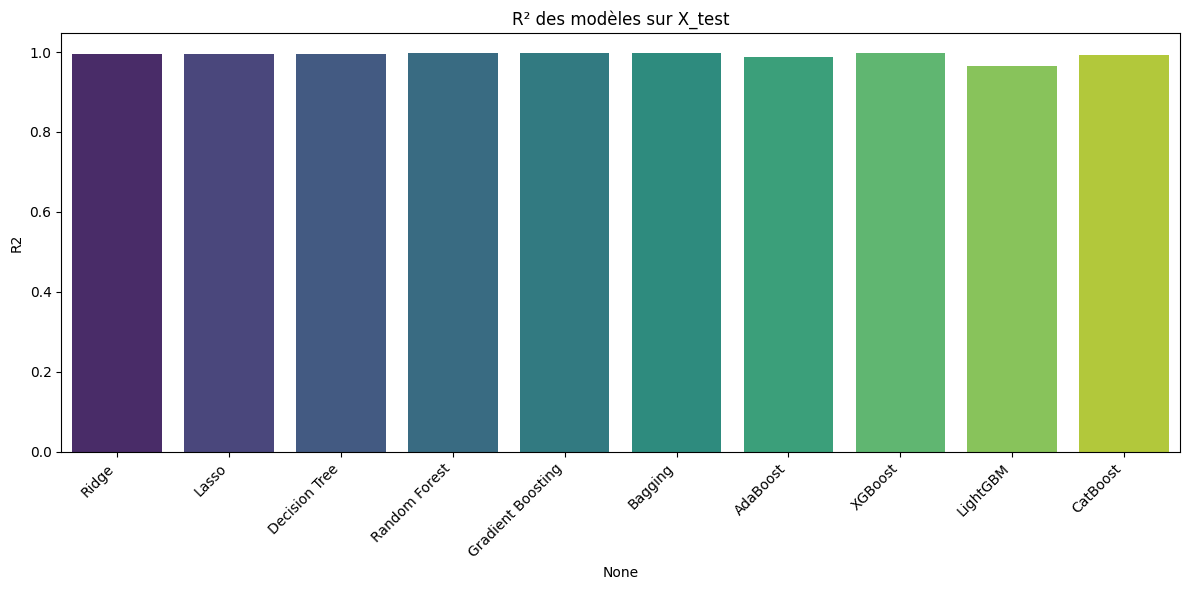

C:\Users\MEHOUN MARTINIEN\AppData\Local\Temp\ipykernel_28536\3133608952.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")


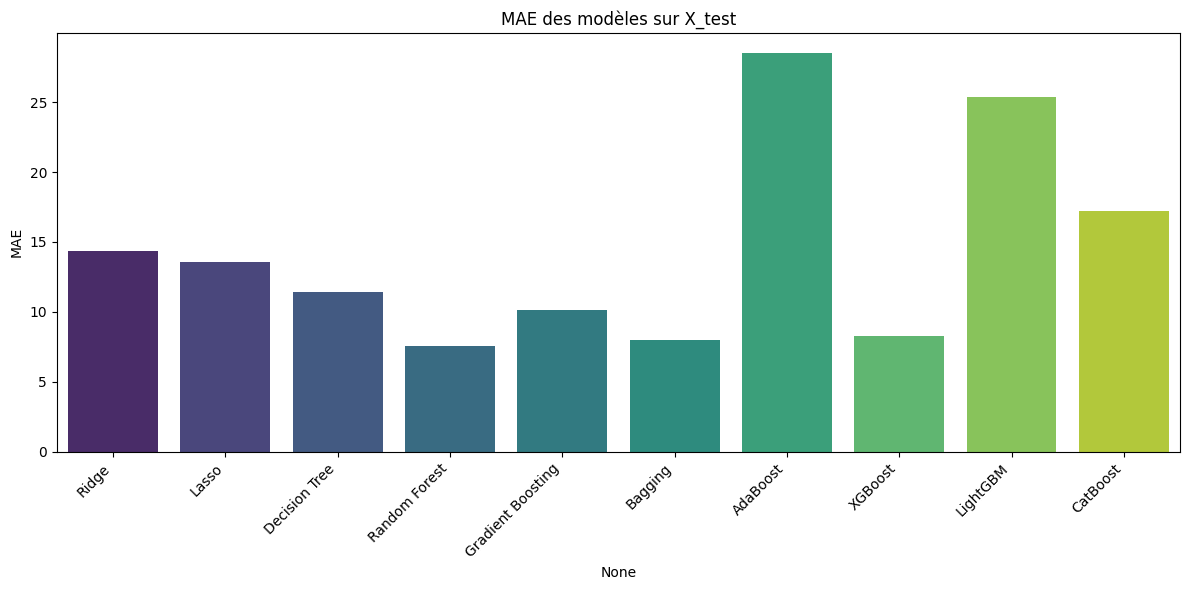

C:\Users\MEHOUN MARTINIEN\AppData\Local\Temp\ipykernel_28536\3133608952.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")


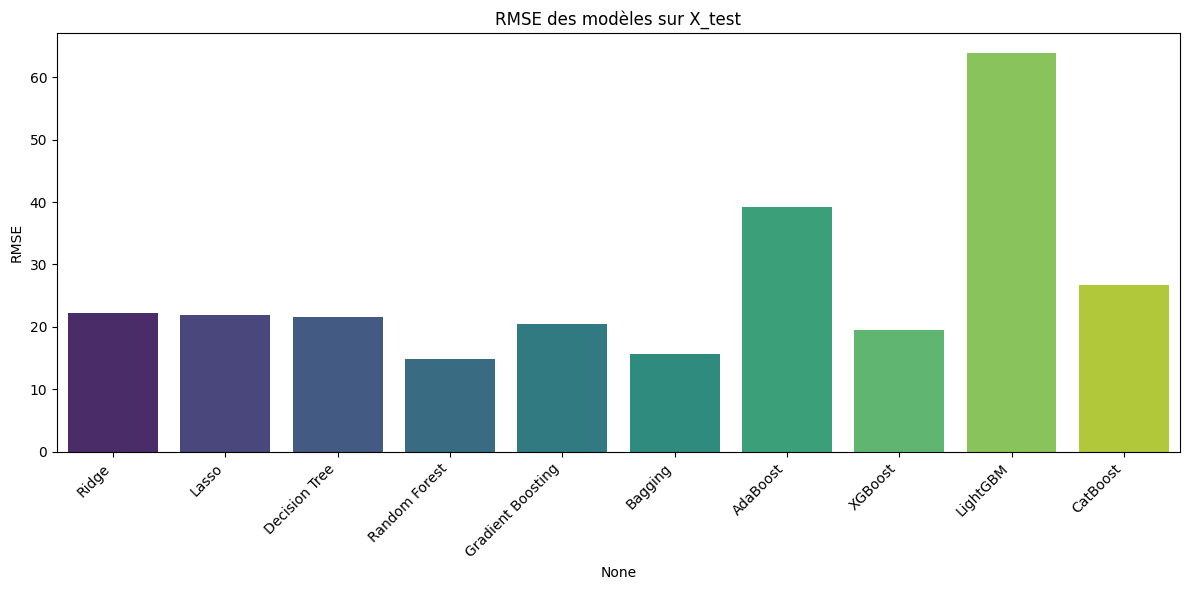

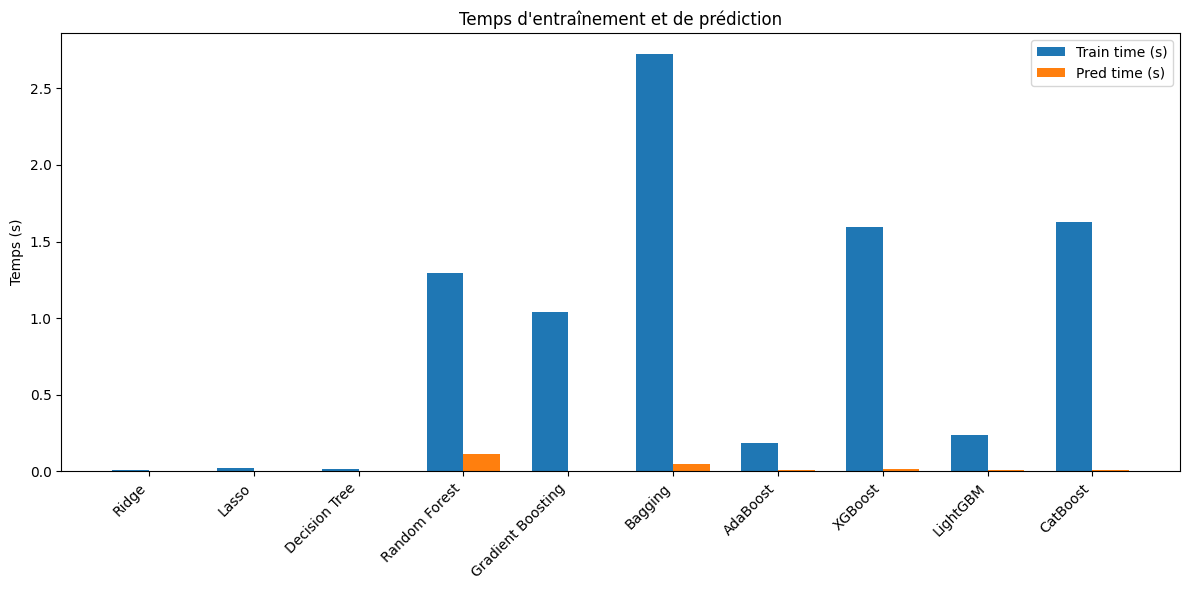

R2        MAE       RMSE  Train_time  Pred_time
Ridge              0.995696  14.329564  22.277063    0.011009   0.003986
Lasso              0.995857  13.599705  21.858462    0.020002   0.004005
Decision Tree      0.995933  11.443428  21.656515    0.016999   0.002001
Random Forest      0.998074   7.553897  14.901487    1.295183   0.117000
Gradient Boosting  0.996382  10.147275  20.424720    1.038515   0.003998
Bagging            0.997863   7.991219  15.696440    2.725647   0.047999
AdaBoost           0.986656  28.519222  39.226790    0.183984   0.009000
XGBoost            0.996672   8.309952  19.588972    1.593134   0.014363
LightGBM           0.964607  25.338303  63.884068    0.239398   0.008003
CatBoost           0.993775  17.247398  26.792943    1.625480   0.007001

In [40]:
modele_regression_train_test(X_train, y_train, X_test, y_test, log_activation=False)

**Interprétation**


Random Forest : meilleur compromis précision/robustesse. R² très élevé (0.9981), MAE et RMSE les plus bas, temps d’entraînement/prédiction corrects.

Bagging : R² proche de Random Forest (0.9979), MAE/RMSE légèrement plus élevés, mais temps d’entraînement plus long (2.7 s).

XGBoost : R² = 0.9967, MAE/RMSE un peu plus hauts que Random Forest, temps d’entraînement 1.6 s, rapide en prédiction.

Gradient Boosting : R² correct (0.9964), MAE/RMSE un peu plus élevés, temps d’entraînement 1 s, prédiction très rapide.

Decision Tree, Ridge, Lasso : très rapides à entraîner, R² déjà très bon (>0.995), mais erreurs légèrement supérieures à Random Forest/Bagging/XGBoost.

AdaBoost, CatBoost, LightGBM : R² et erreurs moins bonnes, à éviter pour ce dataset malgré certains temps d’entraînement raisonnables.



Conclusion : En trouvant les meilleurs hyperparamètres , le Random Forest devient  le meilleur modèle pour la tache , suivi de près par Bagging et XGBoost pour ceux qui acceptent un léger compromis sur les performances, le Gradient Boosting demeure une meilleure option.

Nous allons faire toutes ces étapes dans une seule fonction

Elle prend en entrée notre dataframe et nous retourne les différentes parties ou données dont nous aurons besoins pour l'entrainnement, le test, et l'interprétabilité.

# Partie 5  Discussions finales

**Synthèse de l’étude sur la base AMA (UCI)**

Cette étude a pour objectif de prédire deux aspects essentiels à partir de données tabulaires extraites d’images PAAF :

Le diagnostic (benin/malin)

La valeur de l’aire area1 des noyaux cellulaires.

Elle explore différents modèles classiques de machine learning pour identifier ceux qui offrent le meilleur compromis entre précision, robustesse et rapidité, sans recourir à des modèles complexes type CNN, car les caractéristiques pertinentes ont été pré-extraites.

**Partie 1 : Prédiction du diagnostic**



Objectif : Identifier correctement les masses mammaires bénignes et malignes.

Meilleur modèle : Régression Logistique

 F1-test = 963855,  F1-train = 0.967552 donc pas d’overfitting.

Très rapide : entraînement 0.03 s, prédiction 0.01 s.

Capacité élevée à détecter les cas positifs (malins).

Modèles complexes (Random Forest, Gradient Boosting, XGBoost, LightGBM)

Ajustement parfait sur le train (1.00), mais moins performant sur test (≈0.92–0.94).

Sont sensibles au bruit et au surapprentissage.

Conclusion opérationnelle : La Régression Logistique est le modèle le plus sûr et stable pour un usage réel, combinant rapidité et détection fiable des cas positifs.

**Partie 2 : Prédiction de area1**



Objectif : Prédire précisément l’aire des noyaux cellulaires (area1).

Meilleur modèle : Random Forest

R² = 0.9981, MAE = 7.55, RMSE = 14.90 → meilleure précision et robustesse.

Temps d’entraînement/prédiction corrects.

Autres modèles performants :

Bagging : R² = 0.9979, MAE/RMSE légèrement supérieurs, plus lent à entraîner.

XGBoost : R² = 0.9967, MAE/RMSE un peu plus élevés, rapide en prédiction.

Modèles à éviter : LightGBM, AdaBoost, CatBoost → erreurs plus grandes malgré certains temps d’entraînement corrects.

Conclusion : Random Forest offre le meilleur compromis pour la prédiction numérique de area1.




**Combinaison des deux parties : bénéfices**

Prédiction diagnostique + prédiction d’aire : combiner les deux approches permet :

D’avoir un diagnostic fiable et une quantification précise des caractéristiques tumorales.

De prioriser les patients à risque élevé en fonction de la taille/aire des noyaux et du diagnostic.

D’orchestrer les modèles :

Régression Logistique pour le diagnostic rapide et stable.

Random Forest (ou Bagging/XGBoost selon contraintes de temps) pour prédiction précise des valeurs continues.

Cette approche hybride maximise la robustesse et l’efficacité opérationnelle.



**Conclusion générale**

L’étude montre que des modèles classiques bien paramétrés peuvent surpasser les modèles complexes sur ce type de données tabulaires, extraites d’images médicales.

Régression Logistique → meilleure pour le diagnostic, rapide et stable.

Random Forest → meilleure pour la prédiction de area1, précise et robuste.

La combinaison des deux modèles permet d’avoir à la fois précision diagnostique et quantification des caractéristiques tumorales, ce qui est très utile pour la prise de décision clinique et la priorisation des cas.

Cette approche illustre que l’orchestration de modèles spécialisés selon la nature de la tâche (classification vs régression) est une stratégie efficace pour tirer le meilleur parti des données.

## **Conclusion  du projet**

Ce projet nous a permis de mettre en pratique les concepts liés aux réseaux de neurones, et plus particulièrement à l’utilisation d’un autoencodeur. Il a constitué une véritable opportunité pour nous initier à la conception autonome de modèles neuronaux, en développant des compétences essentielles telles que l’anticipation des problèmes, la gestion des erreurs et l’amélioration de nos méthodes de recherche grâce à l’exploration de diverses sources et documentations techniques.

Nous tenons à exprimer notre gratitude à notre enseignant pour cette opportunité, ainsi que pour le temps et l’énergie précieux consacrés à la préparation et à l’encadrement de ce projet.


#### Un sincère Merci à M. Paul